In [ ]:
# результатом скрипта являетс 600 т. строк для голубики и 75 тех индикаторы длинной 16 в df3.to_csv('df3.csv')

In [1]:
import talib
from talib import abstract
from sklearn.preprocessing import MinMaxScaler
import mplfinance as mpf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import labeling.ipynb
from tqdm import tqdm_notebook as tqdm
display(len(talib.get_functions()))
display((talib.get_functions()))
display(talib.get_function_groups())

158

['HT_DCPERIOD',
 'HT_DCPHASE',
 'HT_PHASOR',
 'HT_SINE',
 'HT_TRENDMODE',
 'ADD',
 'DIV',
 'MAX',
 'MAXINDEX',
 'MIN',
 'MININDEX',
 'MINMAX',
 'MINMAXINDEX',
 'MULT',
 'SUB',
 'SUM',
 'ACOS',
 'ASIN',
 'ATAN',
 'CEIL',
 'COS',
 'COSH',
 'EXP',
 'FLOOR',
 'LN',
 'LOG10',
 'SIN',
 'SINH',
 'SQRT',
 'TAN',
 'TANH',
 'ADX',
 'ADXR',
 'APO',
 'AROON',
 'AROONOSC',
 'BOP',
 'CCI',
 'CMO',
 'DX',
 'MACD',
 'MACDEXT',
 'MACDFIX',
 'MFI',
 'MINUS_DI',
 'MINUS_DM',
 'MOM',
 'PLUS_DI',
 'PLUS_DM',
 'PPO',
 'ROC',
 'ROCP',
 'ROCR',
 'ROCR100',
 'RSI',
 'STOCH',
 'STOCHF',
 'STOCHRSI',
 'TRIX',
 'ULTOSC',
 'WILLR',
 'BBANDS',
 'DEMA',
 'EMA',
 'HT_TRENDLINE',
 'KAMA',
 'MA',
 'MAMA',
 'MAVP',
 'MIDPOINT',
 'MIDPRICE',
 'SAR',
 'SAREXT',
 'SMA',
 'T3',
 'TEMA',
 'TRIMA',
 'WMA',
 'CDL2CROWS',
 'CDL3BLACKCROWS',
 'CDL3INSIDE',
 'CDL3LINESTRIKE',
 'CDL3OUTSIDE',
 'CDL3STARSINSOUTH',
 'CDL3WHITESOLDIERS',
 'CDLABANDONEDBABY',
 'CDLADVANCEBLOCK',
 'CDLBELTHOLD',
 'CDLBREAKAWAY',
 'CDLCLOSINGMARUBOZU',


{'Cycle Indicators': ['HT_DCPERIOD',
  'HT_DCPHASE',
  'HT_PHASOR',
  'HT_SINE',
  'HT_TRENDMODE'],
 'Math Operators': ['ADD',
  'DIV',
  'MAX',
  'MAXINDEX',
  'MIN',
  'MININDEX',
  'MINMAX',
  'MINMAXINDEX',
  'MULT',
  'SUB',
  'SUM'],
 'Math Transform': ['ACOS',
  'ASIN',
  'ATAN',
  'CEIL',
  'COS',
  'COSH',
  'EXP',
  'FLOOR',
  'LN',
  'LOG10',
  'SIN',
  'SINH',
  'SQRT',
  'TAN',
  'TANH'],
 'Momentum Indicators': ['ADX',
  'ADXR',
  'APO',
  'AROON',
  'AROONOSC',
  'BOP',
  'CCI',
  'CMO',
  'DX',
  'MACD',
  'MACDEXT',
  'MACDFIX',
  'MFI',
  'MINUS_DI',
  'MINUS_DM',
  'MOM',
  'PLUS_DI',
  'PLUS_DM',
  'PPO',
  'ROC',
  'ROCP',
  'ROCR',
  'ROCR100',
  'RSI',
  'STOCH',
  'STOCHF',
  'STOCHRSI',
  'TRIX',
  'ULTOSC',
  'WILLR'],
 'Overlap Studies': ['BBANDS',
  'DEMA',
  'EMA',
  'HT_TRENDLINE',
  'KAMA',
  'MA',
  'MAMA',
  'MAVP',
  'MIDPOINT',
  'MIDPRICE',
  'SAR',
  'SAREXT',
  'SMA',
  'T3',
  'TEMA',
  'TRIMA',
  'WMA'],
 'Pattern Recognition': ['CDL2CROWS',
  'C

In [2]:
# %run ./labeling.ipynb
# a, b = create_labels(df, 'Close')

Calculating labels


C:\Users\afecn\anaconda3.1\lib\site-packages\ipykernel_launcher.py:9: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  if __name__ == '__main__':


In [2]:
t_indicator = [
  'ADX',
  'ADXR',
  'APO',
  'AROON',
  'AROONOSC',
  'BOP',
  'CCI',
  'CMO',
  'DX',
  'MACD',
  'MACDEXT',
  'MACDFIX',
  'MFI',
  'MINUS_DI',
  'MINUS_DM',
  'MOM',
  'PLUS_DI',
  'PLUS_DM',
  'PPO',
  'ROC',
  'ROCP',
  'ROCR',
  'ROCR100',
  'RSI',
  'STOCH',
  'STOCHF',
  'STOCHRSI',
  'TRIX',
  'ULTOSC',
  'WILLR',
        
  'HT_DCPERIOD',
  'HT_DCPHASE',
  'HT_PHASOR',
  'HT_SINE',
  'HT_TRENDMODE',
        
        
  'BBANDS',
  'DEMA',
  'EMA',
  'HT_TRENDLINE',
  'KAMA',
  'MA',
  'MAMA',
#  'MAVP',
  'MIDPOINT',
  'MIDPRICE',
#  'SAR',
#  'SAREXT',
  'SMA',
  'T3',
  'TEMA',
  'TRIMA',
  'WMA',
        
'ATR', 'NATR', 'TRANGE',
'AD', 'ADOSC', 'OBV']

In [3]:
index = [
  'ADX',
  'ADXR',
  'APO',
  'AROON',
  'AROONOSC',
  'BOP',
  'CCI',
  'CMO',
  'DX',
  'MACD',
  'MACDEXT',
  'MACDFIX',
  'MFI',
  'MINUS_DI',
  'MINUS_DM',
  'MOM',
  'PLUS_DI',
  'PLUS_DM',
  'PPO',
  'ROC',
  'ROCP',
  'ROCR',
  'ROCR100',
  'RSI',
  'STOCH',
  'STOCHF',
  'STOCHRSI',
  'TRIX',
  'ULTOSC',
  'WILLR',
        
  'HT_DCPERIOD',
  'HT_DCPHASE',
  'HT_PHASOR',
  'HT_SINE',
  'HT_TRENDMODE',
        
        
  'BBANDS',
  'DEMA',
  'EMA',
  'HT_TRENDLINE',
  'KAMA',
  'MA',
  'MAMA',
#  'MAVP',
  'MIDPOINT',
  'MIDPRICE',
  'SAR',
  'SAREXT',
  'SMA',
  'T3',
  'TEMA',
  'TRIMA',
  'WMA',
        
'ATR', 'NATR', 'TRANGE',
'AD', 'ADOSC', 'OBV'

]

In [4]:
%%time
#все в один файл
df_all = pd.DataFrame()
for pp in ['GAZP', 'GMKN', 'LKOH', 'ROSN', 'SBER', 'VTBR']:
    df_s = pd.read_excel("E:/Host/Data/Database/from_Wealth/{}.xlsx".format(pp), decimal='.', sep = ',', encoding='latin-1', parse_dates=['Date', 'Time'])
    df_s['Symbol'] = pp
    df_all = df_all.append(df_s)


Wall time: 1min 4s


In [5]:
display(df_all.shape)
df_all.drop_duplicates(['Date', 'Time', 'Symbol'])
display(df_all.shape)

(604438, 8)

(604438, 8)

In [4]:
# download 10 minute 
df_all = pd.read_csv('E:/Host/Data/Database/10min/2006_to_now.csv', parse_dates=['Date'])


In [6]:
#переходничок
df_f2 = df_all
df_f2.drop(columns = 'Unnamed: 0', inplace=True)
df_f2

,Date,Open,High,Low,Close,Volume,Symbol
0,2006-01-23 10:30:00,239.000000,239.000000,221.000000,221.500000,9.992662e+07,GAZP
1,2006-01-23 10:40:00,221.500000,222.890000,219.330000,220.500000,1.037755e+08,GAZP
2,2006-01-23 10:50:00,220.500000,221.440000,220.220000,220.500000,1.010915e+08,GAZP
3,2006-01-23 11:00:00,220.500000,220.500000,219.710000,220.490000,2.572082e+07,GAZP
4,2006-01-23 11:10:00,220.480000,220.940000,219.860000,220.000000,2.369642e+07,GAZP
...,...,...,...,...,...,...,...
1119309,2020-09-18 11:00:00,0.035580,0.035665,0.035565,0.035570,2.255754e+07,VTBR
1119310,2020-09-18 11:10:00,0.035570,0.035600,0.035530,0.035565,1.062869e+07,VTBR
1119311,2020-09-18 11:20:00,0.035560,0.035565,0.035505,0.035555,7.170856e+06,VTBR
1119312,2020-09-18 11:30:00,0.035545,0.035555,0.035520,0.035535,3.007063e+06,VTBR


In [7]:
#СОЗДАЕМ ТЕХ ИНДИКАТОРЫ С ДРУГИМИ НАСТРОЙКАМИ

n=0
df2 = pd.DataFrame()
df_f_all_1 = pd.DataFrame()
df_f_all_2 = pd.DataFrame()

df2=df_all.copy()

for yy in ['GAZP', 'GMKN', 'LKOH', 'ROSN', 'SBER', 'VTBR']:
    df_f = df2[df2['Symbol'] == yy]
    inputs = {                     # ТУТ ДРУГОЙ НАБОР 
    'open'  : df_f['Open'],
    'high'  : df_f['High'],
    'low'   : df_f['Low'],
    'close' : df_f['Close'],
    'volume': df_f['Volume']
}
    for ss in t_indicator:
        if len(abstract.Function(ss).output_names) == 1:
            for namber in [5,14,28]:            
                display(str(ss)+ '_' +str(namber))
                TA = abstract.Function(ss)
                df_f[str(ss)+ '_' +str(namber)] = TA(inputs, namber)
                n+=1
                print(yy)
                print(n)
    df_f_all_1 = df_f_all_1.append(df_f)
print('next')

for yy in ['GAZP', 'GMKN', 'LKOH', 'ROSN', 'SBER', 'VTBR']:
    df_f = pd.DataFrame() #НУ НА ВСЯКИЙ СЛУЧАЙ ОБНУЛИЛ 
    df_f = df2[df2['Symbol'] == yy]
    inputs = {
    'open'  : df_f['Open'],
    'high'  : df_f['High'],
    'low'   : df_f['Low'],
    'close' : df_f['Close'],
    'volume': df_f['Volume']
}
    for ee in index:
        TA = abstract.Function(ee)

        for tt, qq in zip(TA.output_names, range(len(TA.output_names))):
            if len(TA.output_names) != 1:
                display(str(ee)+ '_' +str(tt))
       #         display(TA(inputs))
                df_f[str(ee)+ '_' +str(tt)] = TA(inputs)[qq]

                n+=1
                print(yy)
                print(n)
    df_f_all_2 = df_f_all_2.append(df_f)

display(df_f_all_1)
display(df_f_all_2)


        



'ADX_5'

GAZP
1


C:\Users\afecn\anaconda3.1\lib\site-packages\ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


'ADX_14'

GAZP
2


'ADX_28'

GAZP
3


'ADXR_5'

GAZP
4


'ADXR_14'

GAZP
5


'ADXR_28'

GAZP
6


'APO_5'

GAZP
7


'APO_14'

GAZP
8


'APO_28'

GAZP
9


'AROONOSC_5'

GAZP
10


'AROONOSC_14'

GAZP
11


'AROONOSC_28'

GAZP
12


'BOP_5'

GAZP
13


'BOP_14'

GAZP
14


'BOP_28'

GAZP
15


'CCI_5'

GAZP
16


'CCI_14'

GAZP
17


'CCI_28'

GAZP
18


'CMO_5'

GAZP
19


'CMO_14'

GAZP
20


'CMO_28'

GAZP
21


'DX_5'

GAZP
22


'DX_14'

GAZP
23


'DX_28'

GAZP
24


'MFI_5'

GAZP
25


'MFI_14'

GAZP
26


'MFI_28'

GAZP
27


'MINUS_DI_5'

GAZP
28


'MINUS_DI_14'

GAZP
29


'MINUS_DI_28'

GAZP
30


'MINUS_DM_5'

GAZP
31


'MINUS_DM_14'

GAZP
32


'MINUS_DM_28'

GAZP
33


'MOM_5'

GAZP
34


'MOM_14'

GAZP
35


'MOM_28'

GAZP
36


'PLUS_DI_5'

GAZP
37


'PLUS_DI_14'

GAZP
38


'PLUS_DI_28'

GAZP
39


'PLUS_DM_5'

GAZP
40


'PLUS_DM_14'

GAZP
41


'PLUS_DM_28'

GAZP
42


'PPO_5'

GAZP
43


'PPO_14'

GAZP
44


'PPO_28'

GAZP
45


'ROC_5'

GAZP
46


'ROC_14'

GAZP
47


'ROC_28'

GAZP
48


'ROCP_5'

GAZP
49


'ROCP_14'

GAZP
50


'ROCP_28'

GAZP
51


'ROCR_5'

GAZP
52


'ROCR_14'

GAZP
53


'ROCR_28'

GAZP
54


'ROCR100_5'

GAZP
55


'ROCR100_14'

GAZP
56


'ROCR100_28'

GAZP
57


'RSI_5'

GAZP
58


'RSI_14'

GAZP
59


'RSI_28'

GAZP
60


'TRIX_5'

GAZP
61


'TRIX_14'

GAZP
62


'TRIX_28'

GAZP
63


'ULTOSC_5'

GAZP
64


'ULTOSC_14'

GAZP
65


'ULTOSC_28'

GAZP
66


'WILLR_5'

GAZP
67


'WILLR_14'

GAZP
68


'WILLR_28'

GAZP
69


'HT_DCPERIOD_5'

GAZP
70


'HT_DCPERIOD_14'

GAZP
71


'HT_DCPERIOD_28'

GAZP
72


'HT_DCPHASE_5'

GAZP
73


'HT_DCPHASE_14'

GAZP
74


'HT_DCPHASE_28'

GAZP
75


'HT_TRENDMODE_5'

GAZP
76


'HT_TRENDMODE_14'

GAZP
77


'HT_TRENDMODE_28'

GAZP
78


'DEMA_5'

GAZP
79


'DEMA_14'

GAZP
80


'DEMA_28'

GAZP
81


'EMA_5'

GAZP
82


'EMA_14'

GAZP
83


'EMA_28'

GAZP
84


'HT_TRENDLINE_5'

GAZP
85


'HT_TRENDLINE_14'

GAZP
86


'HT_TRENDLINE_28'

GAZP
87


'KAMA_5'

GAZP
88


'KAMA_14'

GAZP
89


'KAMA_28'

GAZP
90


'MA_5'

GAZP
91


'MA_14'

GAZP
92


'MA_28'

GAZP
93


'MIDPOINT_5'

GAZP
94


'MIDPOINT_14'

GAZP
95


'MIDPOINT_28'

GAZP
96


'MIDPRICE_5'

GAZP
97


'MIDPRICE_14'

GAZP
98


'MIDPRICE_28'

GAZP
99


'SMA_5'

GAZP
100


'SMA_14'

GAZP
101


'SMA_28'

GAZP
102


'T3_5'

GAZP
103


'T3_14'

GAZP
104


'T3_28'

GAZP
105


'TEMA_5'

GAZP
106


'TEMA_14'

GAZP
107


'TEMA_28'

GAZP
108


'TRIMA_5'

GAZP
109


'TRIMA_14'

GAZP
110


'TRIMA_28'

GAZP
111


'WMA_5'

GAZP
112


'WMA_14'

GAZP
113


'WMA_28'

GAZP
114


'ATR_5'

GAZP
115


'ATR_14'

GAZP
116


'ATR_28'

GAZP
117


'NATR_5'

GAZP
118


'NATR_14'

GAZP
119


'NATR_28'

GAZP
120


'TRANGE_5'

GAZP
121


'TRANGE_14'

GAZP
122


'TRANGE_28'

GAZP
123


'AD_5'

GAZP
124


'AD_14'

GAZP
125


'AD_28'

GAZP
126


'ADOSC_5'

GAZP
127


'ADOSC_14'

GAZP
128


'ADOSC_28'

GAZP
129


'OBV_5'

GAZP
130


'OBV_14'

GAZP
131


'OBV_28'

GAZP
132


'ADX_5'

GMKN
133


'ADX_14'

GMKN
134


'ADX_28'

GMKN
135


'ADXR_5'

GMKN
136


'ADXR_14'

GMKN
137


'ADXR_28'

GMKN
138


'APO_5'

GMKN
139


'APO_14'

GMKN
140


'APO_28'

GMKN
141


'AROONOSC_5'

GMKN
142


'AROONOSC_14'

GMKN
143


'AROONOSC_28'

GMKN
144


'BOP_5'

GMKN
145


'BOP_14'

GMKN
146


'BOP_28'

GMKN
147


'CCI_5'

GMKN
148


'CCI_14'

GMKN
149


'CCI_28'

GMKN
150


'CMO_5'

GMKN
151


'CMO_14'

GMKN
152


'CMO_28'

GMKN
153


'DX_5'

GMKN
154


'DX_14'

GMKN
155


'DX_28'

GMKN
156


'MFI_5'

GMKN
157


'MFI_14'

GMKN
158


'MFI_28'

GMKN
159


'MINUS_DI_5'

GMKN
160


'MINUS_DI_14'

GMKN
161


'MINUS_DI_28'

GMKN
162


'MINUS_DM_5'

GMKN
163


'MINUS_DM_14'

GMKN
164


'MINUS_DM_28'

GMKN
165


'MOM_5'

GMKN
166


'MOM_14'

GMKN
167


'MOM_28'

GMKN
168


'PLUS_DI_5'

GMKN
169


'PLUS_DI_14'

GMKN
170


'PLUS_DI_28'

GMKN
171


'PLUS_DM_5'

GMKN
172


'PLUS_DM_14'

GMKN
173


'PLUS_DM_28'

GMKN
174


'PPO_5'

GMKN
175


'PPO_14'

GMKN
176


'PPO_28'

GMKN
177


'ROC_5'

GMKN
178


'ROC_14'

GMKN
179


'ROC_28'

GMKN
180


'ROCP_5'

GMKN
181


'ROCP_14'

GMKN
182


'ROCP_28'

GMKN
183


'ROCR_5'

GMKN
184


'ROCR_14'

GMKN
185


'ROCR_28'

GMKN
186


'ROCR100_5'

GMKN
187


'ROCR100_14'

GMKN
188


'ROCR100_28'

GMKN
189


'RSI_5'

GMKN
190


'RSI_14'

GMKN
191


'RSI_28'

GMKN
192


'TRIX_5'

GMKN
193


'TRIX_14'

GMKN
194


'TRIX_28'

GMKN
195


'ULTOSC_5'

GMKN
196


'ULTOSC_14'

GMKN
197


'ULTOSC_28'

GMKN
198


'WILLR_5'

GMKN
199


'WILLR_14'

GMKN
200


'WILLR_28'

GMKN
201


'HT_DCPERIOD_5'

GMKN
202


'HT_DCPERIOD_14'

GMKN
203


'HT_DCPERIOD_28'

GMKN
204


'HT_DCPHASE_5'

GMKN
205


'HT_DCPHASE_14'

GMKN
206


'HT_DCPHASE_28'

GMKN
207


'HT_TRENDMODE_5'

GMKN
208


'HT_TRENDMODE_14'

GMKN
209


'HT_TRENDMODE_28'

GMKN
210


'DEMA_5'

GMKN
211


'DEMA_14'

GMKN
212


'DEMA_28'

GMKN
213


'EMA_5'

GMKN
214


'EMA_14'

GMKN
215


'EMA_28'

GMKN
216


'HT_TRENDLINE_5'

GMKN
217


'HT_TRENDLINE_14'

GMKN
218


'HT_TRENDLINE_28'

GMKN
219


'KAMA_5'

GMKN
220


'KAMA_14'

GMKN
221


'KAMA_28'

GMKN
222


'MA_5'

GMKN
223


'MA_14'

GMKN
224


'MA_28'

GMKN
225


'MIDPOINT_5'

GMKN
226


'MIDPOINT_14'

GMKN
227


'MIDPOINT_28'

GMKN
228


'MIDPRICE_5'

GMKN
229


'MIDPRICE_14'

GMKN
230


'MIDPRICE_28'

GMKN
231


'SMA_5'

GMKN
232


'SMA_14'

GMKN
233


'SMA_28'

GMKN
234


'T3_5'

GMKN
235


'T3_14'

GMKN
236


'T3_28'

GMKN
237


'TEMA_5'

GMKN
238


'TEMA_14'

GMKN
239


'TEMA_28'

GMKN
240


'TRIMA_5'

GMKN
241


'TRIMA_14'

GMKN
242


'TRIMA_28'

GMKN
243


'WMA_5'

GMKN
244


'WMA_14'

GMKN
245


'WMA_28'

GMKN
246


'ATR_5'

GMKN
247


'ATR_14'

GMKN
248


'ATR_28'

GMKN
249


'NATR_5'

GMKN
250


'NATR_14'

GMKN
251


'NATR_28'

GMKN
252


'TRANGE_5'

GMKN
253


'TRANGE_14'

GMKN
254


'TRANGE_28'

GMKN
255


'AD_5'

GMKN
256


'AD_14'

GMKN
257


'AD_28'

GMKN
258


'ADOSC_5'

GMKN
259


'ADOSC_14'

GMKN
260


'ADOSC_28'

GMKN
261


'OBV_5'

GMKN
262


'OBV_14'

GMKN
263


'OBV_28'

GMKN
264


'ADX_5'

LKOH
265


'ADX_14'

LKOH
266


'ADX_28'

LKOH
267


'ADXR_5'

LKOH
268


'ADXR_14'

LKOH
269


'ADXR_28'

LKOH
270


'APO_5'

LKOH
271


'APO_14'

LKOH
272


'APO_28'

LKOH
273


'AROONOSC_5'

LKOH
274


'AROONOSC_14'

LKOH
275


'AROONOSC_28'

LKOH
276


'BOP_5'

LKOH
277


'BOP_14'

LKOH
278


'BOP_28'

LKOH
279


'CCI_5'

LKOH
280


'CCI_14'

LKOH
281


'CCI_28'

LKOH
282


'CMO_5'

LKOH
283


'CMO_14'

LKOH
284


'CMO_28'

LKOH
285


'DX_5'

LKOH
286


'DX_14'

LKOH
287


'DX_28'

LKOH
288


'MFI_5'

LKOH
289


'MFI_14'

LKOH
290


'MFI_28'

LKOH
291


'MINUS_DI_5'

LKOH
292


'MINUS_DI_14'

LKOH
293


'MINUS_DI_28'

LKOH
294


'MINUS_DM_5'

LKOH
295


'MINUS_DM_14'

LKOH
296


'MINUS_DM_28'

LKOH
297


'MOM_5'

LKOH
298


'MOM_14'

LKOH
299


'MOM_28'

LKOH
300


'PLUS_DI_5'

LKOH
301


'PLUS_DI_14'

LKOH
302


'PLUS_DI_28'

LKOH
303


'PLUS_DM_5'

LKOH
304


'PLUS_DM_14'

LKOH
305


'PLUS_DM_28'

LKOH
306


'PPO_5'

LKOH
307


'PPO_14'

LKOH
308


'PPO_28'

LKOH
309


'ROC_5'

LKOH
310


'ROC_14'

LKOH
311


'ROC_28'

LKOH
312


'ROCP_5'

LKOH
313


'ROCP_14'

LKOH
314


'ROCP_28'

LKOH
315


'ROCR_5'

LKOH
316


'ROCR_14'

LKOH
317


'ROCR_28'

LKOH
318


'ROCR100_5'

LKOH
319


'ROCR100_14'

LKOH
320


'ROCR100_28'

LKOH
321


'RSI_5'

LKOH
322


'RSI_14'

LKOH
323


'RSI_28'

LKOH
324


'TRIX_5'

LKOH
325


'TRIX_14'

LKOH
326


'TRIX_28'

LKOH
327


'ULTOSC_5'

LKOH
328


'ULTOSC_14'

LKOH
329


'ULTOSC_28'

LKOH
330


'WILLR_5'

LKOH
331


'WILLR_14'

LKOH
332


'WILLR_28'

LKOH
333


'HT_DCPERIOD_5'

LKOH
334


'HT_DCPERIOD_14'

LKOH
335


'HT_DCPERIOD_28'

LKOH
336


'HT_DCPHASE_5'

LKOH
337


'HT_DCPHASE_14'

LKOH
338


'HT_DCPHASE_28'

LKOH
339


'HT_TRENDMODE_5'

LKOH
340


'HT_TRENDMODE_14'

LKOH
341


'HT_TRENDMODE_28'

LKOH
342


'DEMA_5'

LKOH
343


'DEMA_14'

LKOH
344


'DEMA_28'

LKOH
345


'EMA_5'

LKOH
346


'EMA_14'

LKOH
347


'EMA_28'

LKOH
348


'HT_TRENDLINE_5'

LKOH
349


'HT_TRENDLINE_14'

LKOH
350


'HT_TRENDLINE_28'

LKOH
351


'KAMA_5'

LKOH
352


'KAMA_14'

LKOH
353


'KAMA_28'

LKOH
354


'MA_5'

LKOH
355


'MA_14'

LKOH
356


'MA_28'

LKOH
357


'MIDPOINT_5'

LKOH
358


'MIDPOINT_14'

LKOH
359


'MIDPOINT_28'

LKOH
360


'MIDPRICE_5'

LKOH
361


'MIDPRICE_14'

LKOH
362


'MIDPRICE_28'

LKOH
363


'SMA_5'

LKOH
364


'SMA_14'

LKOH
365


'SMA_28'

LKOH
366


'T3_5'

LKOH
367


'T3_14'

LKOH
368


'T3_28'

LKOH
369


'TEMA_5'

LKOH
370


'TEMA_14'

LKOH
371


'TEMA_28'

LKOH
372


'TRIMA_5'

LKOH
373


'TRIMA_14'

LKOH
374


'TRIMA_28'

LKOH
375


'WMA_5'

LKOH
376


'WMA_14'

LKOH
377


'WMA_28'

LKOH
378


'ATR_5'

LKOH
379


'ATR_14'

LKOH
380


'ATR_28'

LKOH
381


'NATR_5'

LKOH
382


'NATR_14'

LKOH
383


'NATR_28'

LKOH
384


'TRANGE_5'

LKOH
385


'TRANGE_14'

LKOH
386


'TRANGE_28'

LKOH
387


'AD_5'

LKOH
388


'AD_14'

LKOH
389


'AD_28'

LKOH
390


'ADOSC_5'

LKOH
391


'ADOSC_14'

LKOH
392


'ADOSC_28'

LKOH
393


'OBV_5'

LKOH
394


'OBV_14'

LKOH
395


'OBV_28'

LKOH
396


'ADX_5'

ROSN
397


'ADX_14'

ROSN
398


'ADX_28'

ROSN
399


'ADXR_5'

ROSN
400


'ADXR_14'

ROSN
401


'ADXR_28'

ROSN
402


'APO_5'

ROSN
403


'APO_14'

ROSN
404


'APO_28'

ROSN
405


'AROONOSC_5'

ROSN
406


'AROONOSC_14'

ROSN
407


'AROONOSC_28'

ROSN
408


'BOP_5'

ROSN
409


'BOP_14'

ROSN
410


'BOP_28'

ROSN
411


'CCI_5'

ROSN
412


'CCI_14'

ROSN
413


'CCI_28'

ROSN
414


'CMO_5'

ROSN
415


'CMO_14'

ROSN
416


'CMO_28'

ROSN
417


'DX_5'

ROSN
418


'DX_14'

ROSN
419


'DX_28'

ROSN
420


'MFI_5'

ROSN
421


'MFI_14'

ROSN
422


'MFI_28'

ROSN
423


'MINUS_DI_5'

ROSN
424


'MINUS_DI_14'

ROSN
425


'MINUS_DI_28'

ROSN
426


'MINUS_DM_5'

ROSN
427


'MINUS_DM_14'

ROSN
428


'MINUS_DM_28'

ROSN
429


'MOM_5'

ROSN
430


'MOM_14'

ROSN
431


'MOM_28'

ROSN
432


'PLUS_DI_5'

ROSN
433


'PLUS_DI_14'

ROSN
434


'PLUS_DI_28'

ROSN
435


'PLUS_DM_5'

ROSN
436


'PLUS_DM_14'

ROSN
437


'PLUS_DM_28'

ROSN
438


'PPO_5'

ROSN
439


'PPO_14'

ROSN
440


'PPO_28'

ROSN
441


'ROC_5'

ROSN
442


'ROC_14'

ROSN
443


'ROC_28'

ROSN
444


'ROCP_5'

ROSN
445


'ROCP_14'

ROSN
446


'ROCP_28'

ROSN
447


'ROCR_5'

ROSN
448


'ROCR_14'

ROSN
449


'ROCR_28'

ROSN
450


'ROCR100_5'

ROSN
451


'ROCR100_14'

ROSN
452


'ROCR100_28'

ROSN
453


'RSI_5'

ROSN
454


'RSI_14'

ROSN
455


'RSI_28'

ROSN
456


'TRIX_5'

ROSN
457


'TRIX_14'

ROSN
458


'TRIX_28'

ROSN
459


'ULTOSC_5'

ROSN
460


'ULTOSC_14'

ROSN
461


'ULTOSC_28'

ROSN
462


'WILLR_5'

ROSN
463


'WILLR_14'

ROSN
464


'WILLR_28'

ROSN
465


'HT_DCPERIOD_5'

ROSN
466


'HT_DCPERIOD_14'

ROSN
467


'HT_DCPERIOD_28'

ROSN
468


'HT_DCPHASE_5'

ROSN
469


'HT_DCPHASE_14'

ROSN
470


'HT_DCPHASE_28'

ROSN
471


'HT_TRENDMODE_5'

ROSN
472


'HT_TRENDMODE_14'

ROSN
473


'HT_TRENDMODE_28'

ROSN
474


'DEMA_5'

ROSN
475


'DEMA_14'

ROSN
476


'DEMA_28'

ROSN
477


'EMA_5'

ROSN
478


'EMA_14'

ROSN
479


'EMA_28'

ROSN
480


'HT_TRENDLINE_5'

ROSN
481


'HT_TRENDLINE_14'

ROSN
482


'HT_TRENDLINE_28'

ROSN
483


'KAMA_5'

ROSN
484


'KAMA_14'

ROSN
485


'KAMA_28'

ROSN
486


'MA_5'

ROSN
487


'MA_14'

ROSN
488


'MA_28'

ROSN
489


'MIDPOINT_5'

ROSN
490


'MIDPOINT_14'

ROSN
491


'MIDPOINT_28'

ROSN
492


'MIDPRICE_5'

ROSN
493


'MIDPRICE_14'

ROSN
494


'MIDPRICE_28'

ROSN
495


'SMA_5'

ROSN
496


'SMA_14'

ROSN
497


'SMA_28'

ROSN
498


'T3_5'

ROSN
499


'T3_14'

ROSN
500


'T3_28'

ROSN
501


'TEMA_5'

ROSN
502


'TEMA_14'

ROSN
503


'TEMA_28'

ROSN
504


'TRIMA_5'

ROSN
505


'TRIMA_14'

ROSN
506


'TRIMA_28'

ROSN
507


'WMA_5'

ROSN
508


'WMA_14'

ROSN
509


'WMA_28'

ROSN
510


'ATR_5'

ROSN
511


'ATR_14'

ROSN
512


'ATR_28'

ROSN
513


'NATR_5'

ROSN
514


'NATR_14'

ROSN
515


'NATR_28'

ROSN
516


'TRANGE_5'

ROSN
517


'TRANGE_14'

ROSN
518


'TRANGE_28'

ROSN
519


'AD_5'

ROSN
520


'AD_14'

ROSN
521


'AD_28'

ROSN
522


'ADOSC_5'

ROSN
523


'ADOSC_14'

ROSN
524


'ADOSC_28'

ROSN
525


'OBV_5'

ROSN
526


'OBV_14'

ROSN
527


'OBV_28'

ROSN
528


'ADX_5'

SBER
529


'ADX_14'

SBER
530


'ADX_28'

SBER
531


'ADXR_5'

SBER
532


'ADXR_14'

SBER
533


'ADXR_28'

SBER
534


'APO_5'

SBER
535


'APO_14'

SBER
536


'APO_28'

SBER
537


'AROONOSC_5'

SBER
538


'AROONOSC_14'

SBER
539


'AROONOSC_28'

SBER
540


'BOP_5'

SBER
541


'BOP_14'

SBER
542


'BOP_28'

SBER
543


'CCI_5'

SBER
544


'CCI_14'

SBER
545


'CCI_28'

SBER
546


'CMO_5'

SBER
547


'CMO_14'

SBER
548


'CMO_28'

SBER
549


'DX_5'

SBER
550


'DX_14'

SBER
551


'DX_28'

SBER
552


'MFI_5'

SBER
553


'MFI_14'

SBER
554


'MFI_28'

SBER
555


'MINUS_DI_5'

SBER
556


'MINUS_DI_14'

SBER
557


'MINUS_DI_28'

SBER
558


'MINUS_DM_5'

SBER
559


'MINUS_DM_14'

SBER
560


'MINUS_DM_28'

SBER
561


'MOM_5'

SBER
562


'MOM_14'

SBER
563


'MOM_28'

SBER
564


'PLUS_DI_5'

SBER
565


'PLUS_DI_14'

SBER
566


'PLUS_DI_28'

SBER
567


'PLUS_DM_5'

SBER
568


'PLUS_DM_14'

SBER
569


'PLUS_DM_28'

SBER
570


'PPO_5'

SBER
571


'PPO_14'

SBER
572


'PPO_28'

SBER
573


'ROC_5'

SBER
574


'ROC_14'

SBER
575


'ROC_28'

SBER
576


'ROCP_5'

SBER
577


'ROCP_14'

SBER
578


'ROCP_28'

SBER
579


'ROCR_5'

SBER
580


'ROCR_14'

SBER
581


'ROCR_28'

SBER
582


'ROCR100_5'

SBER
583


'ROCR100_14'

SBER
584


'ROCR100_28'

SBER
585


'RSI_5'

SBER
586


'RSI_14'

SBER
587


'RSI_28'

SBER
588


'TRIX_5'

SBER
589


'TRIX_14'

SBER
590


'TRIX_28'

SBER
591


'ULTOSC_5'

SBER
592


'ULTOSC_14'

SBER
593


'ULTOSC_28'

SBER
594


'WILLR_5'

SBER
595


'WILLR_14'

SBER
596


'WILLR_28'

SBER
597


'HT_DCPERIOD_5'

SBER
598


'HT_DCPERIOD_14'

SBER
599


'HT_DCPERIOD_28'

SBER
600


'HT_DCPHASE_5'

SBER
601


'HT_DCPHASE_14'

SBER
602


'HT_DCPHASE_28'

SBER
603


'HT_TRENDMODE_5'

SBER
604


'HT_TRENDMODE_14'

SBER
605


'HT_TRENDMODE_28'

SBER
606


'DEMA_5'

SBER
607


'DEMA_14'

SBER
608


'DEMA_28'

SBER
609


'EMA_5'

SBER
610


'EMA_14'

SBER
611


'EMA_28'

SBER
612


'HT_TRENDLINE_5'

SBER
613


'HT_TRENDLINE_14'

SBER
614


'HT_TRENDLINE_28'

SBER
615


'KAMA_5'

SBER
616


'KAMA_14'

SBER
617


'KAMA_28'

SBER
618


'MA_5'

SBER
619


'MA_14'

SBER
620


'MA_28'

SBER
621


'MIDPOINT_5'

SBER
622


'MIDPOINT_14'

SBER
623


'MIDPOINT_28'

SBER
624


'MIDPRICE_5'

SBER
625


'MIDPRICE_14'

SBER
626


'MIDPRICE_28'

SBER
627


'SMA_5'

SBER
628


'SMA_14'

SBER
629


'SMA_28'

SBER
630


'T3_5'

SBER
631


'T3_14'

SBER
632


'T3_28'

SBER
633


'TEMA_5'

SBER
634


'TEMA_14'

SBER
635


'TEMA_28'

SBER
636


'TRIMA_5'

SBER
637


'TRIMA_14'

SBER
638


'TRIMA_28'

SBER
639


'WMA_5'

SBER
640


'WMA_14'

SBER
641


'WMA_28'

SBER
642


'ATR_5'

SBER
643


'ATR_14'

SBER
644


'ATR_28'

SBER
645


'NATR_5'

SBER
646


'NATR_14'

SBER
647


'NATR_28'

SBER
648


'TRANGE_5'

SBER
649


'TRANGE_14'

SBER
650


'TRANGE_28'

SBER
651


'AD_5'

SBER
652


'AD_14'

SBER
653


'AD_28'

SBER
654


'ADOSC_5'

SBER
655


'ADOSC_14'

SBER
656


'ADOSC_28'

SBER
657


'OBV_5'

SBER
658


'OBV_14'

SBER
659


'OBV_28'

SBER
660


'ADX_5'

VTBR
661


'ADX_14'

VTBR
662


'ADX_28'

VTBR
663


'ADXR_5'

VTBR
664


'ADXR_14'

VTBR
665


'ADXR_28'

VTBR
666


'APO_5'

VTBR
667


'APO_14'

VTBR
668


'APO_28'

VTBR
669


'AROONOSC_5'

VTBR
670


'AROONOSC_14'

VTBR
671


'AROONOSC_28'

VTBR
672


'BOP_5'

VTBR
673


'BOP_14'

VTBR
674


'BOP_28'

VTBR
675


'CCI_5'

VTBR
676


'CCI_14'

VTBR
677


'CCI_28'

VTBR
678


'CMO_5'

VTBR
679


'CMO_14'

VTBR
680


'CMO_28'

VTBR
681


'DX_5'

VTBR
682


'DX_14'

VTBR
683


'DX_28'

VTBR
684


'MFI_5'

VTBR
685


'MFI_14'

VTBR
686


'MFI_28'

VTBR
687


'MINUS_DI_5'

VTBR
688


'MINUS_DI_14'

VTBR
689


'MINUS_DI_28'

VTBR
690


'MINUS_DM_5'

VTBR
691


'MINUS_DM_14'

VTBR
692


'MINUS_DM_28'

VTBR
693


'MOM_5'

VTBR
694


'MOM_14'

VTBR
695


'MOM_28'

VTBR
696


'PLUS_DI_5'

VTBR
697


'PLUS_DI_14'

VTBR
698


'PLUS_DI_28'

VTBR
699


'PLUS_DM_5'

VTBR
700


'PLUS_DM_14'

VTBR
701


'PLUS_DM_28'

VTBR
702


'PPO_5'

VTBR
703


'PPO_14'

VTBR
704


'PPO_28'

VTBR
705


'ROC_5'

VTBR
706


'ROC_14'

VTBR
707


'ROC_28'

VTBR
708


'ROCP_5'

VTBR
709


'ROCP_14'

VTBR
710


'ROCP_28'

VTBR
711


'ROCR_5'

VTBR
712


'ROCR_14'

VTBR
713


'ROCR_28'

VTBR
714


'ROCR100_5'

VTBR
715


'ROCR100_14'

VTBR
716


'ROCR100_28'

VTBR
717


'RSI_5'

VTBR
718


'RSI_14'

VTBR
719


'RSI_28'

VTBR
720


'TRIX_5'

VTBR
721


'TRIX_14'

VTBR
722


'TRIX_28'

VTBR
723


'ULTOSC_5'

VTBR
724


'ULTOSC_14'

VTBR
725


'ULTOSC_28'

VTBR
726


'WILLR_5'

VTBR
727


'WILLR_14'

VTBR
728


'WILLR_28'

VTBR
729


'HT_DCPERIOD_5'

VTBR
730


'HT_DCPERIOD_14'

VTBR
731


'HT_DCPERIOD_28'

VTBR
732


'HT_DCPHASE_5'

VTBR
733


'HT_DCPHASE_14'

VTBR
734


'HT_DCPHASE_28'

VTBR
735


'HT_TRENDMODE_5'

VTBR
736


'HT_TRENDMODE_14'

VTBR
737


'HT_TRENDMODE_28'

VTBR
738


'DEMA_5'

VTBR
739


'DEMA_14'

VTBR
740


'DEMA_28'

VTBR
741


'EMA_5'

VTBR
742


'EMA_14'

VTBR
743


'EMA_28'

VTBR
744


'HT_TRENDLINE_5'

VTBR
745


'HT_TRENDLINE_14'

VTBR
746


'HT_TRENDLINE_28'

VTBR
747


'KAMA_5'

VTBR
748


'KAMA_14'

VTBR
749


'KAMA_28'

VTBR
750


'MA_5'

VTBR
751


'MA_14'

VTBR
752


'MA_28'

VTBR
753


'MIDPOINT_5'

VTBR
754


'MIDPOINT_14'

VTBR
755


'MIDPOINT_28'

VTBR
756


'MIDPRICE_5'

VTBR
757


'MIDPRICE_14'

VTBR
758


'MIDPRICE_28'

VTBR
759


'SMA_5'

VTBR
760


'SMA_14'

VTBR
761


'SMA_28'

VTBR
762


'T3_5'

VTBR
763


'T3_14'

VTBR
764


'T3_28'

VTBR
765


'TEMA_5'

VTBR
766


'TEMA_14'

VTBR
767


'TEMA_28'

VTBR
768


'TRIMA_5'

VTBR
769


'TRIMA_14'

VTBR
770


'TRIMA_28'

VTBR
771


'WMA_5'

VTBR
772


'WMA_14'

VTBR
773


'WMA_28'

VTBR
774


'ATR_5'

VTBR
775


'ATR_14'

VTBR
776


'ATR_28'

VTBR
777


'NATR_5'

VTBR
778


'NATR_14'

VTBR
779


'NATR_28'

VTBR
780


'TRANGE_5'

VTBR
781


'TRANGE_14'

VTBR
782


'TRANGE_28'

VTBR
783


'AD_5'

VTBR
784


'AD_14'

VTBR
785


'AD_28'

VTBR
786


'ADOSC_5'

VTBR
787


'ADOSC_14'

VTBR
788


'ADOSC_28'

VTBR
789


'OBV_5'

VTBR
790


'OBV_14'

VTBR
791


'OBV_28'

VTBR
792
next


'AROON_aroondown'

GAZP
793


C:\Users\afecn\anaconda3.1\lib\site-packages\ipykernel_launcher.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


'AROON_aroonup'

GAZP
794


'MACD_macd'

GAZP
795


'MACD_macdsignal'

GAZP
796


'MACD_macdhist'

GAZP
797


'MACDEXT_macd'

GAZP
798


'MACDEXT_macdsignal'

GAZP
799


'MACDEXT_macdhist'

GAZP
800


'MACDFIX_macd'

GAZP
801


'MACDFIX_macdsignal'

GAZP
802


'MACDFIX_macdhist'

GAZP
803


'STOCH_slowk'

GAZP
804


'STOCH_slowd'

GAZP
805


'STOCHF_fastk'

GAZP
806


'STOCHF_fastd'

GAZP
807


'STOCHRSI_fastk'

GAZP
808


'STOCHRSI_fastd'

GAZP
809


'HT_PHASOR_inphase'

GAZP
810


'HT_PHASOR_quadrature'

GAZP
811


'HT_SINE_sine'

GAZP
812


'HT_SINE_leadsine'

GAZP
813


'BBANDS_upperband'

GAZP
814


'BBANDS_middleband'

GAZP
815


'BBANDS_lowerband'

GAZP
816


'MAMA_mama'

GAZP
817


'MAMA_fama'

GAZP
818


'AROON_aroondown'

GMKN
819


'AROON_aroonup'

GMKN
820


'MACD_macd'

GMKN
821


'MACD_macdsignal'

GMKN
822


'MACD_macdhist'

GMKN
823


'MACDEXT_macd'

GMKN
824


'MACDEXT_macdsignal'

GMKN
825


'MACDEXT_macdhist'

GMKN
826


'MACDFIX_macd'

GMKN
827


'MACDFIX_macdsignal'

GMKN
828


'MACDFIX_macdhist'

GMKN
829


'STOCH_slowk'

GMKN
830


'STOCH_slowd'

GMKN
831


'STOCHF_fastk'

GMKN
832


'STOCHF_fastd'

GMKN
833


'STOCHRSI_fastk'

GMKN
834


'STOCHRSI_fastd'

GMKN
835


'HT_PHASOR_inphase'

GMKN
836


'HT_PHASOR_quadrature'

GMKN
837


'HT_SINE_sine'

GMKN
838


'HT_SINE_leadsine'

GMKN
839


'BBANDS_upperband'

GMKN
840


'BBANDS_middleband'

GMKN
841


'BBANDS_lowerband'

GMKN
842


'MAMA_mama'

GMKN
843


'MAMA_fama'

GMKN
844


'AROON_aroondown'

LKOH
845


'AROON_aroonup'

LKOH
846


'MACD_macd'

LKOH
847


'MACD_macdsignal'

LKOH
848


'MACD_macdhist'

LKOH
849


'MACDEXT_macd'

LKOH
850


'MACDEXT_macdsignal'

LKOH
851


'MACDEXT_macdhist'

LKOH
852


'MACDFIX_macd'

LKOH
853


'MACDFIX_macdsignal'

LKOH
854


'MACDFIX_macdhist'

LKOH
855


'STOCH_slowk'

LKOH
856


'STOCH_slowd'

LKOH
857


'STOCHF_fastk'

LKOH
858


'STOCHF_fastd'

LKOH
859


'STOCHRSI_fastk'

LKOH
860


'STOCHRSI_fastd'

LKOH
861


'HT_PHASOR_inphase'

LKOH
862


'HT_PHASOR_quadrature'

LKOH
863


'HT_SINE_sine'

LKOH
864


'HT_SINE_leadsine'

LKOH
865


'BBANDS_upperband'

LKOH
866


'BBANDS_middleband'

LKOH
867


'BBANDS_lowerband'

LKOH
868


'MAMA_mama'

LKOH
869


'MAMA_fama'

LKOH
870


'AROON_aroondown'

ROSN
871


'AROON_aroonup'

ROSN
872


'MACD_macd'

ROSN
873


'MACD_macdsignal'

ROSN
874


'MACD_macdhist'

ROSN
875


'MACDEXT_macd'

ROSN
876


'MACDEXT_macdsignal'

ROSN
877


'MACDEXT_macdhist'

ROSN
878


'MACDFIX_macd'

ROSN
879


'MACDFIX_macdsignal'

ROSN
880


'MACDFIX_macdhist'

ROSN
881


'STOCH_slowk'

ROSN
882


'STOCH_slowd'

ROSN
883


'STOCHF_fastk'

ROSN
884


'STOCHF_fastd'

ROSN
885


'STOCHRSI_fastk'

ROSN
886


'STOCHRSI_fastd'

ROSN
887


'HT_PHASOR_inphase'

ROSN
888


'HT_PHASOR_quadrature'

ROSN
889


'HT_SINE_sine'

ROSN
890


'HT_SINE_leadsine'

ROSN
891


'BBANDS_upperband'

ROSN
892


'BBANDS_middleband'

ROSN
893


'BBANDS_lowerband'

ROSN
894


'MAMA_mama'

ROSN
895


'MAMA_fama'

ROSN
896


'AROON_aroondown'

SBER
897


'AROON_aroonup'

SBER
898


'MACD_macd'

SBER
899


'MACD_macdsignal'

SBER
900


'MACD_macdhist'

SBER
901


'MACDEXT_macd'

SBER
902


'MACDEXT_macdsignal'

SBER
903


'MACDEXT_macdhist'

SBER
904


'MACDFIX_macd'

SBER
905


'MACDFIX_macdsignal'

SBER
906


'MACDFIX_macdhist'

SBER
907


'STOCH_slowk'

SBER
908


'STOCH_slowd'

SBER
909


'STOCHF_fastk'

SBER
910


'STOCHF_fastd'

SBER
911


'STOCHRSI_fastk'

SBER
912


'STOCHRSI_fastd'

SBER
913


'HT_PHASOR_inphase'

SBER
914


'HT_PHASOR_quadrature'

SBER
915


'HT_SINE_sine'

SBER
916


'HT_SINE_leadsine'

SBER
917


'BBANDS_upperband'

SBER
918


'BBANDS_middleband'

SBER
919


'BBANDS_lowerband'

SBER
920


'MAMA_mama'

SBER
921


'MAMA_fama'

SBER
922


'AROON_aroondown'

VTBR
923


'AROON_aroonup'

VTBR
924


'MACD_macd'

VTBR
925


'MACD_macdsignal'

VTBR
926


'MACD_macdhist'

VTBR
927


'MACDEXT_macd'

VTBR
928


'MACDEXT_macdsignal'

VTBR
929


'MACDEXT_macdhist'

VTBR
930


'MACDFIX_macd'

VTBR
931


'MACDFIX_macdsignal'

VTBR
932


'MACDFIX_macdhist'

VTBR
933


'STOCH_slowk'

VTBR
934


'STOCH_slowd'

VTBR
935


'STOCHF_fastk'

VTBR
936


'STOCHF_fastd'

VTBR
937


'STOCHRSI_fastk'

VTBR
938


'STOCHRSI_fastd'

VTBR
939


'HT_PHASOR_inphase'

VTBR
940


'HT_PHASOR_quadrature'

VTBR
941


'HT_SINE_sine'

VTBR
942


'HT_SINE_leadsine'

VTBR
943


'BBANDS_upperband'

VTBR
944


'BBANDS_middleband'

VTBR
945


'BBANDS_lowerband'

VTBR
946


'MAMA_mama'

VTBR
947


'MAMA_fama'

VTBR
948


,Date,Open,High,Low,Close,Volume,Symbol,ADX_5,ADX_14,ADX_28,...,TRANGE_28,AD_5,AD_14,AD_28,ADOSC_5,ADOSC_14,ADOSC_28,OBV_5,OBV_14,OBV_28
0,2006-01-23 10:30:00,239.000000,239.000000,221.000000,221.500000,9.992662e+07,GAZP,NaN,NaN,NaN,...,NaN,-9.437514e+07,-9.437514e+07,-9.437514e+07,NaN,NaN,NaN,9.992662e+07,9.992662e+07,9.992662e+07
1,2006-01-23 10:40:00,221.500000,222.890000,219.330000,220.500000,1.037755e+08,GAZP,NaN,NaN,NaN,...,3.560000,-1.299386e+08,-1.299386e+08,-1.299386e+08,NaN,NaN,NaN,-3.848834e+06,-3.848834e+06,-3.848834e+06
2,2006-01-23 10:50:00,220.500000,221.440000,220.220000,220.500000,1.010915e+08,GAZP,NaN,NaN,NaN,...,1.220000,-1.846275e+08,-1.846275e+08,-1.846275e+08,NaN,NaN,NaN,-3.848834e+06,-3.848834e+06,-3.848834e+06
3,2006-01-23 11:00:00,220.500000,220.500000,219.710000,220.490000,2.572082e+07,GAZP,NaN,NaN,NaN,...,0.790000,-1.595578e+08,-1.595578e+08,-1.595578e+08,NaN,NaN,NaN,-2.956965e+07,-2.956965e+07,-2.956965e+07
4,2006-01-23 11:10:00,220.480000,220.940000,219.860000,220.000000,2.369642e+07,GAZP,NaN,NaN,NaN,...,1.080000,-1.771108e+08,-1.771108e+08,-1.771108e+08,NaN,NaN,NaN,-5.326607e+07,-5.326607e+07,-5.326607e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1119309,2020-09-18 11:00:00,0.035580,0.035665,0.035565,0.035570,2.255754e+07,VTBR,51.987905,24.977834,16.105919,...,0.000100,1.080435e+11,1.080435e+11,1.080435e+11,-1.071864e+07,5.338369e+06,1.271840e+07,1.282695e+11,1.282695e+11,1.282695e+11
1119310,2020-09-18 11:10:00,0.035570,0.035600,0.035530,0.035565,1.062869e+07,VTBR,47.562326,25.513042,16.173362,...,0.000070,1.080435e+11,1.080435e+11,1.080435e+11,-1.093531e+07,5.839242e+06,1.466383e+07,1.282589e+11,1.282589e+11,1.282589e+11
1119311,2020-09-18 11:20:00,0.035560,0.035565,0.035505,0.035555,7.170856e+06,VTBR,46.062600,26.323211,16.340594,...,0.000060,1.080483e+11,1.080483e+11,1.080483e+11,-9.666416e+06,5.821064e+06,1.542240e+07,1.282517e+11,1.282517e+11,1.282517e+11
1119312,2020-09-18 11:30:00,0.035545,0.035555,0.035520,0.035535,3.007063e+06,VTBR,44.862819,27.075512,16.501853,...,0.000035,1.080478e+11,1.080478e+11,1.080478e+11,-8.453539e+06,5.687886e+06,1.585534e+07,1.282487e+11,1.282487e+11,1.282487e+11


,Date,Open,High,Low,Close,Volume,Symbol,AROON_aroondown,AROON_aroonup,MACD_macd,...,STOCHRSI_fastd,HT_PHASOR_inphase,HT_PHASOR_quadrature,HT_SINE_sine,HT_SINE_leadsine,BBANDS_upperband,BBANDS_middleband,BBANDS_lowerband,MAMA_mama,MAMA_fama
0,2006-01-23 10:30:00,239.000000,239.000000,221.000000,221.500000,9.992662e+07,GAZP,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2006-01-23 10:40:00,221.500000,222.890000,219.330000,220.500000,1.037755e+08,GAZP,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2006-01-23 10:50:00,220.500000,221.440000,220.220000,220.500000,1.010915e+08,GAZP,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2006-01-23 11:00:00,220.500000,220.500000,219.710000,220.490000,2.572082e+07,GAZP,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2006-01-23 11:10:00,220.480000,220.940000,219.860000,220.000000,2.369642e+07,GAZP,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,221.578645,220.598000,219.617355,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1119309,2020-09-18 11:00:00,0.035580,0.035665,0.035565,0.035570,2.255754e+07,VTBR,92.857143,57.142857,-0.000027,...,25.934617,-0.000056,-0.000089,-0.292404,0.469442,0.035623,0.035584,0.035545,0.035603,0.035662
1119310,2020-09-18 11:10:00,0.035570,0.035600,0.035530,0.035565,1.062869e+07,VTBR,85.714286,50.000000,-0.000031,...,39.390131,-0.000083,-0.000029,-0.090055,0.640555,0.035589,0.035573,0.035557,0.035601,0.035661
1119311,2020-09-18 11:20:00,0.035560,0.035565,0.035505,0.035555,7.170856e+06,VTBR,100.000000,42.857143,-0.000034,...,23.244963,-0.000080,0.000001,0.012430,0.715841,0.035583,0.035567,0.035551,0.035599,0.035659
1119312,2020-09-18 11:30:00,0.035545,0.035555,0.035520,0.035535,3.007063e+06,VTBR,92.857143,35.714286,-0.000037,...,13.455514,-0.000076,0.000040,0.081994,0.762704,0.035592,0.035561,0.035530,0.035596,0.035658


In [20]:
df_f_all_2.iloc[:,7:].describe()

,AROON_aroondown,AROON_aroonup,MACD_macd,MACD_macdsignal,MACD_macdhist,MACDEXT_macd,MACDEXT_macdsignal,MACDEXT_macdhist,MACDFIX_macd,MACDFIX_macdsignal,...,STOCHRSI_fastd,HT_PHASOR_inphase,HT_PHASOR_quadrature,HT_SINE_sine,HT_SINE_leadsine,BBANDS_upperband,BBANDS_middleband,BBANDS_lowerband,MAMA_mama,MAMA_fama
count,937562.000000,937562.000000,937448.000000,937448.000000,937448.000000,937448.000000,937448.000000,9.374480e+05,937448.000000,937448.000000,...,9.375260e+05,937454.000000,937454.000000,937268.000000,937268.000000,937622.000000,937622.000000,937622.000000,937454.000000,937454.000000
mean,46.965976,47.306273,0.162095,0.162126,-0.000032,0.162138,0.162087,5.121163e-05,0.154376,0.154405,...,4.990229e+01,0.091934,0.000629,-0.000845,-0.006128,2065.472473,2058.730649,2051.988825,2058.956118,2058.778120
std,36.116346,36.157371,12.901454,12.216843,3.708990,17.718446,16.893551,7.974107e+00,12.287534,11.639840,...,3.203555e+01,19.172272,28.950469,0.604535,0.737768,3775.970057,3763.809687,3751.705383,3764.004978,3763.664505
min,0.000000,0.000000,-441.780105,-410.769189,-191.981510,-607.397436,-585.066952,-4.981595e+02,-421.141733,-391.407004,...,-1.411612e-12,-1089.774663,-2573.602815,-1.000000,-1.000000,0.019258,0.019160,0.018960,0.019162,0.019234
25%,14.285714,14.285714,-0.327666,-0.313661,-0.103585,-0.443974,-0.425899,-2.280769e-01,-0.312215,-0.299066,...,2.162740e+01,-0.432469,-0.642407,-0.505053,-0.763514,100.930023,100.638000,100.338401,100.649831,100.654676
50%,42.857143,42.857143,0.000010,0.000009,-0.000001,0.000008,0.000008,7.638889e-07,0.000009,0.000008,...,4.980040e+01,0.000003,-0.000001,0.000139,-0.019780,221.245531,220.541000,219.750598,220.566393,220.571251
75%,85.714286,85.714286,0.394794,0.377474,0.101235,0.506090,0.485821,2.252849e-01,0.376193,0.359563,...,7.814577e+01,0.464031,0.637859,0.501993,0.756502,2171.638939,2164.815000,2157.063793,2164.918291,2164.455673
max,100.000000,100.000000,659.786850,610.338044,160.936887,837.358974,766.373219,4.126410e+02,628.402865,581.413116,...,1.000000e+02,1128.409956,1760.149476,1.000000,1.000000,23831.691344,23272.000000,22854.768582,23225.931590,22868.861063


In [11]:
list(df_f_all_2.iloc[:,7:])

['AROON_aroondown',
 'AROON_aroonup',
 'MACD_macd',
 'MACD_macdsignal',
 'MACD_macdhist',
 'MACDEXT_macd',
 'MACDEXT_macdsignal',
 'MACDEXT_macdhist',
 'MACDFIX_macd',
 'MACDFIX_macdsignal',
 'MACDFIX_macdhist',
 'STOCH_slowk',
 'STOCH_slowd',
 'STOCHF_fastk',
 'STOCHF_fastd',
 'STOCHRSI_fastk',
 'STOCHRSI_fastd',
 'HT_PHASOR_inphase',
 'HT_PHASOR_quadrature',
 'HT_SINE_sine',
 'HT_SINE_leadsine',
 'BBANDS_upperband',
 'BBANDS_middleband',
 'BBANDS_lowerband',
 'MAMA_mama',
 'MAMA_fama']

In [12]:
display(df_f_all_1)
display(df_f_all_2)
df_f_all = pd.concat([df_f_all_1, df_f_all_2.iloc[:,7:]] , axis=1)
df_f_all

,Date,Open,High,Low,Close,Volume,Symbol,ADX_5,ADX_14,ADX_28,...,TRANGE_28,AD_5,AD_14,AD_28,ADOSC_5,ADOSC_14,ADOSC_28,OBV_5,OBV_14,OBV_28
0,2006-01-23 10:30:00,239.000000,239.000000,221.000000,221.500000,9.992662e+07,GAZP,NaN,NaN,NaN,...,NaN,-9.437514e+07,-9.437514e+07,-9.437514e+07,NaN,NaN,NaN,9.992662e+07,9.992662e+07,9.992662e+07
1,2006-01-23 10:40:00,221.500000,222.890000,219.330000,220.500000,1.037755e+08,GAZP,NaN,NaN,NaN,...,3.560000,-1.299386e+08,-1.299386e+08,-1.299386e+08,NaN,NaN,NaN,-3.848834e+06,-3.848834e+06,-3.848834e+06
2,2006-01-23 10:50:00,220.500000,221.440000,220.220000,220.500000,1.010915e+08,GAZP,NaN,NaN,NaN,...,1.220000,-1.846275e+08,-1.846275e+08,-1.846275e+08,NaN,NaN,NaN,-3.848834e+06,-3.848834e+06,-3.848834e+06
3,2006-01-23 11:00:00,220.500000,220.500000,219.710000,220.490000,2.572082e+07,GAZP,NaN,NaN,NaN,...,0.790000,-1.595578e+08,-1.595578e+08,-1.595578e+08,NaN,NaN,NaN,-2.956965e+07,-2.956965e+07,-2.956965e+07
4,2006-01-23 11:10:00,220.480000,220.940000,219.860000,220.000000,2.369642e+07,GAZP,NaN,NaN,NaN,...,1.080000,-1.771108e+08,-1.771108e+08,-1.771108e+08,NaN,NaN,NaN,-5.326607e+07,-5.326607e+07,-5.326607e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1119309,2020-09-18 11:00:00,0.035580,0.035665,0.035565,0.035570,2.255754e+07,VTBR,51.987905,24.977834,16.105919,...,0.000100,1.080435e+11,1.080435e+11,1.080435e+11,-1.071864e+07,5.338369e+06,1.271840e+07,1.282695e+11,1.282695e+11,1.282695e+11
1119310,2020-09-18 11:10:00,0.035570,0.035600,0.035530,0.035565,1.062869e+07,VTBR,47.562326,25.513042,16.173362,...,0.000070,1.080435e+11,1.080435e+11,1.080435e+11,-1.093531e+07,5.839242e+06,1.466383e+07,1.282589e+11,1.282589e+11,1.282589e+11
1119311,2020-09-18 11:20:00,0.035560,0.035565,0.035505,0.035555,7.170856e+06,VTBR,46.062600,26.323211,16.340594,...,0.000060,1.080483e+11,1.080483e+11,1.080483e+11,-9.666416e+06,5.821064e+06,1.542240e+07,1.282517e+11,1.282517e+11,1.282517e+11
1119312,2020-09-18 11:30:00,0.035545,0.035555,0.035520,0.035535,3.007063e+06,VTBR,44.862819,27.075512,16.501853,...,0.000035,1.080478e+11,1.080478e+11,1.080478e+11,-8.453539e+06,5.687886e+06,1.585534e+07,1.282487e+11,1.282487e+11,1.282487e+11


,Date,Open,High,Low,Close,Volume,Symbol,AROON_aroondown,AROON_aroonup,MACD_macd,...,STOCHRSI_fastd,HT_PHASOR_inphase,HT_PHASOR_quadrature,HT_SINE_sine,HT_SINE_leadsine,BBANDS_upperband,BBANDS_middleband,BBANDS_lowerband,MAMA_mama,MAMA_fama
0,2006-01-23 10:30:00,239.000000,239.000000,221.000000,221.500000,9.992662e+07,GAZP,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2006-01-23 10:40:00,221.500000,222.890000,219.330000,220.500000,1.037755e+08,GAZP,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2006-01-23 10:50:00,220.500000,221.440000,220.220000,220.500000,1.010915e+08,GAZP,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2006-01-23 11:00:00,220.500000,220.500000,219.710000,220.490000,2.572082e+07,GAZP,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2006-01-23 11:10:00,220.480000,220.940000,219.860000,220.000000,2.369642e+07,GAZP,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,221.578645,220.598000,219.617355,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1119309,2020-09-18 11:00:00,0.035580,0.035665,0.035565,0.035570,2.255754e+07,VTBR,92.857143,57.142857,-0.000027,...,25.934617,-0.000056,-0.000089,-0.292404,0.469442,0.035623,0.035584,0.035545,0.035603,0.035662
1119310,2020-09-18 11:10:00,0.035570,0.035600,0.035530,0.035565,1.062869e+07,VTBR,85.714286,50.000000,-0.000031,...,39.390131,-0.000083,-0.000029,-0.090055,0.640555,0.035589,0.035573,0.035557,0.035601,0.035661
1119311,2020-09-18 11:20:00,0.035560,0.035565,0.035505,0.035555,7.170856e+06,VTBR,100.000000,42.857143,-0.000034,...,23.244963,-0.000080,0.000001,0.012430,0.715841,0.035583,0.035567,0.035551,0.035599,0.035659
1119312,2020-09-18 11:30:00,0.035545,0.035555,0.035520,0.035535,3.007063e+06,VTBR,92.857143,35.714286,-0.000037,...,13.455514,-0.000076,0.000040,0.081994,0.762704,0.035592,0.035561,0.035530,0.035596,0.035658


,Date,Open,High,Low,Close,Volume,Symbol,ADX_5,ADX_14,ADX_28,...,STOCHRSI_fastd,HT_PHASOR_inphase,HT_PHASOR_quadrature,HT_SINE_sine,HT_SINE_leadsine,BBANDS_upperband,BBANDS_middleband,BBANDS_lowerband,MAMA_mama,MAMA_fama
0,2006-01-23 10:30:00,239.000000,239.000000,221.000000,221.500000,9.992662e+07,GAZP,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2006-01-23 10:40:00,221.500000,222.890000,219.330000,220.500000,1.037755e+08,GAZP,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2006-01-23 10:50:00,220.500000,221.440000,220.220000,220.500000,1.010915e+08,GAZP,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2006-01-23 11:00:00,220.500000,220.500000,219.710000,220.490000,2.572082e+07,GAZP,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2006-01-23 11:10:00,220.480000,220.940000,219.860000,220.000000,2.369642e+07,GAZP,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,221.578645,220.598000,219.617355,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1119309,2020-09-18 11:00:00,0.035580,0.035665,0.035565,0.035570,2.255754e+07,VTBR,51.987905,24.977834,16.105919,...,25.934617,-0.000056,-0.000089,-0.292404,0.469442,0.035623,0.035584,0.035545,0.035603,0.035662
1119310,2020-09-18 11:10:00,0.035570,0.035600,0.035530,0.035565,1.062869e+07,VTBR,47.562326,25.513042,16.173362,...,39.390131,-0.000083,-0.000029,-0.090055,0.640555,0.035589,0.035573,0.035557,0.035601,0.035661
1119311,2020-09-18 11:20:00,0.035560,0.035565,0.035505,0.035555,7.170856e+06,VTBR,46.062600,26.323211,16.340594,...,23.244963,-0.000080,0.000001,0.012430,0.715841,0.035583,0.035567,0.035551,0.035599,0.035659
1119312,2020-09-18 11:30:00,0.035545,0.035555,0.035520,0.035535,3.007063e+06,VTBR,44.862819,27.075512,16.501853,...,13.455514,-0.000076,0.000040,0.081994,0.762704,0.035592,0.035561,0.035530,0.035596,0.035658


In [13]:
#список чего надо делить на слозе
div_cl = []

for ff in list(df_f_all)[7:]:
    try:
   #     display(ff)
        if ((df_f_all[ff]/df_f_all['Close']).mean()>0.9)&((df_f_all[ff]/df_f_all['Close']).mean()<1.1):
   #         print('one')
            display(ff)
  #          display((df_f_all[ff]/df_f_all['Close']).mean())
            div_cl.append(ff)
    except ValueError:
        pass
    #     else:
    #         print('not one')
    #         display(ff)
    #         display((df_f_all[ff]/df_f_all['Close']).mean())

#делим на слозе и перезыписываем
for dd in div_cl:
    df_f_all[str(dd)] = (df_f_all[dd]/df_f_all['Close']-1)*100

'DEMA_5'

'DEMA_14'

'DEMA_28'

'EMA_5'

'EMA_14'

'EMA_28'

'HT_TRENDLINE_5'

'HT_TRENDLINE_14'

'HT_TRENDLINE_28'

'KAMA_5'

'KAMA_14'

'KAMA_28'

'MA_5'

'MA_14'

'MA_28'

'MIDPOINT_5'

'MIDPOINT_14'

'MIDPOINT_28'

'MIDPRICE_5'

'MIDPRICE_14'

'MIDPRICE_28'

'SMA_5'

'SMA_14'

'SMA_28'

'T3_5'

'T3_14'

'T3_28'

'TEMA_5'

'TEMA_14'

'TEMA_28'

'TRIMA_5'

'TRIMA_14'

'TRIMA_28'

'WMA_5'

'WMA_14'

'WMA_28'

'BBANDS_upperband'

'BBANDS_middleband'

'BBANDS_lowerband'

'MAMA_mama'

'MAMA_fama'

In [14]:
%%time
#df_f_all.info()
#df_f_all.describe()
df_f_all.to_csv('E:/Host/Data/Database/10min/TA.csv')

Wall time: 4min 53s


In [33]:
i_col = list(df_f_all)[8:]

#НОРМИРУЕМ ПО СТОЛБЦАМ
df3 = pd.DataFrame()
df3 = df_f_all.copy()
mm_scaler = MinMaxScaler(feature_range=(-1, 1)) # or StandardScaler?
for ww in i_col:
    try:
        df3[ww] = mm_scaler.fit_transform(np.array(df3[ww]).reshape(-1, 1))
    except ValueError:
        pass        
display(df3.shape)

#df3.dropna(inplace=True)
# display(df1)
df3

(604438, 166)

,Date,Time,Open,High,Low,Close,Volume,Symbol,ADX_5,ADX_14,...,STOCHRSI_fastd,HT_PHASOR_inphase,HT_PHASOR_quadrature,HT_SINE_sine,HT_SINE_leadsine,BBANDS_upperband,BBANDS_middleband,BBANDS_lowerband,MAMA_mama,MAMA_fama
0,2006-01-23,2020-09-12 10:30:00,239.000000,239.000000,220.009995,220.500000,681738,GAZP,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2006-01-23,2020-09-12 10:45:00,220.330002,221.440002,219.330002,220.500000,698500,GAZP,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2006-01-23,2020-09-12 11:00:00,220.500000,220.940002,219.710007,220.940002,141357,GAZP,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2006-01-23,2020-09-12 11:15:00,220.899994,220.899994,219.800003,220.460007,154324,GAZP,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2006-01-23,2020-09-12 11:30:00,220.460007,220.970001,220.009995,220.500000,64555,GAZP,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,-0.991864,-0.099221,0.994233,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92276,2018-04-09,2020-09-12 17:45:00,0.050620,0.050900,0.050470,0.050850,355090,VTBR,-0.304960,-0.152719,...,0.633344,-0.220899,0.001737,0.383209,0.924097,-0.997916,-0.118464,0.964259,-0.351579,-0.324045
92277,2018-04-09,2020-09-12 18:00:00,0.050840,0.050850,0.050600,0.050720,295120,VTBR,-0.391832,-0.161662,...,0.396355,-0.220899,0.001737,0.870337,0.963640,-0.986591,-0.103557,0.980099,-0.342232,-0.318174
92278,2018-04-09,2020-09-12 18:15:00,0.050720,0.050910,0.050630,0.050640,369170,VTBR,-0.515602,-0.174075,...,0.280985,-0.220899,0.001737,0.995063,0.773790,-0.981362,-0.094764,0.991058,-0.336790,-0.321050
92279,2018-04-09,2020-09-12 18:30:00,0.050640,0.050840,0.050480,0.050680,833140,VTBR,-0.514642,-0.180473,...,-0.074723,-0.220899,0.001737,0.834146,0.199829,-0.984974,-0.099071,0.986859,-0.339463,-0.323596


In [76]:
df3.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,603898.0,1.557978e+03,2.568292e+03,0.0191,93.910004,215.649994,2.026500e+03,1.222700e+04
High,603898.0,1.561285e+03,2.573389e+03,0.0192,94.089996,216.080002,2.029900e+03,1.224700e+04
Low,603898.0,1.554590e+03,2.563068e+03,0.0190,93.730003,215.184998,2.023000e+03,1.219900e+04
Close,603898.0,1.557971e+03,2.568279e+03,0.0191,93.910004,215.649994,2.026587e+03,1.222500e+04
Volume,603898.0,4.348349e+06,6.756872e+07,1.0000,32928.500000,239800.000000,1.136707e+06,9.891230e+09
...,...,...,...,...,...,...,...,...
BBANDS_upperband,603898.0,-9.796646e-01,3.132779e-02,-1.0000,-0.994563,-0.988188,-9.760374e-01,1.000000e+00
BBANDS_middleband,603898.0,-1.008907e-01,2.242770e-02,-1.0000,-0.108426,-0.100941,-9.351266e-02,1.000000e+00
BBANDS_lowerband,603898.0,9.774833e-01,3.366666e-02,-1.0000,0.973148,0.986891,9.940024e-01,1.000000e+00
MAMA_mama,603898.0,-3.368593e-01,2.176194e-02,-1.0000,-0.344157,-0.337026,-3.299167e-01,1.000000e+00


In [34]:
df3.to_csv('df_f_all_normalize.csv')

In [88]:
pd.options.display.max_rows=2000
df3[list(df3)[8:]].describe().T

,count,mean,std,min,25%,50%,75%,max
ADX_16,603898.0,-0.506613,0.259696,-1.0,-0.701889,-0.557670,-0.358629,1.0
ADXR_16,603898.0,-0.514502,0.243275,-1.0,-0.695188,-0.559504,-0.377187,1.0
APO_16,603898.0,0.023253,0.027770,-1.0,0.022046,0.023078,0.024245,1.0
AROONOSC_16,603898.0,0.002628,0.611630,-1.0,-0.562500,0.062500,0.562500,1.0
BOP_16,603898.0,-0.001650,0.516588,-1.0,-0.435932,0.000000,0.431829,1.0
CCI_16,603898.0,0.001412,0.214127,-1.0,-0.155437,0.002025,0.157344,1.0
CMO_16,603898.0,0.003997,0.272068,-1.0,-0.183232,0.002698,0.188647,1.0
DX_16,603898.0,-0.466863,0.375688,-1.0,-0.776563,-0.530740,-0.218014,1.0
MFI_16,603898.0,0.011229,0.375309,-1.0,-0.272588,0.010884,0.295464,1.0
MINUS_DI_16,603898.0,-0.475952,0.192621,-1.0,-0.613371,-0.494101,-0.358150,1.0


In [3]:


#СОЗДАЕМ ТЕХ ИНДИКАТОРЫ с дефолтными параметрами

inputs = {
    'open'  : df_all['open'],
    'high'  : df_all['high'],
    'low'   : df_all['low'],
    'close' : df_all['close'],
    'volume': df_all['value']
}
df1 = pd.DataFrame()
df1=df_all.copy()
for ee in index:
    TA = abstract.Function(ee)
    display(TA)
    for tt, qq in zip(TA.output_names, range(len(TA.output_names))):
        if len(TA.output_names) == 1:
            display(TA(inputs))
            df1[str(ee)+ '_' +str(tt)] = TA(inputs)
        else:
            display(TA(inputs))
            df1[str(ee)+ '_' +str(tt)] = TA(inputs)[qq]
                
display(df1)
# df1.dropna(inplace=True)
# display(df1)

NameError: name 'df_all' is not defined

In [14]:
df1

,begin,open,high,low,close,value,symbol,ADX_real,ADXR_real,APO_real,...,T3_real,TEMA_real,TRIMA_real,WMA_real,ATR_real,NATR_real,TRANGE_real,AD_real,ADOSC_real,OBV_real
0,2006-01-23 00:00:00,239.50000,239.500000,218.490000,218.890000,1.130995e+09,GAZP,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.087930e+09,NaN,1.130995e+09
1,2006-01-24 00:00:00,221.00000,224.680000,219.660000,224.000000,1.991942e+09,GAZP,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,5.790000,3.643632e+08,NaN,3.122937e+09
2,2006-01-25 00:00:00,225.50000,231.000000,225.000000,228.380000,3.534137e+09,GAZP,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,7.000000,8.120205e+08,NaN,6.657074e+09
3,2006-01-26 00:00:00,228.20000,229.410000,223.510000,224.470000,1.721376e+09,GAZP,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,5.900000,-3.491786e+08,NaN,4.935698e+09
4,2006-01-27 00:00:00,225.75000,231.500000,224.000000,228.750000,2.901323e+09,GAZP,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,7.500000,4.245074e+08,NaN,7.837021e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3229,2020-08-07 00:00:00,0.03782,0.037940,0.036595,0.036720,3.715066e+09,VTBR,27.210488,25.896755,0.001540,...,0.039008,0.038941,0.036739,0.037638,0.001040,2.831957,0.001345,4.602254e+12,-1.716311e+09,5.545024e+12
3230,2020-08-10 00:00:00,0.03670,0.037050,0.036510,0.036755,1.474899e+09,VTBR,25.659297,25.541199,0.001440,...,0.038420,0.038666,0.036937,0.037632,0.001004,2.732112,0.000540,4.602118e+12,-2.187768e+09,5.546499e+12
3231,2020-08-11 00:00:00,0.03665,0.037455,0.036605,0.036930,2.193170e+09,VTBR,23.838593,24.739742,0.001322,...,0.037867,0.038451,0.037122,0.037633,0.000993,2.689343,0.000850,4.601602e+12,-2.345943e+09,5.548692e+12
3232,2020-08-12 00:00:00,0.03717,0.037700,0.036935,0.037680,1.495585e+09,VTBR,22.388897,24.084530,0.001120,...,0.037511,0.038394,0.037295,0.037679,0.000977,2.593507,0.000770,4.603019e+12,-1.746398e+09,5.550188e+12


In [92]:
len(list(df1)[7:])

72

In [178]:
i_col = list(df2)[7:]

#НОРМИРУЕМ ПО СТОЛБЦАМ
df3 = pd.DataFrame()
df3 = df2.copy()
mm_scaler = MinMaxScaler(feature_range=(-1, 1)) # or StandardScaler?
for ww in i_col:
    df3[ww] = mm_scaler.fit_transform(np.array(df3[ww]).reshape(-1, 1))
display(df3.shape)

df3.dropna(inplace=True)
# display(df1)
df3

(24609, 297)

,begin,open,high,low,close,value,symbol,ADX_2,ADX_3,ADX_4,...,STOCHRSI_fastd,HT_PHASOR_inphase,HT_PHASOR_quadrature,HT_SINE_sine,HT_SINE_leadsine,BBANDS_upperband,BBANDS_middleband,BBANDS_lowerband,MAMA_mama,MAMA_fama
162,2006-09-13 00:00:00,286.62000,294.900000,285.000000,293.990000,1.566864e+10,GAZP,0.144104,0.157218,0.104995,...,-0.131129,0.777603,0.217644,-0.881009,-0.288436,-0.981576,-0.973907,-0.290095,-0.973315,-0.972161
163,2006-09-14 00:00:00,296.50000,300.490000,291.700000,292.180000,1.521192e+10,GAZP,0.239169,-0.052746,-0.157023,...,0.380358,0.777262,0.217771,-0.609251,0.129914,-0.981634,-0.973957,-0.290105,-0.973326,-0.972173
164,2006-09-15 00:00:00,287.68000,294.700000,287.680000,291.750000,1.107044e+10,GAZP,-0.366311,-0.369493,-0.339261,...,0.655017,0.777308,0.217912,-0.374830,0.390509,-0.981860,-0.974069,-0.290034,-0.973338,-0.972184
165,2006-09-18 00:00:00,294.00000,295.480000,290.810000,293.820000,7.728167e+09,GAZP,-0.683679,-0.642565,-0.513716,...,0.718767,0.777245,0.217952,-0.146530,0.595862,-0.981962,-0.973901,-0.289710,-0.973341,-0.972197
166,2006-09-19 00:00:00,296.00000,296.890000,293.500000,294.750000,7.939132e+09,GAZP,-0.487421,-0.689296,-0.659712,...,0.873946,0.777328,0.218199,0.072941,0.756800,-0.981947,-0.973815,-0.289609,-0.973339,-0.972207
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3229,2020-08-07 00:00:00,0.03782,0.037940,0.036595,0.036720,3.715066e+09,VTBR,0.435297,-0.014808,-0.179933,...,-1.000000,0.777973,0.217920,-0.563537,-0.982615,-0.999999,-0.999998,-0.306980,-0.999998,-0.999999
3230,2020-08-10 00:00:00,0.03670,0.037050,0.036510,0.036755,1.474899e+09,VTBR,0.548124,0.072608,-0.150330,...,-0.994367,0.777973,0.217920,-0.670690,-0.998737,-0.999999,-0.999998,-0.306980,-0.999999,-0.999999
3231,2020-08-11 00:00:00,0.03665,0.037455,0.036605,0.036930,2.193170e+09,VTBR,-0.304514,-0.176461,-0.278979,...,-0.909211,0.777973,0.217920,-0.764095,-0.996454,-0.999999,-0.999998,-0.306980,-0.999999,-0.999999
3232,2020-08-12 00:00:00,0.03717,0.037700,0.036935,0.037680,1.495585e+09,VTBR,-0.353292,-0.512141,-0.463196,...,-0.246960,0.777973,0.217920,-0.888285,-0.952881,-0.999999,-0.999998,-0.306980,-0.999999,-0.999999


In [175]:
#ПРОВЕРОЧКА

for rr in i_col:
    display(df3[[rr, rr+'_n']].describe())
    

,ADX_2,ADX_2_n
count,24606.000000,24606.000000
mean,62.423538,0.186217
std,20.038117,0.434018
min,7.657237,-1.000000
25%,47.148408,-0.144637
50%,61.546579,0.167222
75%,78.258597,0.529198
max,99.995011,1.000000


,ADX_3,ADX_3_n
count,24604.000000,24604.000000
mean,50.791090,-0.073860
std,17.604659,0.388934
min,8.870382,-1.000000
25%,37.328718,-0.371279
50%,48.607701,-0.122097
75%,62.690942,0.189040
max,99.398156,1.000000


,ADX_4,ADX_4_n
count,24602.000000,24602.000000
mean,44.357125,-0.213358
std,15.988132,0.362041
min,9.618121,-1.000000
25%,32.025193,-0.492606
50%,42.074612,-0.265044
75%,54.575604,0.018033
max,97.940377,1.000000


,ADX_5,ADX_5_n
count,24600.000000,24600.000000
mean,40.022701,-0.292603
std,14.848980,0.341814
min,9.292207,-1.000000
25%,28.723854,-0.552695
50%,37.613611,-0.348059
75%,49.171348,-0.082007
max,96.175499,1.000000


,ADX_10,ADX_10_n
count,24590.000000,24590.000000
mean,29.189026,-0.433726
std,11.937164,0.303955
min,6.949874,-1.000000
25%,20.685016,-0.650263
50%,26.872578,-0.492709
75%,35.391387,-0.275796
max,85.495418,1.000000


,ADX_28,ADX_28_n
count,24554.000000,24554.000000
mean,18.917583,-0.567264
std,9.549391,0.291696
min,4.750899,-1.000000
25%,12.479634,-0.763918
50%,16.523619,-0.640390
75%,22.724466,-0.450979
max,70.225811,1.000000


,ADXR_2,ADXR_2_n
count,24605.000000,24605.000000
mean,62.423657,0.152823
std,18.386674,0.414616
min,11.300292,-1.000000
25%,48.168606,-0.168626
50%,61.627477,0.134869
75%,76.361970,0.467130
max,99.992758,1.000000


,ADXR_3,ADXR_3_n
count,24602.000000,24602.000000
mean,50.791826,-0.119100
std,15.927780,0.369154
min,12.783929,-1.000000
25%,38.617182,-0.401269
50%,48.668559,-0.168311
75%,61.387836,0.126481
max,99.077295,1.000000


,ADXR_4,ADXR_4_n
count,24599.000000,24599.000000
mean,44.357932,-0.231678
std,14.380552,0.337274
min,11.598486,-1.000000
25%,33.575104,-0.484572
50%,42.243211,-0.281275
75%,53.376419,-0.020163
max,96.873767,1.000000


,ADXR_5,ADXR_5_n
count,24596.000000,24596.000000
mean,40.024211,-0.302467
std,13.313460,0.319884
min,10.993145,-1.000000
25%,30.100473,-0.540906
50%,37.940632,-0.352530
75%,48.013843,-0.110499
max,94.232424,1.000000


,ADXR_10,ADXR_10_n
count,24581.000000,24581.000000
mean,29.189893,-0.466523
std,10.710977,0.279264
min,8.728748,-1.000000
25%,21.699440,-0.661819
50%,27.331461,-0.514978
75%,34.531405,-0.327256
max,85.437439,1.000000


,ADXR_28,ADXR_28_n
count,24527.000000,24527.000000
mean,18.913999,-0.604896
std,8.818379,0.276925
min,6.332326,-1.000000
25%,13.179266,-0.784985
50%,16.864855,-0.669246
75%,22.425056,-0.494638
max,70.020254,1.000000


,APO_2,APO_2_n
count,24584.000000,24584.000000
mean,-0.108885,0.664147
std,399.092435,0.038141
min,-17413.307692,-1.000000
25%,-4.841731,0.663695
50%,0.002626,0.664157
75%,8.250481,0.664946
max,3514.171154,1.000000


,APO_3,APO_3_n
count,24584.000000,24584.000000
mean,-0.104276,0.662496
std,381.845817,0.037912
min,-16744.480769,-1.000000
25%,-4.672212,0.662043
50%,0.002564,0.662507
75%,7.912276,0.663292
max,3399.176923,1.000000


,APO_4,APO_4_n
count,24584.000000,24584.000000
mean,-0.099680,0.662682
std,365.005440,0.037739
min,-16081.423077,-1.000000
25%,-4.451490,0.662232
50%,0.002516,0.662693
75%,7.559471,0.663474
max,3262.412500,1.000000


,APO_5,APO_5_n
count,24584.000000,24584.000000
mean,-0.095092,0.668014
std,348.304776,0.037693
min,-15413.407692,-1.000000
25%,-4.330481,0.667556
50%,0.002186,0.668025
75%,7.264385,0.668810
max,3067.626923,1.000000


,APO_10,APO_10_n
count,24584.000000,24584.000000
mean,-0.072225,0.675754
std,265.261915,0.037029
min,-12004.652923,-1.000000
25%,-3.298135,0.675304
50%,0.001541,0.675764
75%,5.666577,0.676555
max,2322.725462,1.000000


,APO_28,APO_28_n
count,24582.000000,24582.000000
mean,-0.009050,0.666066
std,31.864249,0.036696
min,-1446.710604,-1.000000
25%,-0.393530,0.665623
50%,0.000230,0.666077
75%,0.691195,0.666873
max,289.956978,1.000000


,AROONOSC_2,AROONOSC_2_n
count,24607.000000,24607.000000
mean,2.909741,0.029097
std,77.598752,0.775988
min,-100.000000,-1.000000
25%,-50.000000,-0.500000
50%,0.000000,0.000000
75%,100.000000,1.000000
max,100.000000,1.000000


,AROONOSC_3,AROONOSC_3_n
count,24606.000000,24606.000000
mean,3.041264,0.030413
std,72.979005,0.729790
min,-100.000000,-1.000000
25%,-66.666667,-0.666667
50%,0.000000,0.000000
75%,66.666667,0.666667
max,100.000000,1.000000


,AROONOSC_4,AROONOSC_4_n
count,24605.000000,24605.000000
mean,3.057305,0.030573
std,70.502193,0.705022
min,-100.000000,-1.000000
25%,-75.000000,-0.750000
50%,25.000000,0.250000
75%,75.000000,0.750000
max,100.000000,1.000000


,AROONOSC_5,AROONOSC_5_n
count,24604.000000,24604.000000
mean,3.277516,0.032775
std,69.013670,0.690137
min,-100.000000,-1.000000
25%,-60.000000,-0.600000
50%,20.000000,0.200000
75%,60.000000,0.600000
max,100.000000,1.000000


,AROONOSC_10,AROONOSC_10_n
count,24599.000000,24599.000000
mean,3.757470,0.037575
std,64.923791,0.649238
min,-100.000000,-1.000000
25%,-60.000000,-0.600000
50%,20.000000,0.200000
75%,60.000000,0.600000
max,100.000000,1.000000


,AROONOSC_28,AROONOSC_28_n
count,24581.000000,24581.000000
mean,6.792267,0.067923
std,62.934291,0.629343
min,-100.000000,-1.000000
25%,-53.571429,-0.535714
50%,25.000000,0.250000
75%,64.285714,0.642857
max,100.000000,1.000000


,BOP_2,BOP_2_n
count,24609.000000,24609.000000
mean,-0.003100,-0.003100
std,0.539087,0.539087
min,-1.000000,-1.000000
25%,-0.474860,-0.474860
50%,-0.022901,-0.022901
75%,0.473171,0.473171
max,1.000000,1.000000


,BOP_3,BOP_3_n
count,24609.000000,24609.000000
mean,-0.003100,-0.003100
std,0.539087,0.539087
min,-1.000000,-1.000000
25%,-0.474860,-0.474860
50%,-0.022901,-0.022901
75%,0.473171,0.473171
max,1.000000,1.000000


,BOP_4,BOP_4_n
count,24609.000000,24609.000000
mean,-0.003100,-0.003100
std,0.539087,0.539087
min,-1.000000,-1.000000
25%,-0.474860,-0.474860
50%,-0.022901,-0.022901
75%,0.473171,0.473171
max,1.000000,1.000000


,BOP_5,BOP_5_n
count,24609.000000,24609.000000
mean,-0.003100,-0.003100
std,0.539087,0.539087
min,-1.000000,-1.000000
25%,-0.474860,-0.474860
50%,-0.022901,-0.022901
75%,0.473171,0.473171
max,1.000000,1.000000


,BOP_10,BOP_10_n
count,24609.000000,24609.000000
mean,-0.003100,-0.003100
std,0.539087,0.539087
min,-1.000000,-1.000000
25%,-0.474860,-0.474860
50%,-0.022901,-0.022901
75%,0.473171,0.473171
max,1.000000,1.000000


,BOP_28,BOP_28_n
count,24609.000000,24609.000000
mean,-0.003100,-0.003100
std,0.539087,0.539087
min,-1.000000,-1.000000
25%,-0.474860,-0.474860
50%,-0.022901,-0.022901
75%,0.473171,0.473171
max,1.000000,1.000000


,CCI_2,CCI_2_n
count,24608.000000,24608.000000
mean,1.744690,0.350780
std,66.607235,0.666072
min,-133.333333,-1.000000
25%,-66.666667,-0.333333
50%,66.666667,1.000000
75%,66.666667,1.000000
max,66.666667,1.000000


,CCI_3,CCI_3_n
count,24607.000000,24607.000000
mean,2.390952,0.023910
std,81.008067,0.810081
min,-100.000000,-1.000000
25%,-88.165119,-0.881651
50%,9.661836,0.096618
75%,90.684271,0.906843
max,100.000000,1.000000


,CCI_4,CCI_4_n
count,24606.000000,24606.000000
mean,2.578005,0.019335
std,88.664397,0.664983
min,-133.333333,-1.000000
25%,-80.563990,-0.604230
50%,8.465608,0.063492
75%,84.463633,0.633477
max,133.333333,1.000000


,CCI_5,CCI_5_n
count,24605.000000,24605.000000
mean,3.262210,0.019573
std,93.960403,0.563762
min,-166.666667,-1.000000
25%,-80.563250,-0.483380
50%,7.418043,0.044508
75%,86.133453,0.516801
max,166.666667,1.000000


,CCI_10,CCI_10_n
count,24600.000000,24600.000000
mean,5.098394,0.015295
std,105.785748,0.317357
min,-333.333333,-1.000000
25%,-79.539985,-0.238620
50%,9.814554,0.029444
75%,88.544018,0.265632
max,333.333333,1.000000


,CCI_28,CCI_28_n
count,24582.000000,24582.000000
mean,9.737386,0.010081
std,115.365725,0.123650
min,-932.670507,-1.000000
25%,-77.091939,-0.082983
50%,15.474576,0.016231
75%,94.659139,0.101101
max,933.333333,1.000000


,CMO_2,CMO_2_n
count,24607.000000,24607.000000
mean,2.164404,0.021575
std,62.334797,0.623392
min,-99.985810,-1.000000
25%,-54.663321,-0.546743
50%,3.213562,0.032067
75%,59.491778,0.594889
max,100.000000,1.000000


,CMO_3,CMO_3_n
count,24606.000000,24606.000000
mean,2.484198,0.023640
std,51.125066,0.511958
min,-99.738346,-1.000000
25%,-38.820065,-0.389974
50%,3.172013,0.030528
75%,44.194465,0.441320
max,99.985220,1.000000


,CMO_4,CMO_4_n
count,24605.000000,24605.000000
mean,2.626772,0.021884
std,44.598078,0.448141
min,-99.068947,-1.000000
25%,-31.065998,-0.316676
50%,2.806133,0.023686
75%,36.959922,0.366878
max,99.966876,1.000000


,CMO_5,CMO_5_n
count,24604.000000,24604.000000
mean,2.677364,0.016606
std,40.164913,0.406087
min,-97.872208,-1.000000
25%,-26.517172,-0.278565
50%,2.789662,0.017742
75%,32.686024,0.320009
max,99.941998,1.000000


,CMO_10,CMO_10_n
count,24599.000000,24599.000000
mean,2.380128,-0.029289
std,29.422859,0.311089
min,-89.429770,-1.000000
25%,-17.535195,-0.239855
50%,2.361835,-0.029482
75%,22.899993,0.187669
max,99.730350,1.000000


,CMO_28,CMO_28_n
count,24581.000000,24581.000000
mean,1.068900,-0.139983
std,20.090830,0.234824
min,-72.511649,-1.000000
25%,-10.429760,-0.274381
50%,1.379284,-0.136356
75%,13.931191,0.010352
max,98.602596,1.000000


,DX_2,DX_2_n
count,24607.000000,24607.000000
mean,62.423075,0.248438
std,30.154808,0.603115
min,0.003186,-1.000000
25%,37.898182,-0.242076
50%,69.071429,0.381409
75%,89.975126,0.799496
max,100.000000,1.000000


,DX_3,DX_3_n
count,24606.000000,24606.000000
mean,50.789292,0.015890
std,28.917283,0.578407
min,0.000221,-1.000000
25%,25.701493,-0.485920
50%,51.366428,0.027434
75%,76.135275,0.522864
max,99.989553,1.000000


,DX_4,DX_4_n
count,24605.000000,24605.000000
mean,44.355030,-0.112701
std,26.995141,0.540044
min,0.001666,-1.000000
25%,21.008172,-0.579760
50%,42.952994,-0.140749
75%,66.515314,0.330620
max,99.975581,1.000000


,DX_5,DX_5_n
count,24604.000000,24604.000000
mean,40.020455,-0.199245
std,25.358548,0.507399
min,0.000684,-1.000000
25%,18.259798,-0.634654
50%,37.506112,-0.249555
75%,59.703504,0.194592
max,99.955808,1.000000


,DX_10,DX_10_n
count,24599.000000,24599.000000
mean,29.187188,-0.415049
std,20.466559,0.410232
min,0.003851,-1.000000
25%,12.188448,-0.755772
50%,25.858177,-0.481776
75%,43.018647,-0.137811
max,99.784310,1.000000


,DX_28,DX_28_n
count,24581.000000,24581.000000
mean,18.910223,-0.617441
std,14.972912,0.302916
min,0.000590,-1.000000
25%,7.568873,-0.846887
50%,15.546541,-0.685491
75%,26.430126,-0.465307
max,98.859260,1.000000


,MFI_2,MFI_2_n
count,2.460700e+04,24607.000000
mean,5.189410e+01,0.037882
std,3.843579e+01,0.768716
min,-3.250088e-07,-1.000000
25%,4.071934e-14,-1.000000
50%,5.218525e+01,0.043705
75%,1.000000e+02,1.000000
max,1.000000e+02,1.000000


,MFI_3,MFI_3_n
count,2.460600e+04,24606.000000
mean,5.227115e+01,0.045423
std,3.238120e+01,0.647624
min,-3.041283e-12,-1.000000
25%,2.941029e+01,-0.411794
50%,5.526398e+01,0.105280
75%,7.473125e+01,0.494625
max,1.000000e+02,1.000000


,MFI_4,MFI_4_n
count,2.460500e+04,24605.000000
mean,5.252315e+01,0.050463
std,2.864780e+01,0.572956
min,-2.030291e-12,-1.000000
25%,2.832758e+01,-0.433448
50%,5.263103e+01,0.052621
75%,7.632486e+01,0.526497
max,1.000000e+02,1.000000


,MFI_5,MFI_5_n
count,2.460400e+04,24604.000000
mean,5.272030e+01,0.054406
std,2.599894e+01,0.519979
min,-2.624672e-12,-1.000000
25%,3.427447e+01,-0.314511
50%,5.399567e+01,0.079913
75%,7.259154e+01,0.451831
max,1.000000e+02,1.000000


,MFI_10,MFI_10_n
count,2.459900e+04,24599.000000
mean,5.327215e+01,0.065443
std,1.901006e+01,0.380201
min,-3.681350e-13,-1.000000
25%,3.958605e+01,-0.208279
50%,5.329003e+01,0.065801
75%,6.744706e+01,0.348941
max,1.000000e+02,1.000000


,MFI_28,MFI_28_n
count,24581.000000,24581.000000
mean,53.869615,-0.046350
std,11.931274,0.271666
min,11.986398,-1.000000
25%,45.695230,-0.232475
50%,54.286492,-0.036858
75%,62.292922,0.145442
max,99.824118,1.000000


,MINUS_DI_2,MINUS_DI_2_n
count,24607.000000,24607.000000
mean,21.558083,-0.555564
std,19.008769,0.391880
min,0.000000,-1.000000
25%,5.639187,-0.883744
50%,16.621143,-0.657343
75%,32.917474,-0.321381
max,97.013188,1.000000


,MINUS_DI_3,MINUS_DI_3_n
count,24606.000000,24606.000000
mean,21.977929,-0.538205
std,15.835264,0.332803
min,0.004993,-1.000000
25%,9.418882,-0.802152
50%,19.012678,-0.600524
75%,31.401824,-0.340147
max,95.168053,1.000000


,MINUS_DI_4,MINUS_DI_4_n
count,24605.000000,24605.000000
mean,22.204598,-0.525358
std,14.065900,0.300830
min,0.011770,-1.000000
25%,11.452324,-0.755319
50%,20.002224,-0.572460
75%,30.447411,-0.349067
max,93.525707,1.000000


,MINUS_DI_5,MINUS_DI_5_n
count,24604.000000,24604.000000
mean,22.362915,-0.514227
std,12.919041,0.280899
min,0.021376,-1.000000
25%,12.770860,-0.722787
50%,20.495806,-0.554823
75%,29.819539,-0.352097
max,92.004763,1.000000


,MINUS_DI_10,MINUS_DI_10_n
count,24599.000000,24599.000000
mean,22.836655,-0.468374
std,10.316969,0.241280
min,0.104700,-1.000000
25%,15.938713,-0.629694
50%,21.555036,-0.498347
75%,27.974236,-0.348223
max,85.623301,1.000000


,MINUS_DI_28,MINUS_DI_28_n
count,24581.000000,24581.000000
mean,23.604087,-0.336511
std,8.240349,0.237153
min,0.549854,-1.000000
25%,18.823390,-0.474097
50%,22.307287,-0.373832
75%,26.383424,-0.256523
max,70.043751,1.000000


,MINUS_DM_2,MINUS_DM_2_n
count,24608.000000,24608.000000
mean,22.284706,-0.997786
std,168.329552,0.016723
min,0.000000,-1.000000
25%,0.253998,-0.999975
50%,1.593718,-0.999842
75%,8.509678,-0.999155
max,20132.028314,1.000000


,MINUS_DM_3,MINUS_DM_3_n
count,24607.000000,24607.000000
mean,33.428418,-0.996689
std,200.816371,0.019893
min,0.000000,-1.000000
25%,0.713841,-0.999929
50%,2.887724,-0.999714
75%,16.682174,-0.998347
max,20189.935785,1.000000


,MINUS_DM_4,MINUS_DM_4_n
count,24606.000000,24606.000000
mean,44.573035,-0.995598
std,231.801686,0.022892
min,0.000026,-1.000000
25%,1.191155,-0.999882
50%,4.079046,-0.999597
75%,26.113831,-0.997421
max,20251.546715,1.000000


,MINUS_DM_5,MINUS_DM_5_n
count,24605.000000,24605.000000
mean,55.718559,-0.994514
std,261.269017,0.025725
min,0.000058,-1.000000
25%,1.666230,-0.999836
50%,5.263598,-0.999482
75%,35.609310,-0.996494
max,20312.795367,1.000000


,MINUS_DM_10,MINUS_DM_10_n
count,24600.000000,24600.000000
mean,111.459767,-0.989241
std,395.949507,0.038222
min,0.000401,-1.000000
25%,4.225249,-0.999592
50%,11.184556,-0.998920
75%,87.146686,-0.991588
max,20718.407304,1.000000


,MINUS_DM_28,MINUS_DM_28_n
count,24582.000000,24582.000000
mean,312.315866,-0.973392
std,835.470408,0.071179
min,0.002390,-1.000000
25%,14.240660,-0.998787
50%,33.669625,-0.997132
75%,282.309174,-0.975948
max,23475.058256,1.000000


,MOM_2,MOM_2_n
count,24607.000000,24607.000000
mean,-0.017995,0.681935
std,219.224041,0.018143
min,-20322.500000,-1.000000
25%,-2.850000,0.681700
50%,0.000200,0.681936
75%,3.460000,0.682223
max,3843.100000,1.000000


,MOM_3,MOM_3_n
count,24606.000000,24606.000000
mean,-0.027276,0.677605
std,267.646271,0.022093
min,-20323.000000,-1.000000
25%,-3.387500,0.677328
50%,0.000355,0.677608
75%,4.370000,0.677968
max,3905.550000,1.000000


,MOM_4,MOM_4_n
count,24605.000000,24605.000000
mean,-0.036399,0.677562
std,309.120568,0.025513
min,-20325.500000,-1.000000
25%,-3.850000,0.677247
50%,0.000420,0.677565
75%,5.300000,0.678002
max,3906.650000,1.000000


,MOM_5,MOM_5_n
count,24604.000000,24604.000000
mean,-0.045696,0.642176
std,344.876318,0.027856
min,-20331.000000,-1.000000
25%,-4.280000,0.641834
50%,0.000673,0.642179
75%,5.990000,0.642663
max,4430.000000,1.000000


,MOM_10,MOM_10_n
count,24599.000000,24599.000000
mean,-0.090476,0.676289
std,478.455125,0.039488
min,-20311.000000,-1.000000
25%,-5.800000,0.675817
50%,0.001550,0.676296
75%,9.210000,0.677056
max,3922.190000,1.000000


,MOM_28,MOM_28_n
count,24581.000000,24581.000000
mean,-0.253202,0.629543
std,753.121340,0.060408
min,-20316.000000,-1.000000
25%,-9.270000,0.628820
50%,0.007210,0.629564
75%,17.080000,0.630933
max,4618.290000,1.000000


,PLUS_DI_2,PLUS_DI_2_n
count,24607.000000,24607.000000
mean,22.708831,-0.545498
std,19.489112,0.390067
min,0.000309,-1.000000
25%,6.352820,-0.872857
50%,17.609422,-0.647561
75%,34.873799,-0.302021
max,99.927342,1.000000


,PLUS_DI_3,PLUS_DI_3_n
count,24606.000000,24606.000000
mean,22.974427,-0.540200
std,16.019326,0.320869
min,0.018973,-1.000000
25%,10.181773,-0.796438
50%,20.037016,-0.599036
75%,32.939055,-0.340607
max,99.868622,1.000000


,PLUS_DI_4,PLUS_DI_4_n
count,24605.000000,24605.000000
mean,23.081350,-0.538975
std,13.996899,0.280747
min,0.096520,-1.000000
25%,12.255160,-0.756124
50%,20.943740,-0.581851
75%,31.760185,-0.364896
max,99.808324,1.000000


,PLUS_DI_5,PLUS_DI_5_n
count,24604.000000,24604.000000
mean,23.132831,-0.539926
std,12.620407,0.253672
min,0.243710,-1.000000
25%,13.580847,-0.731922
50%,21.490355,-0.572940
75%,31.038044,-0.381030
max,99.745605,1.000000


,PLUS_DI_10,PLUS_DI_10_n
count,24599.000000,24599.000000
mean,23.165795,-0.557785
std,9.240764,0.188842
min,1.526523,-1.000000
25%,16.522953,-0.693537
50%,22.420434,-0.573017
75%,28.927590,-0.440039
max,99.394255,1.000000


,PLUS_DI_28,PLUS_DI_28_n
count,24581.000000,24581.000000
mean,23.036684,-0.638013
std,6.043768,0.132296
min,6.499760,-1.000000
25%,19.071310,-0.724814
50%,22.619677,-0.647141
75%,26.533631,-0.561466
max,97.867286,1.000000


,PLUS_DM_2,PLUS_DM_2_n
count,24608.000000,24608.000000
mean,21.333579,-0.988745
std,76.781159,0.040509
min,0.000000,-1.000000
25%,0.320159,-0.999831
50%,1.742262,-0.999081
75%,9.466413,-0.995006
max,3790.812816,1.000000


,PLUS_DM_3,PLUS_DM_3_n
count,24607.000000,24607.000000
mean,32.001669,-0.984325
std,98.858169,0.048422
min,0.000001,-1.000000
25%,0.847389,-0.999585
50%,3.034849,-0.998513
75%,18.449170,-0.990963
max,4083.197506,1.000000


,PLUS_DM_4,PLUS_DM_4_n
count,24606.000000,24606.000000
mean,42.670626,-0.980395
std,120.845658,0.055523
min,0.000008,-1.000000
25%,1.384183,-0.999364
50%,4.261645,-0.998042
75%,28.295742,-0.986999
max,4352.974253,1.000000


,PLUS_DM_5,PLUS_DM_5_n
count,24605.000000,24605.000000
mean,53.340450,-0.976830
std,142.778667,0.062021
min,0.000024,-1.000000
25%,1.941452,-0.999157
50%,5.433682,-0.997640
75%,38.222507,-0.983397
max,4604.233960,1.000000


,PLUS_DM_10,PLUS_DM_10_n
count,24600.000000,24600.000000
mean,106.702582,-0.962445
std,251.859258,0.088645
min,0.000265,-1.000000
25%,4.687094,-0.998350
50%,11.381346,-0.995994
75%,88.398770,-0.968887
max,5682.421726,1.000000


,PLUS_DM_28,PLUS_DM_28_n
count,24582.000000,24582.000000
mean,298.985995,-0.931048
std,635.768487,0.146622
min,0.001792,-1.000000
25%,14.741055,-0.996601
50%,33.494645,-0.992276
75%,274.572456,-0.936678
max,8672.195917,1.000000


,PPO_2,PPO_2_n
count,24584.000000,24584.000000
mean,0.136906,-0.759520
std,11.840682,0.028452
min,-99.941368,-1.000000
25%,-2.723887,-0.766394
50%,0.449624,-0.758769
75%,3.675617,-0.751017
max,732.380136,1.000000


,PPO_3,PPO_3_n
count,24584.000000,24584.000000
mean,0.105651,-0.687127
std,10.766963,0.033672
min,-99.937386,-1.000000
25%,-2.615040,-0.695636
50%,0.419844,-0.686145
75%,3.524101,-0.676436
max,539.574951,1.000000


,PPO_4,PPO_4_n
count,24584.000000,24584.000000
mean,0.078496,-0.614217
std,9.961672,0.038426
min,-99.933204,-1.000000
25%,-2.521704,-0.624247
50%,0.407116,-0.612949
75%,3.376957,-0.601493
max,418.553146,1.000000


,PPO_5,PPO_5_n
count,24584.000000,24584.000000
mean,0.054543,-0.539785
std,9.307932,0.042844
min,-99.928729,-1.000000
25%,-2.416737,-0.551161
50%,0.398870,-0.538201
75%,3.218940,-0.525220
max,334.578521,1.000000


,PPO_10,PPO_10_n
count,24584.000000,24584.000000
mean,-0.032105,-0.173522
std,6.977183,0.057739
min,-99.903279,-1.000000
25%,-1.864003,-0.188681
50%,0.306775,-0.170717
75%,2.473613,-0.152786
max,141.775566,1.000000


,PPO_28,PPO_28_n
count,24582.000000,24582.000000
mean,-0.044822,0.861818
std,1.656928,0.031101
min,-99.235140,-1.000000
25%,-0.231141,0.858320
50%,0.040012,0.863410
75%,0.298483,0.868262
max,7.316989,1.000000


,ROC_2,ROC_2_n
count,24607.000000,24607.000000
mean,0.230265,-0.903761
std,18.183846,0.017468
min,-99.952472,-1.000000
25%,-1.462770,-0.905387
50%,0.056738,-0.903928
75%,1.616337,-0.902429
max,1982.001031,1.000000


,ROC_3,ROC_3_n
count,24606.000000,24606.000000
mean,0.348496,-0.905115
std,22.600273,0.021380
min,-99.952562,-1.000000
25%,-1.768051,-0.907117
50%,0.092379,-0.905357
75%,2.017422,-0.903536
max,2014.208355,1.000000


,ROC_4,ROC_4_n
count,24605.000000,24605.000000
mean,0.465013,-0.905626
std,26.320097,0.024736
min,-99.951383,-1.000000
25%,-2.061856,-0.908001
50%,0.099174,-0.905970
75%,2.385385,-0.903821
max,2028.096995,1.000000


,ROC_5,ROC_5_n
count,24604.000000,24604.000000
mean,0.576522,-0.906961
std,29.152162,0.026981
min,-99.950342,-1.000000
25%,-2.284959,-0.909610
50%,0.170495,-0.907337
75%,2.683076,-0.905012
max,2061.017396,1.000000


,ROC_10,ROC_10_n
count,24599.000000,24599.000000
mean,1.138347,-0.909593
std,41.420496,0.037044
min,-99.950148,-1.000000
25%,-3.138030,-0.913418
50%,0.324295,-0.910321
75%,4.188016,-0.906866
max,2136.348263,1.000000


,ROC_28,ROC_28_n
count,24581.000000,24581.000000
mean,3.328932,-0.919227
std,74.872828,0.058558
min,-99.947619,-1.000000
25%,-5.275168,-0.925957
50%,1.123596,-0.920952
75%,7.624467,-0.915868
max,2457.266915,1.000000


,ROCP_2,ROCP_2_n
count,24607.000000,24607.000000
mean,0.002303,-0.903761
std,0.181838,0.017468
min,-0.999525,-1.000000
25%,-0.014628,-0.905387
50%,0.000567,-0.903928
75%,0.016163,-0.902429
max,19.820010,1.000000


,ROCP_3,ROCP_3_n
count,24606.000000,24606.000000
mean,0.003485,-0.905115
std,0.226003,0.021380
min,-0.999526,-1.000000
25%,-0.017681,-0.907117
50%,0.000924,-0.905357
75%,0.020174,-0.903536
max,20.142084,1.000000


,ROCP_4,ROCP_4_n
count,24605.000000,24605.000000
mean,0.004650,-0.905626
std,0.263201,0.024736
min,-0.999514,-1.000000
25%,-0.020619,-0.908001
50%,0.000992,-0.905970
75%,0.023854,-0.903821
max,20.280970,1.000000


,ROCP_5,ROCP_5_n
count,24604.000000,24604.000000
mean,0.005765,-0.906961
std,0.291522,0.026981
min,-0.999503,-1.000000
25%,-0.022850,-0.909610
50%,0.001705,-0.907337
75%,0.026831,-0.905012
max,20.610174,1.000000


,ROCP_10,ROCP_10_n
count,24599.000000,24599.000000
mean,0.011383,-0.909593
std,0.414205,0.037044
min,-0.999501,-1.000000
25%,-0.031380,-0.913418
50%,0.003243,-0.910321
75%,0.041880,-0.906866
max,21.363483,1.000000


,ROCP_28,ROCP_28_n
count,24581.000000,24581.000000
mean,0.033289,-0.919227
std,0.748728,0.058558
min,-0.999476,-1.000000
25%,-0.052752,-0.925957
50%,0.011236,-0.920952
75%,0.076245,-0.915868
max,24.572669,1.000000


,ROCR_2,ROCR_2_n
count,24607.000000,24607.000000
mean,1.002303,-0.903761
std,0.181838,0.017468
min,0.000475,-1.000000
25%,0.985372,-0.905387
50%,1.000567,-0.903928
75%,1.016163,-0.902429
max,20.820010,1.000000


,ROCR_3,ROCR_3_n
count,24606.000000,24606.000000
mean,1.003485,-0.905115
std,0.226003,0.021380
min,0.000474,-1.000000
25%,0.982319,-0.907117
50%,1.000924,-0.905357
75%,1.020174,-0.903536
max,21.142084,1.000000


,ROCR_4,ROCR_4_n
count,24605.000000,24605.000000
mean,1.004650,-0.905626
std,0.263201,0.024736
min,0.000486,-1.000000
25%,0.979381,-0.908001
50%,1.000992,-0.905970
75%,1.023854,-0.903821
max,21.280970,1.000000


,ROCR_5,ROCR_5_n
count,24604.000000,24604.000000
mean,1.005765,-0.906961
std,0.291522,0.026981
min,0.000497,-1.000000
25%,0.977150,-0.909610
50%,1.001705,-0.907337
75%,1.026831,-0.905012
max,21.610174,1.000000


,ROCR_10,ROCR_10_n
count,24599.000000,24599.000000
mean,1.011383,-0.909593
std,0.414205,0.037044
min,0.000499,-1.000000
25%,0.968620,-0.913418
50%,1.003243,-0.910321
75%,1.041880,-0.906866
max,22.363483,1.000000


,ROCR_28,ROCR_28_n
count,24581.000000,24581.000000
mean,1.033289,-0.919227
std,0.748728,0.058558
min,0.000524,-1.000000
25%,0.947248,-0.925957
50%,1.011236,-0.920952
75%,1.076245,-0.915868
max,25.572669,1.000000


,ROCR100_2,ROCR100_2_n
count,24607.000000,24607.000000
mean,100.230265,-0.903761
std,18.183846,0.017468
min,0.047528,-1.000000
25%,98.537230,-0.905387
50%,100.056738,-0.903928
75%,101.616337,-0.902429
max,2082.001031,1.000000


,ROCR100_3,ROCR100_3_n
count,24606.000000,24606.000000
mean,100.348496,-0.905115
std,22.600273,0.021380
min,0.047438,-1.000000
25%,98.231949,-0.907117
50%,100.092379,-0.905357
75%,102.017422,-0.903536
max,2114.208355,1.000000


,ROCR100_4,ROCR100_4_n
count,24605.000000,24605.000000
mean,100.465013,-0.905626
std,26.320097,0.024736
min,0.048617,-1.000000
25%,97.938144,-0.908001
50%,100.099174,-0.905970
75%,102.385385,-0.903821
max,2128.096995,1.000000


,ROCR100_5,ROCR100_5_n
count,24604.000000,24604.000000
mean,100.576522,-0.906961
std,29.152162,0.026981
min,0.049658,-1.000000
25%,97.715041,-0.909610
50%,100.170495,-0.907337
75%,102.683076,-0.905012
max,2161.017396,1.000000


,ROCR100_10,ROCR100_10_n
count,24599.000000,24599.000000
mean,101.138347,-0.909593
std,41.420496,0.037044
min,0.049852,-1.000000
25%,96.861970,-0.913418
50%,100.324295,-0.910321
75%,104.188016,-0.906866
max,2236.348263,1.000000


,ROCR100_28,ROCR100_28_n
count,24581.000000,24581.000000
mean,103.328932,-0.919227
std,74.872828,0.058558
min,0.052381,-1.000000
25%,94.724832,-0.925957
50%,101.123596,-0.920952
75%,107.624467,-0.915868
max,2557.266915,1.000000


,RSI_2,RSI_2_n
count,24607.000000,24607.000000
mean,51.082202,0.021575
std,31.167398,0.623392
min,0.007095,-1.000000
25%,22.668340,-0.546743
50%,51.606781,0.032067
75%,79.745889,0.594889
max,100.000000,1.000000


,RSI_3,RSI_3_n
count,24606.000000,24606.000000
mean,51.242099,0.023640
std,25.562533,0.511958
min,0.130827,-1.000000
25%,30.589968,-0.389974
50%,51.586006,0.030528
75%,72.097232,0.441320
max,99.992610,1.000000


,RSI_4,RSI_4_n
count,24605.000000,24605.000000
mean,51.313386,0.021884
std,22.299039,0.448141
min,0.465527,-1.000000
25%,34.467001,-0.316676
50%,51.403066,0.023686
75%,68.479961,0.366878
max,99.983438,1.000000


,RSI_5,RSI_5_n
count,24604.000000,24604.000000
mean,51.338682,0.016606
std,20.082456,0.406087
min,1.063896,-1.000000
25%,36.741414,-0.278565
50%,51.394831,0.017742
75%,66.343012,0.320009
max,99.970999,1.000000


,RSI_10,RSI_10_n
count,24599.000000,24599.000000
mean,51.190064,-0.029289
std,14.711429,0.311089
min,5.285115,-1.000000
25%,41.232402,-0.239855
50%,51.180917,-0.029482
75%,61.449997,0.187669
max,99.865175,1.000000


,RSI_28,RSI_28_n
count,24581.000000,24581.000000
mean,50.534450,-0.139983
std,10.045415,0.234824
min,13.744176,-1.000000
25%,44.785120,-0.274381
50%,50.689642,-0.136356
75%,56.965595,0.010352
max,99.301298,1.000000


,TRIX_2,TRIX_2_n
count,24605.000000,24605.000000
mean,0.003714,-0.823684
std,4.196438,0.013147
min,-56.276533,-1.000000
25%,-0.477559,-0.825192
50%,0.029702,-0.823603
75%,0.554009,-0.821960
max,582.125718,1.000000


,TRIX_3,TRIX_3_n
count,24602.000000,24602.000000
mean,-0.014279,-0.719091
std,2.348478,0.016253
min,-40.605042,-1.000000
25%,-0.365716,-0.721523
50%,0.031615,-0.718773
75%,0.448012,-0.715892
max,248.390645,1.000000


,TRIX_4,TRIX_4_n
count,24599.000000,24599.000000
mean,-0.020812,-0.602237
std,1.780406,0.022230
min,-31.878442,-1.000000
25%,-0.310843,-0.605858
50%,0.030044,-0.601602
75%,0.395076,-0.597044
max,128.305444,1.000000


,TRIX_5,TRIX_5_n
count,24596.000000,24596.000000
mean,-0.024090,-0.534000
std,1.523072,0.027077
min,-26.236606,-1.000000
25%,-0.283206,-0.538606
50%,0.030846,-0.533023
75%,0.359601,-0.527178
max,86.263373,1.000000


,TRIX_10,TRIX_10_n
count,24581.000000,24581.000000
mean,-0.029979,-0.435117
std,1.033689,0.041926
min,-13.957128,-1.000000
25%,-0.198608,-0.441956
50%,0.033383,-0.432547
75%,0.261321,-0.423302
max,35.352714,1.000000


,TRIX_28,TRIX_28_n
count,24527.000000,24527.000000
mean,-0.033993,-0.359845
std,0.626773,0.077289
min,-5.225331,-1.000000
25%,-0.115177,-0.369855
50%,0.019205,-0.353285
75%,0.163843,-0.335449
max,10.993661,1.000000


,ULTOSC_2,ULTOSC_2_n
count,24581.000000,24581.000000
mean,51.027618,-0.028014
std,15.036643,0.323460
min,5.843115,-1.000000
25%,39.642207,-0.272931
50%,50.918522,-0.030361
75%,62.465830,0.218039
max,98.816715,1.000000


,ULTOSC_3,ULTOSC_3_n
count,24581.000000,24581.000000
mean,51.046586,-0.021476
std,13.125968,0.280715
min,5.291680,-1.000000
25%,41.529740,-0.225005
50%,50.951772,-0.023503
75%,60.588485,0.182589
max,98.809868,1.000000


,ULTOSC_4,ULTOSC_4_n
count,24581.000000,24581.000000
mean,51.050321,-0.018084
std,12.003468,0.255946
min,5.000078,-1.000000
25%,42.608591,-0.198085
50%,50.948405,-0.020258
75%,59.497303,0.162028
max,98.796821,1.000000


,ULTOSC_5,ULTOSC_5_n
count,24581.000000,24581.000000
mean,51.048527,-0.016871
std,11.274026,0.240293
min,4.922293,-1.000000
25%,43.177676,-0.184630
50%,51.023838,-0.017398
75%,58.853173,0.149476
max,98.757904,1.000000


,ULTOSC_10,ULTOSC_10_n
count,24581.000000,24581.000000
mean,51.058457,-0.002100
std,9.618553,0.202420
min,3.640455,-1.000000
25%,44.558831,-0.138883
50%,51.110001,-0.001015
75%,57.561877,0.134763
max,98.675994,1.000000


,ULTOSC_28,ULTOSC_28_n
count,24581.000000,24581.000000
mean,51.013571,-0.021164
std,8.103386,0.174850
min,5.649695,-1.000000
25%,45.770482,-0.134296
50%,51.104751,-0.019196
75%,56.343665,0.093846
max,98.339117,1.000000


,WILLR_2,WILLR_2_n
count,24608.000000,24608.000000
mean,-48.706418,0.025872
std,30.872483,0.617450
min,-100.000000,-1.000000
25%,-76.470588,-0.529412
50%,-48.373052,0.032539
75%,-20.793225,0.584135
max,-0.000000,1.000000


,WILLR_3,WILLR_3_n
count,24607.000000,24607.000000
mean,-48.460331,0.030793
std,30.560885,0.611218
min,-100.000000,-1.000000
25%,-76.015684,-0.520314
50%,-48.042328,0.039153
75%,-20.879121,0.582418
max,-0.000000,1.000000


,WILLR_4,WILLR_4_n
count,24606.000000,24606.000000
mean,-48.279788,0.034404
std,30.416491,0.608330
min,-100.000000,-1.000000
25%,-75.396477,-0.507930
50%,-47.739169,0.045217
75%,-20.879121,0.582418
max,-0.000000,1.000000


,WILLR_5,WILLR_5_n
count,24605.000000,24605.000000
mean,-48.109687,0.037806
std,30.312387,0.606248
min,-100.000000,-1.000000
25%,-75.177305,-0.503546
50%,-47.486772,0.050265
75%,-20.879121,0.582418
max,-0.000000,1.000000


,WILLR_10,WILLR_10_n
count,24600.000000,24600.000000
mean,-47.533629,0.049327
std,30.021240,0.600425
min,-100.000000,-1.000000
25%,-74.083971,-0.481679
50%,-46.352490,0.072950
75%,-20.624625,0.587507
max,-0.000000,1.000000


,WILLR_28,WILLR_28_n
count,24582.000000,24582.000000
mean,-46.625222,0.067496
std,29.866229,0.597325
min,-100.000000,-1.000000
25%,-72.745978,-0.454920
50%,-45.066007,0.098680
75%,-19.417875,0.611642
max,-0.000000,1.000000


,HT_DCPERIOD_2,HT_DCPERIOD_2_n
count,24577.000000,24577.000000
mean,22.156546,-0.360363
std,5.136610,0.316148
min,11.764056,-1.000000
25%,18.375675,-0.593068
50%,21.245514,-0.416435
75%,25.020342,-0.184102
max,44.259024,1.000000


,HT_DCPERIOD_3,HT_DCPERIOD_3_n
count,24577.000000,24577.000000
mean,22.156546,-0.360363
std,5.136610,0.316148
min,11.764056,-1.000000
25%,18.375675,-0.593068
50%,21.245514,-0.416435
75%,25.020342,-0.184102
max,44.259024,1.000000


,HT_DCPERIOD_4,HT_DCPERIOD_4_n
count,24577.000000,24577.000000
mean,22.156546,-0.360363
std,5.136610,0.316148
min,11.764056,-1.000000
25%,18.375675,-0.593068
50%,21.245514,-0.416435
75%,25.020342,-0.184102
max,44.259024,1.000000


,HT_DCPERIOD_5,HT_DCPERIOD_5_n
count,24577.000000,24577.000000
mean,22.156546,-0.360363
std,5.136610,0.316148
min,11.764056,-1.000000
25%,18.375675,-0.593068
50%,21.245514,-0.416435
75%,25.020342,-0.184102
max,44.259024,1.000000


,HT_DCPERIOD_10,HT_DCPERIOD_10_n
count,24577.000000,24577.000000
mean,22.156546,-0.360363
std,5.136610,0.316148
min,11.764056,-1.000000
25%,18.375675,-0.593068
50%,21.245514,-0.416435
75%,25.020342,-0.184102
max,44.259024,1.000000


,HT_DCPERIOD_28,HT_DCPERIOD_28_n
count,24577.000000,24577.000000
mean,22.156546,-0.360363
std,5.136610,0.316148
min,11.764056,-1.000000
25%,18.375675,-0.593068
50%,21.245514,-0.416435
75%,25.020342,-0.184102
max,44.259024,1.000000


,HT_DCPHASE_2,HT_DCPHASE_2_n
count,24546.000000,24546.000000
mean,126.065965,-0.049798
std,99.304605,0.551881
min,-44.911916,-1.000000
25%,27.214885,-0.599159
50%,149.559233,0.080765
75%,203.478209,0.380417
max,314.965035,1.000000


,HT_DCPHASE_3,HT_DCPHASE_3_n
count,24546.000000,24546.000000
mean,126.065965,-0.049798
std,99.304605,0.551881
min,-44.911916,-1.000000
25%,27.214885,-0.599159
50%,149.559233,0.080765
75%,203.478209,0.380417
max,314.965035,1.000000


,HT_DCPHASE_4,HT_DCPHASE_4_n
count,24546.000000,24546.000000
mean,126.065965,-0.049798
std,99.304605,0.551881
min,-44.911916,-1.000000
25%,27.214885,-0.599159
50%,149.559233,0.080765
75%,203.478209,0.380417
max,314.965035,1.000000


,HT_DCPHASE_5,HT_DCPHASE_5_n
count,24546.000000,24546.000000
mean,126.065965,-0.049798
std,99.304605,0.551881
min,-44.911916,-1.000000
25%,27.214885,-0.599159
50%,149.559233,0.080765
75%,203.478209,0.380417
max,314.965035,1.000000


,HT_DCPHASE_10,HT_DCPHASE_10_n
count,24546.000000,24546.000000
mean,126.065965,-0.049798
std,99.304605,0.551881
min,-44.911916,-1.000000
25%,27.214885,-0.599159
50%,149.559233,0.080765
75%,203.478209,0.380417
max,314.965035,1.000000


,HT_DCPHASE_28,HT_DCPHASE_28_n
count,24546.000000,24546.000000
mean,126.065965,-0.049798
std,99.304605,0.551881
min,-44.911916,-1.000000
25%,27.214885,-0.599159
50%,149.559233,0.080765
75%,203.478209,0.380417
max,314.965035,1.000000


,HT_TRENDMODE_2,HT_TRENDMODE_2_n
count,24609.000000,24609.000000
mean,0.804584,0.609167
std,0.396529,0.793058
min,0.000000,-1.000000
25%,1.000000,1.000000
50%,1.000000,1.000000
75%,1.000000,1.000000
max,1.000000,1.000000


,HT_TRENDMODE_3,HT_TRENDMODE_3_n
count,24609.000000,24609.000000
mean,0.804584,0.609167
std,0.396529,0.793058
min,0.000000,-1.000000
25%,1.000000,1.000000
50%,1.000000,1.000000
75%,1.000000,1.000000
max,1.000000,1.000000


,HT_TRENDMODE_4,HT_TRENDMODE_4_n
count,24609.000000,24609.000000
mean,0.804584,0.609167
std,0.396529,0.793058
min,0.000000,-1.000000
25%,1.000000,1.000000
50%,1.000000,1.000000
75%,1.000000,1.000000
max,1.000000,1.000000


,HT_TRENDMODE_5,HT_TRENDMODE_5_n
count,24609.000000,24609.000000
mean,0.804584,0.609167
std,0.396529,0.793058
min,0.000000,-1.000000
25%,1.000000,1.000000
50%,1.000000,1.000000
75%,1.000000,1.000000
max,1.000000,1.000000


,HT_TRENDMODE_10,HT_TRENDMODE_10_n
count,24609.000000,24609.000000
mean,0.804584,0.609167
std,0.396529,0.793058
min,0.000000,-1.000000
25%,1.000000,1.000000
50%,1.000000,1.000000
75%,1.000000,1.000000
max,1.000000,1.000000


,HT_TRENDMODE_28,HT_TRENDMODE_28_n
count,24609.000000,24609.000000
mean,0.804584,0.609167
std,0.396529,0.793058
min,0.000000,-1.000000
25%,1.000000,1.000000
50%,1.000000,1.000000
75%,1.000000,1.000000
max,1.000000,1.000000


,DEMA_2,DEMA_2_n
count,24607.000000,24607.000000
mean,1633.697748,-0.844565
std,3197.850030,0.277409
min,-158.091145,-1.000000
25%,79.213206,-0.979414
50%,204.181168,-0.968573
75%,1814.278661,-0.828900
max,22897.014777,1.000000


,DEMA_3,DEMA_3_n
count,24605.000000,24605.000000
mean,1633.812131,-0.803455
std,3198.154932,0.273039
min,-668.353518,-1.000000
25%,79.157277,-0.936182
50%,204.254818,-0.925502
75%,1813.178782,-0.788142
max,22758.005737,1.000000


,DEMA_4,DEMA_4_n
count,24603.000000,24603.000000
mean,1633.926658,-0.779888
std,3198.528537,0.270068
min,-972.954136,-1.000000
25%,79.143234,-0.911166
50%,204.174193,-0.900609
75%,1812.858868,-0.764779
max,22713.854502,1.000000


,DEMA_5,DEMA_5_n
count,24601.000000,24601.000000
mean,1634.041605,-0.765019
std,3198.923053,0.268789
min,-1162.521464,-1.000000
25%,79.089846,-0.895674
50%,204.099889,-0.885170
75%,1812.152051,-0.750053
max,22639.921016,1.000000


,DEMA_10,DEMA_10_n
count,24591.000000,24591.000000
mean,1634.616184,-0.736769
std,3200.832205,0.265990
min,-1533.009419,-1.000000
25%,78.418586,-0.866090
50%,203.806292,-0.855670
75%,1813.215073,-0.721927
max,22534.261053,1.000000


,DEMA_28,DEMA_28_n
count,24555.000000,24555.000000
mean,1636.682952,-0.714212
std,3208.714417,0.267501
min,-1791.386812,-1.000000
25%,77.357757,-0.844208
50%,201.490121,-0.833860
75%,1809.628569,-0.699794
max,22198.937273,1.000000


,EMA_2,EMA_2_n
count,24608.000000,24608.000000
mean,1633.644809,-0.854971
std,3196.335964,0.283762
min,0.019574,-1.000000
25%,79.276073,-0.992964
50%,204.413748,-0.981854
75%,1812.289056,-0.839112
max,22528.293414,1.000000


,EMA_3,EMA_3_n
count,24607.000000,24607.000000
mean,1633.706604,-0.853852
std,3195.299607,0.285848
min,0.019647,-1.000000
25%,79.308825,-0.992907
50%,204.437912,-0.981713
75%,1815.589089,-0.837581
max,22356.652411,1.000000


,EMA_4,EMA_4_n
count,24606.000000,24606.000000
mean,1633.768441,-0.853529
std,3194.350756,0.286383
min,0.019738,-1.000000
25%,79.291391,-0.992893
50%,204.774095,-0.981643
75%,1816.151117,-0.837178
max,22308.244199,1.000000


,EMA_5,EMA_5_n
count,24605.000000,24605.000000
mean,1633.830211,-0.853219
std,3193.445078,0.286898
min,0.019858,-1.000000
25%,79.269712,-0.992880
50%,204.686956,-0.981613
75%,1818.713838,-0.836609
max,22261.914427,1.000000


,EMA_10,EMA_10_n
count,24600.000000,24600.000000
mean,1634.139851,-0.851661
std,3189.246339,0.289507
min,0.020497,-1.000000
25%,79.204752,-0.992812
50%,205.000013,-0.981393
75%,1818.567838,-0.834920
max,22032.276858,1.000000


,EMA_28,EMA_28_n
count,24582.000000,24582.000000
mean,1635.255079,-0.846750
std,3175.652123,0.297615
min,0.022677,-1.000000
25%,79.687375,-0.992534
50%,205.630932,-0.980731
75%,1833.768888,-0.828145
max,21340.690177,1.000000


,HT_TRENDLINE_2,HT_TRENDLINE_2_n
count,24546.000000,24546.000000
mean,1637.456586,-0.847893
std,3191.633315,0.296481
min,0.022038,-1.000000
25%,79.472357,-0.992620
50%,204.945616,-0.980964
75%,1829.310899,-0.830071
max,21530.114737,1.000000


,HT_TRENDLINE_3,HT_TRENDLINE_3_n
count,24546.000000,24546.000000
mean,1637.456586,-0.847893
std,3191.633315,0.296481
min,0.022038,-1.000000
25%,79.472357,-0.992620
50%,204.945616,-0.980964
75%,1829.310899,-0.830071
max,21530.114737,1.000000


,HT_TRENDLINE_4,HT_TRENDLINE_4_n
count,24546.000000,24546.000000
mean,1637.456586,-0.847893
std,3191.633315,0.296481
min,0.022038,-1.000000
25%,79.472357,-0.992620
50%,204.945616,-0.980964
75%,1829.310899,-0.830071
max,21530.114737,1.000000


,HT_TRENDLINE_5,HT_TRENDLINE_5_n
count,24546.000000,24546.000000
mean,1637.456586,-0.847893
std,3191.633315,0.296481
min,0.022038,-1.000000
25%,79.472357,-0.992620
50%,204.945616,-0.980964
75%,1829.310899,-0.830071
max,21530.114737,1.000000


,HT_TRENDLINE_10,HT_TRENDLINE_10_n
count,24546.000000,24546.000000
mean,1637.456586,-0.847893
std,3191.633315,0.296481
min,0.022038,-1.000000
25%,79.472357,-0.992620
50%,204.945616,-0.980964
75%,1829.310899,-0.830071
max,21530.114737,1.000000


,HT_TRENDLINE_28,HT_TRENDLINE_28_n
count,24546.000000,24546.000000
mean,1637.456586,-0.847893
std,3191.633315,0.296481
min,0.022038,-1.000000
25%,79.472357,-0.992620
50%,204.945616,-0.980964
75%,1829.310899,-0.830071
max,21530.114737,1.000000


,KAMA_2,KAMA_2_n
count,24607.000000,24607.000000
mean,1633.325269,-0.853344
std,3193.778661,0.286773
min,0.019885,-1.000000
25%,79.396178,-0.992873
50%,204.550636,-0.981635
75%,1815.501264,-0.836986
max,22273.942499,1.000000


,KAMA_3,KAMA_3_n
count,24606.000000,24606.000000
mean,1633.375955,-0.852355
std,3193.891417,0.288707
min,0.020283,-1.000000
25%,79.567531,-0.992809
50%,204.684283,-0.981500
75%,1816.999371,-0.835757
max,22125.484547,1.000000


,KAMA_4,KAMA_4_n
count,24605.000000,24605.000000
mean,1633.293121,-0.852048
std,3193.095451,0.289251
min,0.020369,-1.000000
25%,79.579301,-0.992793
50%,204.507806,-0.981476
75%,1815.740964,-0.835520
max,22078.396381,1.000000


,KAMA_5,KAMA_5_n
count,24604.000000,24604.000000
mean,1632.625067,-0.850530
std,3191.326234,0.292175
min,0.020221,-1.000000
25%,79.387146,-0.992734
50%,204.489971,-0.981280
75%,1806.805326,-0.834583
max,21845.296724,1.000000


,KAMA_10,KAMA_10_n
count,24599.000000,24599.000000
mean,1632.273350,-0.848682
std,3184.597067,0.295229
min,0.020414,-1.000000
25%,79.428653,-0.992638
50%,204.942719,-0.981003
75%,1812.398398,-0.831983
max,21573.775808,1.000000


,KAMA_28,KAMA_28_n
count,24581.000000,24581.000000
mean,1632.009218,-0.847206
std,3174.204638,0.297184
min,0.021996,-1.000000
25%,78.913365,-0.992614
50%,205.163174,-0.980794
75%,1811.361291,-0.830414
max,21361.883716,1.000000


,MA_2,MA_2_n
count,24608.000000,24608.000000
mean,1633.644861,-0.856347
std,3196.804989,0.281112
min,0.019550,-1.000000
25%,79.230000,-0.993035
50%,204.377500,-0.982030
75%,1813.150000,-0.840562
max,22744.000000,1.000000


,MA_3,MA_3_n
count,24607.000000,24607.000000
mean,1633.706733,-0.854762
std,3196.123631,0.284142
min,0.019700,-1.000000
25%,79.335000,-0.992949
50%,204.316667,-0.981838
75%,1813.450000,-0.838782
max,22496.666667,1.000000


,MA_4,MA_4_n
count,24606.000000,24606.000000
mean,1633.768548,-0.854590
std,3195.498634,0.284411
min,0.019700,-1.000000
25%,79.273750,-0.992946
50%,204.537500,-0.981797
75%,1815.368750,-0.838427
max,22471.000000,1.000000


,MA_5,MA_5_n
count,24605.000000,24605.000000
mean,1633.830375,-0.854127
std,3194.894871,0.285254
min,0.019720,-1.000000
25%,79.332000,-0.992919
50%,204.524000,-0.981741
75%,1815.940000,-0.837867
max,22400.400000,1.000000


,MA_10,MA_10_n
count,24600.000000,24600.000000
mean,1634.139750,-0.853450
std,3192.006684,0.286263
min,0.020050,-1.000000
25%,79.133000,-0.992905
50%,204.263000,-0.981683
75%,1817.897500,-0.836970
max,22301.200000,1.000000


,MA_28,MA_28_n
count,24582.000000,24582.000000
mean,1635.255050,-0.847696
std,3182.772111,0.296440
min,0.022107,-1.000000
25%,79.435893,-0.992603
50%,204.945357,-0.980914
75%,1826.028214,-0.829927
max,21473.285714,1.000000


,MIDPOINT_2,MIDPOINT_2_n
count,24608.000000,24608.000000
mean,1633.644861,-0.856347
std,3196.804989,0.281112
min,0.019550,-1.000000
25%,79.230000,-0.993035
50%,204.377500,-0.982030
75%,1813.150000,-0.840562
max,22744.000000,1.000000


,MIDPOINT_3,MIDPOINT_3_n
count,24607.000000,24607.000000
mean,1633.640238,-0.854641
std,3195.919680,0.284373
min,0.019750,-1.000000
25%,79.365000,-0.992940
50%,204.400000,-0.981814
75%,1812.975000,-0.838683
max,22477.000000,1.000000


,MIDPOINT_4,MIDPOINT_4_n
count,24606.000000,24606.000000
mean,1633.642274,-0.854640
std,3195.177558,0.284307
min,0.019800,-1.000000
25%,79.360000,-0.992940
50%,204.400000,-0.981814
75%,1813.650000,-0.838623
max,22477.000000,1.000000


,MIDPOINT_5,MIDPOINT_5_n
count,24605.000000,24605.000000
mean,1633.650432,-0.854640
std,3194.395138,0.284237
min,0.019800,-1.000000
25%,79.390000,-0.992938
50%,204.485000,-0.981807
75%,1814.300000,-0.838565
max,22477.000000,1.000000


,MIDPOINT_10,MIDPOINT_10_n
count,24600.000000,24600.000000
mean,1633.590891,-0.854645
std,3189.736933,0.283823
min,0.020250,-1.000000
25%,78.976250,-0.992975
50%,204.247500,-0.981828
75%,1819.350000,-0.838116
max,22477.000000,1.000000


,MIDPOINT_28,MIDPOINT_28_n
count,24582.000000,24582.000000
mean,1634.692682,-0.847690
std,3176.146093,0.295938
min,0.022550,-1.000000
25%,79.093750,-0.992633
50%,204.932500,-0.980908
75%,1846.062500,-0.827995
max,21465.000000,1.000000


,MIDPRICE_2,MIDPRICE_2_n
count,24608.000000,24608.000000
mean,1632.627913,-0.854750
std,3194.158373,0.284178
min,0.019550,-1.000000
25%,79.183750,-0.992957
50%,204.270000,-0.981828
75%,1814.550000,-0.838565
max,22480.000000,1.000000


,MIDPRICE_3,MIDPRICE_3_n
count,24607.000000,24607.000000
mean,1632.485941,-0.854335
std,3192.997857,0.284911
min,0.019600,-1.000000
25%,79.130000,-0.992941
50%,204.235000,-0.981778
75%,1816.900000,-0.837880
max,22414.000000,1.000000


,MIDPRICE_4,MIDPRICE_4_n
count,24606.000000,24606.000000
mean,1632.401990,-0.853867
std,3192.047244,0.285757
min,0.019650,-1.000000
25%,79.241250,-0.992908
50%,204.130000,-0.981728
75%,1816.775000,-0.837361
max,22341.000000,1.000000


,MIDPRICE_5,MIDPRICE_5_n
count,24605.000000,24605.000000
mean,1632.357176,-0.853871
std,3191.173233,0.285679
min,0.019750,-1.000000
25%,79.225000,-0.992909
50%,204.100000,-0.981730
75%,1819.450000,-0.837122
max,22341.000000,1.000000


,MIDPRICE_10,MIDPRICE_10_n
count,24600.000000,24600.000000
mean,1632.238423,-0.853881
std,3186.341650,0.285246
min,0.020400,-1.000000
25%,78.743750,-0.992953
50%,204.042500,-0.981736
75%,1820.937500,-0.836989
max,22341.000000,1.000000


,MIDPRICE_28,MIDPRICE_28_n
count,24582.000000,24582.000000
mean,1633.270286,-0.849178
std,3171.705874,0.292890
min,0.023000,-1.000000
25%,78.973750,-0.992709
50%,204.530000,-0.981115
75%,1844.358750,-0.829685
max,21658.000000,1.000000


,SMA_2,SMA_2_n
count,24608.000000,24608.000000
mean,1633.644861,-0.856347
std,3196.804989,0.281112
min,0.019550,-1.000000
25%,79.230000,-0.993035
50%,204.377500,-0.982030
75%,1813.150000,-0.840562
max,22744.000000,1.000000


,SMA_3,SMA_3_n
count,24607.000000,24607.000000
mean,1633.706733,-0.854762
std,3196.123631,0.284142
min,0.019700,-1.000000
25%,79.335000,-0.992949
50%,204.316667,-0.981838
75%,1813.450000,-0.838782
max,22496.666667,1.000000


,SMA_4,SMA_4_n
count,24606.000000,24606.000000
mean,1633.768548,-0.854590
std,3195.498634,0.284411
min,0.019700,-1.000000
25%,79.273750,-0.992946
50%,204.537500,-0.981797
75%,1815.368750,-0.838427
max,22471.000000,1.000000


,SMA_5,SMA_5_n
count,24605.000000,24605.000000
mean,1633.830375,-0.854127
std,3194.894871,0.285254
min,0.019720,-1.000000
25%,79.332000,-0.992919
50%,204.524000,-0.981741
75%,1815.940000,-0.837867
max,22400.400000,1.000000


,SMA_10,SMA_10_n
count,24600.000000,24600.000000
mean,1634.139750,-0.853450
std,3192.006684,0.286263
min,0.020050,-1.000000
25%,79.133000,-0.992905
50%,204.263000,-0.981683
75%,1817.897500,-0.836970
max,22301.200000,1.000000


,SMA_28,SMA_28_n
count,24582.000000,24582.000000
mean,1635.255050,-0.847696
std,3182.772111,0.296440
min,0.022107,-1.000000
25%,79.435893,-0.992603
50%,204.945357,-0.980914
75%,1826.028214,-0.829927
max,21473.285714,1.000000


,T3_2,T3_2_n
count,24603.000000,24603.000000
mean,1633.930806,-0.848978
std,3197.094837,0.281084
min,-83.811768,-1.000000
25%,79.255284,-0.985663
50%,204.344864,-0.974666
75%,1812.546329,-0.833275
max,22664.480094,1.000000


,T3_3,T3_3_n
count,24597.000000,24597.000000
mean,1634.279520,-0.804172
std,3197.254309,0.276973
min,-626.275569,-1.000000
25%,79.159125,-0.938889
50%,204.336326,-0.928045
75%,1815.886180,-0.788440
max,22460.859788,1.000000


,T3_4,T3_4_n
count,24591.000000,24591.000000
mean,1634.628402,-0.776925
std,3197.601304,0.273051
min,-977.722730,-1.000000
25%,78.948297,-0.909768
50%,204.285464,-0.899065
75%,1817.853104,-0.761279
max,22443.525987,1.000000


,T3_5,T3_5_n
count,24585.000000,24585.000000
mean,1634.976988,-0.756817
std,3198.004280,0.269924
min,-1246.211248,-1.000000
25%,78.789571,-0.888165
50%,204.129941,-0.877586
75%,1818.962297,-0.741287
max,22449.383233,1.000000


,T3_10,T3_10_n
count,24555.000000,24555.000000
mean,1636.719852,-0.714827
std,3200.062355,0.265238
min,-1803.853857,-1.000000
25%,78.244023,-0.844002
50%,203.513395,-0.833619
75%,1818.084686,-0.699795
max,22325.906649,1.000000


,T3_28,T3_28_n
count,24447.000000,24447.000000
mean,1642.802288,-0.683883
std,3210.984820,0.267526
min,-2151.391512,-1.000000
25%,76.868499,-0.814350
50%,201.096337,-0.804000
75%,1829.182188,-0.668355
max,21853.620338,1.000000


,TEMA_2,TEMA_2_n
count,24606.000000,24606.000000
mean,1633.754852,-0.844600
std,3197.859031,0.276757
min,-161.856682,-1.000000
25%,79.155402,-0.979142
50%,204.233035,-0.968317
75%,1815.283865,-0.828890
max,22947.678625,1.000000


,TEMA_3,TEMA_3_n
count,24603.000000,24603.000000
mean,1633.926822,-0.804267
std,3198.107569,0.271051
min,-675.511221,-1.000000
25%,79.175984,-0.936038
50%,204.322624,-0.925431
75%,1814.921301,-0.788927
max,22922.324799,1.000000


,TEMA_4,TEMA_4_n
count,24600.000000,24600.000000
mean,1634.099076,-0.754760
std,3198.439205,0.264617
min,-1330.125428,-1.000000
25%,79.268779,-0.883396
50%,204.358482,-0.873047
75%,1814.271250,-0.739854
max,22843.968712,1.000000


,TEMA_5,TEMA_5_n
count,24597.000000,24597.000000
mean,1634.271465,-0.732598
std,3198.823969,0.261661
min,-1634.746252,-1.000000
25%,79.180824,-0.859802
50%,204.419662,-0.849558
75%,1815.390140,-0.717782
max,22815.429913,1.000000


,TEMA_10,TEMA_10_n
count,24582.000000,24582.000000
mean,1635.132646,-0.673524
std,3200.907925,0.255462
min,-2455.582135,-1.000000
25%,78.604702,-0.797749
50%,204.422353,-0.787707
75%,1817.232518,-0.658991
max,22604.217909,1.000000


,TEMA_28,TEMA_28_n
count,24528.000000,24528.000000
mean,1638.149776,-0.646382
std,3206.969383,0.252318
min,-2856.336238,-1.000000
25%,77.964370,-0.769135
50%,203.009541,-0.759296
75%,1822.798204,-0.631855
max,22563.692753,1.000000


,TRIMA_2,TRIMA_2_n
count,24608.000000,24608.000000
mean,1633.644861,-0.856347
std,3196.804989,0.281112
min,0.019550,-1.000000
25%,79.230000,-0.993035
50%,204.377500,-0.982030
75%,1813.150000,-0.840562
max,22744.000000,1.000000


,TRIMA_3,TRIMA_3_n
count,24607.000000,24607.000000
mean,1633.706750,-0.855362
std,3196.385304,0.282991
min,0.019650,-1.000000
25%,79.271250,-0.992983
50%,204.332500,-0.981911
75%,1812.383750,-0.839543
max,22590.000000,1.000000


,TRIMA_4,TRIMA_4_n
count,24606.000000,24606.000000
mean,1633.768580,-0.854668
std,3195.862474,0.284292
min,0.019717,-1.000000
25%,79.247500,-0.992952
50%,204.421667,-0.981817
75%,1814.387500,-0.838601
max,22483.000000,1.000000


,TRIMA_5,TRIMA_5_n
count,24605.000000,24605.000000
mean,1633.830407,-0.854290
std,3195.485323,0.284986
min,0.019733,-1.000000
25%,79.306667,-0.992929
50%,204.472222,-0.981766
75%,1815.444444,-0.838093
max,22425.555556,1.000000


,TRIMA_10,TRIMA_10_n
count,24600.000000,24600.000000
mean,1634.139697,-0.853292
std,3193.443081,0.286700
min,0.019910,-1.000000
25%,79.243333,-0.992888
50%,204.615000,-0.981632
75%,1819.052250,-0.836691
max,22277.266667,1.000000


,TRIMA_28,TRIMA_28_n
count,24582.000000,24582.000000
mean,1635.255107,-0.848669
std,3186.936559,0.294931
min,0.021789,-1.000000
25%,79.405881,-0.992653
50%,204.763690,-0.981052
75%,1824.442738,-0.831161
max,21611.419048,1.000000


,WMA_2,WMA_2_n
count,24608.000000,24608.000000
mean,1633.643379,-0.855907
std,3196.909452,0.281981
min,0.019534,-1.000000
25%,79.259167,-0.993011
50%,204.281667,-0.981983
75%,1812.661667,-0.840117
max,22674.666667,1.000000


,WMA_3,WMA_3_n
count,24607.000000,24607.000000
mean,1633.703734,-0.855247
std,3196.333897,0.283213
min,0.019633,-1.000000
25%,79.234167,-0.992981
50%,204.363333,-0.981894
75%,1813.289167,-0.839334
max,22572.000000,1.000000


,WMA_4,WMA_4_n
count,24606.000000,24606.000000
mean,1633.764001,-0.854334
std,3195.819066,0.284942
min,0.019660,-1.000000
25%,79.284750,-0.992933
50%,204.410000,-0.981776
75%,1813.592500,-0.838300
max,22431.400000,1.000000


,WMA_5,WMA_5_n
count,24605.000000,24605.000000
mean,1633.824296,-0.853868
std,3195.329881,0.285799
min,0.019680,-1.000000
25%,79.283333,-0.992910
50%,204.553333,-0.981706
75%,1814.849333,-0.837676
max,22360.666667,1.000000


,WMA_10,WMA_10_n
count,24600.000000,24600.000000
mean,1634.126147,-0.853191
std,3193.025802,0.286864
min,0.019869,-1.000000
25%,79.206136,-0.992886
50%,204.471182,-0.981632
75%,1818.339864,-0.836641
max,22261.636364,1.000000


,WMA_28,WMA_28_n
count,24582.000000,24582.000000
mean,1635.214371,-0.848742
std,3185.615819,0.294674
min,0.021527,-1.000000
25%,79.536633,-0.992645
50%,204.784126,-0.981059
75%,1827.856466,-0.830922
max,21621.285714,1.000000


,ATR_2,ATR_2_n
count,24607.000000,24607.000000
mean,46.402391,-0.991083
std,131.847603,0.025337
min,0.000253,-1.000000
25%,2.136520,-0.999589
50%,4.937268,-0.999051
75%,42.895871,-0.991757
max,10407.361773,1.000000


,ATR_3,ATR_3_n
count,24606.000000,24606.000000
mean,46.404276,-0.986924
std,120.495221,0.033955
min,0.000280,-1.000000
25%,2.200385,-0.999380
50%,4.998200,-0.998592
75%,43.932706,-0.987620
max,7097.439786,1.000000


,ATR_4,ATR_4_n
count,24605.000000,24605.000000
mean,46.406162,-0.982948
std,114.998243,0.042257
min,0.000304,-1.000000
25%,2.228754,-0.999181
50%,5.051203,-0.998144
75%,44.354486,-0.983702
max,5442.797615,1.000000


,ATR_5,ATR_5_n
count,24604.000000,24604.000000
mean,46.408049,-0.979145
std,111.641741,0.050169
min,0.000325,-1.000000
25%,2.240736,-0.998993
50%,5.082427,-0.997716
75%,44.568114,-0.979972
max,4450.610973,1.000000


,ATR_10,ATR_10_n
count,24599.000000,24599.000000
mean,46.417481,-0.962535
std,104.227904,0.084126
min,0.000405,-1.000000
25%,2.282660,-0.998158
50%,5.169966,-0.995827
75%,45.889140,-0.962962
max,2477.899345,1.000000


,ATR_28,ATR_28_n
count,24581.000000,24581.000000
mean,46.451471,-0.927996
std,97.225070,0.150710
min,0.000523,-1.000000
25%,2.356635,-0.996348
50%,5.302244,-0.991782
75%,47.692871,-0.926071
max,1290.226425,1.000000


,NATR_2,NATR_2_n
count,24607.000000,24607.000000
mean,9.464442,-0.999662
std,491.898081,0.018289
min,0.370276,-1.000000
25%,1.869373,-0.999944
50%,2.449068,-0.999923
75%,3.411285,-0.999887
max,53792.663337,1.000000


,NATR_3,NATR_3_n
count,24606.000000,24606.000000
mean,10.251309,-0.999601
std,453.917128,0.018628
min,0.539338,-1.000000
25%,1.924423,-0.999943
50%,2.467625,-0.999921
75%,3.384364,-0.999883
max,48735.841545,1.000000


,NATR_4,NATR_4_n
count,24605.000000,24605.000000
mean,10.678753,-0.999522
std,417.527867,0.019953
min,0.665945,-1.000000
25%,1.953027,-0.999938
50%,2.479584,-0.999913
75%,3.364776,-0.999871
max,41851.901714,1.000000


,NATR_5,NATR_5_n
count,24604.000000,24604.000000
mean,10.980488,-0.999437
std,387.932575,0.021363
min,0.761061,-1.000000
25%,1.973095,-0.999933
50%,2.484526,-0.999905
75%,3.349877,-0.999857
max,36319.556719,1.000000


,NATR_10,NATR_10_n
count,24599.000000,24599.000000
mean,11.982497,-0.999004
std,305.956051,0.027717
min,0.986136,-1.000000
25%,2.032230,-0.999905
50%,2.506541,-0.999862
75%,3.366884,-0.999784
max,22078.236332,1.000000


,NATR_28,NATR_28_n
count,24581.000000,24581.000000
mean,15.092361,-0.997457
std,240.649898,0.043957
min,1.170964,-1.000000
25%,2.089920,-0.999832
50%,2.557163,-0.999747
75%,3.442389,-0.999585
max,10950.554236,1.000000


,TRANGE_2,TRANGE_2_n
count,24608.000000,24608.000000
mean,46.400505,-0.995438
std,175.950099,0.017301
min,0.000150,-1.000000
25%,1.960000,-0.999807
50%,4.770000,-0.999531
75%,39.700000,-0.996096
max,20340.000000,1.000000


,TRANGE_3,TRANGE_3_n
count,24608.000000,24608.000000
mean,46.400505,-0.995438
std,175.950099,0.017301
min,0.000150,-1.000000
25%,1.960000,-0.999807
50%,4.770000,-0.999531
75%,39.700000,-0.996096
max,20340.000000,1.000000


,TRANGE_4,TRANGE_4_n
count,24608.000000,24608.000000
mean,46.400505,-0.995438
std,175.950099,0.017301
min,0.000150,-1.000000
25%,1.960000,-0.999807
50%,4.770000,-0.999531
75%,39.700000,-0.996096
max,20340.000000,1.000000


,TRANGE_5,TRANGE_5_n
count,24608.000000,24608.000000
mean,46.400505,-0.995438
std,175.950099,0.017301
min,0.000150,-1.000000
25%,1.960000,-0.999807
50%,4.770000,-0.999531
75%,39.700000,-0.996096
max,20340.000000,1.000000


,TRANGE_10,TRANGE_10_n
count,24608.000000,24608.000000
mean,46.400505,-0.995438
std,175.950099,0.017301
min,0.000150,-1.000000
25%,1.960000,-0.999807
50%,4.770000,-0.999531
75%,39.700000,-0.996096
max,20340.000000,1.000000


,TRANGE_28,TRANGE_28_n
count,24608.000000,24608.000000
mean,46.400505,-0.995438
std,175.950099,0.017301
min,0.000150,-1.000000
25%,1.960000,-0.999807
50%,4.770000,-0.999531
75%,39.700000,-0.996096
max,20340.000000,1.000000


,AD_2,AD_2_n
count,2.460900e+04,24609.000000
mean,2.620427e+12,0.126199
std,1.421272e+12,0.610013
min,-3.507107e+09,-1.000000
25%,1.303500e+12,-0.439029
50%,2.418814e+12,0.039666
75%,4.360880e+12,0.873205
max,4.656299e+12,1.000000


,AD_3,AD_3_n
count,2.460900e+04,24609.000000
mean,2.620427e+12,0.126199
std,1.421272e+12,0.610013
min,-3.507107e+09,-1.000000
25%,1.303500e+12,-0.439029
50%,2.418814e+12,0.039666
75%,4.360880e+12,0.873205
max,4.656299e+12,1.000000


,AD_4,AD_4_n
count,2.460900e+04,24609.000000
mean,2.620427e+12,0.126199
std,1.421272e+12,0.610013
min,-3.507107e+09,-1.000000
25%,1.303500e+12,-0.439029
50%,2.418814e+12,0.039666
75%,4.360880e+12,0.873205
max,4.656299e+12,1.000000


,AD_5,AD_5_n
count,2.460900e+04,24609.000000
mean,2.620427e+12,0.126199
std,1.421272e+12,0.610013
min,-3.507107e+09,-1.000000
25%,1.303500e+12,-0.439029
50%,2.418814e+12,0.039666
75%,4.360880e+12,0.873205
max,4.656299e+12,1.000000


,AD_10,AD_10_n
count,2.460900e+04,24609.000000
mean,2.620427e+12,0.126199
std,1.421272e+12,0.610013
min,-3.507107e+09,-1.000000
25%,1.303500e+12,-0.439029
50%,2.418814e+12,0.039666
75%,4.360880e+12,0.873205
max,4.656299e+12,1.000000


,AD_28,AD_28_n
count,2.460900e+04,24609.000000
mean,2.620427e+12,0.126199
std,1.421272e+12,0.610013
min,-3.507107e+09,-1.000000
25%,1.303500e+12,-0.439029
50%,2.418814e+12,0.039666
75%,4.360880e+12,0.873205
max,4.656299e+12,1.000000


,ADOSC_2,ADOSC_2_n
count,2.460000e+04,24600.000000
mean,7.489103e+08,-0.060672
std,5.110140e+09,0.105280
min,-4.484488e+10,-1.000000
25%,-9.297378e+08,-0.095256
50%,2.508426e+08,-0.070933
75%,1.944221e+09,-0.036046
max,5.223260e+10,1.000000


,ADOSC_3,ADOSC_3_n
count,2.460000e+04,24600.000000
mean,6.553149e+08,-0.065485
std,4.245686e+09,0.113230
min,-3.438530e+10,-1.000000
25%,-7.610730e+08,-0.103260
50%,2.326560e+08,-0.076757
75%,1.648574e+09,-0.038996
max,4.060680e+10,1.000000


,ADOSC_4,ADOSC_4_n
count,2.460000e+04,24600.000000
mean,5.617151e+08,-0.098034
std,3.486080e+09,0.117456
min,-2.620850e+10,-1.000000
25%,-6.122887e+08,-0.137589
50%,2.036980e+08,-0.110096
75%,1.386684e+09,-0.070238
max,3.315117e+10,1.000000


,ADOSC_5,ADOSC_5_n
count,2.460000e+04,24600.000000
mean,4.681077e+08,-0.129537
std,2.797178e+09,0.121228
min,-1.961675e+10,-1.000000
25%,-4.824102e+08,-0.170731
50%,1.759928e+08,-0.142197
75%,1.132253e+09,-0.100753
max,2.653076e+10,1.000000


,ADOSC_10,ADOSC_10_n
count,24600.0,24600.0
mean,0.0,-1.0
std,0.0,0.0
min,0.0,-1.0
25%,0.0,-1.0
50%,0.0,-1.0
75%,0.0,-1.0
max,0.0,-1.0


,ADOSC_28,ADOSC_28_n
count,2.458200e+04,24582.000000
mean,-1.685408e+09,0.121822
std,6.340632e+09,0.130341
min,-5.625818e+10,-1.000000
25%,-3.148408e+09,0.091748
50%,-7.544744e+08,0.140959
75%,7.574061e+08,0.172037
max,4.103494e+10,1.000000


,OBV_2,OBV_2_n
count,2.460900e+04,24609.000000
mean,2.984317e+12,0.073452
std,1.686940e+12,0.607019
min,1.130995e+09,-1.000000
25%,1.495697e+12,-0.462204
50%,2.511663e+12,-0.096625
75%,4.912918e+12,0.767429
max,5.559248e+12,1.000000


,OBV_3,OBV_3_n
count,2.460900e+04,24609.000000
mean,2.984317e+12,0.073452
std,1.686940e+12,0.607019
min,1.130995e+09,-1.000000
25%,1.495697e+12,-0.462204
50%,2.511663e+12,-0.096625
75%,4.912918e+12,0.767429
max,5.559248e+12,1.000000


,OBV_4,OBV_4_n
count,2.460900e+04,24609.000000
mean,2.984317e+12,0.073452
std,1.686940e+12,0.607019
min,1.130995e+09,-1.000000
25%,1.495697e+12,-0.462204
50%,2.511663e+12,-0.096625
75%,4.912918e+12,0.767429
max,5.559248e+12,1.000000


,OBV_5,OBV_5_n
count,2.460900e+04,24609.000000
mean,2.984317e+12,0.073452
std,1.686940e+12,0.607019
min,1.130995e+09,-1.000000
25%,1.495697e+12,-0.462204
50%,2.511663e+12,-0.096625
75%,4.912918e+12,0.767429
max,5.559248e+12,1.000000


,OBV_10,OBV_10_n
count,2.460900e+04,24609.000000
mean,2.984317e+12,0.073452
std,1.686940e+12,0.607019
min,1.130995e+09,-1.000000
25%,1.495697e+12,-0.462204
50%,2.511663e+12,-0.096625
75%,4.912918e+12,0.767429
max,5.559248e+12,1.000000


,OBV_28,OBV_28_n
count,2.460900e+04,24609.000000
mean,2.984317e+12,0.073452
std,1.686940e+12,0.607019
min,1.130995e+09,-1.000000
25%,1.495697e+12,-0.462204
50%,2.511663e+12,-0.096625
75%,4.912918e+12,0.767429
max,5.559248e+12,1.000000


,AROON_aroondown,AROON_aroondown_n
count,24595.000000,24595.000000
mean,45.027735,-0.099445
std,36.240869,0.724817
min,0.000000,-1.000000
25%,7.142857,-0.857143
50%,42.857143,-0.142857
75%,78.571429,0.571429
max,100.000000,1.000000


,AROON_aroonup,AROON_aroonup_n
count,24595.000000,24595.000000
mean,49.703482,-0.005930
std,36.703745,0.734075
min,0.000000,-1.000000
25%,14.285714,-0.714286
50%,50.000000,0.000000
75%,85.714286,0.714286
max,100.000000,1.000000


,MACD_macd,MACD_macd_n
count,24576.000000,24576.000000
mean,-0.063388,0.668988
std,162.278236,0.051518
min,-5257.225953,-1.000000
25%,-1.989017,0.668376
50%,0.001218,0.669008
75%,3.577773,0.670144
max,1042.596240,1.000000


,MACD_macdsignal,MACD_macdsignal_n
count,24576.000000,24576.000000
mean,-0.063312,0.658550
std,151.962517,0.054831
min,-4596.696599,-1.000000
25%,-1.889987,0.657891
50%,0.001277,0.658573
75%,3.444110,0.659816
max,946.256889,1.000000


,MACD_macdhist,MACD_macdhist_n
count,24576.000000,24576.000000
mean,-0.000076,0.559583
std,50.924409,0.032921
min,-2412.459890,-1.000000
25%,-0.753689,0.559096
50%,0.000076,0.559584
75%,0.932633,0.560186
max,681.263392,1.000000


,MACDEXT_macd,MACDEXT_macd_n
count,24576.000000,24576.000000
mean,-0.063560,0.675991
std,232.136717,0.036716
min,-10596.399295,-1.000000
25%,-2.889087,0.675544
50%,0.001404,0.676001
75%,5.025369,0.676796
max,2048.462308,1.000000


,MACDEXT_macdsignal,MACDEXT_macdsignal_n
count,24576.000000,24576.000000
mean,-0.063347,0.672272
std,219.035303,0.042023
min,-8716.320107,-1.000000
25%,-2.729836,0.671761
50%,0.001465,0.672285
75%,4.793029,0.673204
max,1708.126610,1.000000


,MACDEXT_macdhist,MACDEXT_macdhist_n
count,24576.000000,24576.000000
mean,-0.000212,0.120240
std,114.660456,0.032630
min,-3936.513283,-1.000000
25%,-1.789054,0.119731
50%,0.000075,0.120240
75%,1.828105,0.120760
max,3091.468561,1.000000


,MACDFIX_macd,MACDFIX_macd_n
count,24576.000000,24576.000000
mean,-0.060365,0.668639
std,154.505575,0.051620
min,-4994.558085,-1.000000
25%,-1.892425,0.668027
50%,0.001174,0.668659
75%,3.404789,0.669797
max,991.755240,1.000000


,MACDFIX_macdsignal,MACDFIX_macdsignal_n
count,24576.000000,24576.000000
mean,-0.060290,0.658344
std,144.753947,0.054886
min,-4373.695750,-1.000000
25%,-1.804116,0.657683
50%,0.001227,0.658368
75%,3.281127,0.659611
max,901.005602,1.000000


,MACDFIX_macdhist,MACDFIX_macdhist_n
count,24576.000000,24576.000000
mean,-0.000076,0.557200
std,48.317846,0.033006
min,-2279.605560,-1.000000
25%,-0.717792,0.556710
50%,0.000077,0.557200
75%,0.883183,0.557804
max,648.220216,1.000000


,STOCH_slowk,STOCH_slowk_n
count,2.460100e+04,24601.000000
mean,5.189218e+01,0.037844
std,2.532086e+01,0.506417
min,-1.094236e-12,-1.000000
25%,3.000112e+01,-0.399978
50%,5.239110e+01,0.047822
75%,7.401083e+01,0.480217
max,1.000000e+02,1.000000


,STOCH_slowd,STOCH_slowd_n
count,24601.000000,24601.000000
mean,51.891699,0.035517
std,23.409659,0.476712
min,1.041072,-1.000000
25%,32.155569,-0.366388
50%,52.152491,0.040828
75%,71.977614,0.444545
max,99.254093,1.000000


,STOCHF_fastk,STOCHF_fastk_n
count,24603.000000,24603.000000
mean,51.892300,0.037846
std,30.312205,0.606244
min,0.000000,-1.000000
25%,24.822695,-0.503546
50%,52.513966,0.050279
75%,79.121843,0.582437
max,100.000000,1.000000


,STOCHF_fastd,STOCHF_fastd_n
count,2.460300e+04,24603.000000
mean,5.189019e+01,0.037804
std,2.532080e+01,0.506416
min,-1.094236e-12,-1.000000
25%,2.999902e+01,-0.400020
50%,5.239103e+01,0.047821
75%,7.401060e+01,0.480212
max,1.000000e+02,1.000000


,STOCHRSI_fastk,STOCHRSI_fastk_n
count,24589.000000,24589.000000
mean,50.569340,0.011387
std,41.604905,0.832098
min,0.000000,-1.000000
25%,0.000000,-1.000000
50%,51.300367,0.026007
75%,100.000000,1.000000
max,100.000000,1.000000


,STOCHRSI_fastd,STOCHRSI_fastd_n
count,2.458900e+04,24589.000000
mean,5.056814e+01,0.011363
std,3.290286e+01,0.658057
min,-4.263256e-14,-1.000000
25%,2.071812e+01,-0.585638
50%,5.107491e+01,0.021498
75%,8.039073e+01,0.607815
max,1.000000e+02,1.000000


,HT_PHASOR_inphase,HT_PHASOR_inphase_n
count,24577.000000,24577.000000
mean,-1.984725,0.777869
std,363.221314,0.019002
min,-33986.399841,-1.000000
25%,-3.138283,0.777808
50%,0.000540,0.777973
75%,4.506873,0.778208
max,4244.110728,1.000000


,HT_PHASOR_quadrature,HT_PHASOR_quadrature_n
count,24577.000000,24577.000000
mean,-0.502658,0.217911
std,713.791053,0.013402
min,-64868.580045,-1.000000
25%,-5.526705,0.217816
50%,-0.000145,0.217920
75%,5.274367,0.218019
max,41654.969909,1.000000


,HT_SINE_sine,HT_SINE_sine_n
count,24546.000000,24546.000000
mean,-0.010016,-0.010016
std,0.597298,0.597298
min,-1.000000,-1.000000
25%,-0.501096,-0.501096
50%,-0.016485,-0.016485
75%,0.478318,0.478318
max,1.000000,1.000000


,HT_SINE_leadsine,HT_SINE_leadsine_n
count,24546.000000,24546.000000
mean,-0.052421,-0.052421
std,0.741003,0.741003
min,-1.000000,-1.000000
25%,-0.797609,-0.797609
50%,-0.153951,-0.153951
75%,0.729388,0.729388
max,1.000000,1.000000


,BBANDS_upperband,BBANDS_upperband_n
count,24605.000000,24605.000000
mean,1687.014956,-0.896954
std,3307.047295,0.202002
min,0.020230,-1.000000
25%,81.929188,-0.994997
50%,210.446746,-0.987147
75%,1885.533737,-0.884828
max,32742.660130,1.000000


,BBANDS_middleband,BBANDS_middleband_n
count,24605.000000,24605.000000
mean,1633.830375,-0.854127
std,3194.894871,0.285254
min,0.019720,-1.000000
25%,79.332000,-0.992919
50%,204.524000,-0.981741
75%,1815.940000,-0.837867
max,22400.400000,1.000000


,BBANDS_lowerband,BBANDS_lowerband_n
count,24605.000000,24605.000000
mean,1580.645794,-0.212621
std,3102.519322,0.185213
min,-11608.801119,-1.000000
25%,76.077684,-0.302440
50%,198.449495,-0.295135
75%,1751.268600,-0.202435
max,21893.359372,1.000000


,MAMA_mama,MAMA_mama_n
count,24577.000000,24577.000000
mean,1635.556514,-0.851836
std,3190.816511,0.289059
min,0.021408,-1.000000
25%,79.303175,-0.992818
50%,204.151292,-0.981508
75%,1822.016321,-0.834944
max,22077.312884,1.000000


,MAMA_fama,MAMA_fama_n
count,24577.000000,24577.000000
mean,1636.281583,-0.847832
std,3180.858387,0.295811
min,0.023627,-1.000000
25%,79.801601,-0.992581
50%,205.268849,-0.980913
75%,1826.937730,-0.830102
max,21506.010477,1.000000


In [ ]:
# ЦАРСТВО ПАТЕРНОВ

In [21]:
pattern = ['CDL2CROWS',
  'CDL3BLACKCROWS',
  'CDL3INSIDE',
  'CDL3LINESTRIKE',
  'CDL3OUTSIDE',
  'CDL3STARSINSOUTH',
  'CDL3WHITESOLDIERS',
  'CDLABANDONEDBABY',
  'CDLADVANCEBLOCK',
  'CDLBELTHOLD',
  'CDLBREAKAWAY',
  'CDLCLOSINGMARUBOZU',
  'CDLCONCEALBABYSWALL',
  'CDLCOUNTERATTACK',
  'CDLDARKCLOUDCOVER',
  'CDLDOJI',
  'CDLDOJISTAR',
  'CDLDRAGONFLYDOJI',
  'CDLENGULFING',
  'CDLEVENINGDOJISTAR',
  'CDLEVENINGSTAR',
  'CDLGAPSIDESIDEWHITE',
  'CDLGRAVESTONEDOJI',
  'CDLHAMMER',
  'CDLHANGINGMAN',
  'CDLHARAMI',
  'CDLHARAMICROSS',
  'CDLHIGHWAVE',
  'CDLHIKKAKE',
  'CDLHIKKAKEMOD',
  'CDLHOMINGPIGEON',
  'CDLIDENTICAL3CROWS',
  'CDLINNECK',
  'CDLINVERTEDHAMMER',
  'CDLKICKING',
  'CDLKICKINGBYLENGTH',
  'CDLLADDERBOTTOM',
  'CDLLONGLEGGEDDOJI',
  'CDLLONGLINE',
  'CDLMARUBOZU',
  'CDLMATCHINGLOW',
  'CDLMATHOLD',
  'CDLMORNINGDOJISTAR',
  'CDLMORNINGSTAR',
  'CDLONNECK',
  'CDLPIERCING',
  'CDLRICKSHAWMAN',
  'CDLRISEFALL3METHODS',
  'CDLSEPARATINGLINES',
  'CDLSHOOTINGSTAR',
  'CDLSHORTLINE',
  'CDLSPINNINGTOP',
  'CDLSTALLEDPATTERN',
  'CDLSTICKSANDWICH',
  'CDLTAKURI',
  'CDLTASUKIGAP',
  'CDLTHRUSTING',
  'CDLTRISTAR',
  'CDLUNIQUE3RIVER',
  'CDLUPSIDEGAP2CROWS',
  'CDLXSIDEGAP3METHODS']

In [71]:
df['return'].describe()

count    23105.000000
mean         0.177189
std          3.668151
min         -9.985836
25%         -2.128492
50%          0.144568
75%          2.466735
max         10.000000
Name: return, dtype: float64

In [20]:
df = df_all
df = df[df['return'] > -10]
df = df[df['return'] <  10]
#ВСЕ МОДЕЛИ ПРОШЕРСТИТЬ
from talib import abstract
a_all = pd.DataFrame()
for ia in pattern:
    for ii in range(1, 6):
        df['return'] = (df['close'].shift(-ii)/df['close'].shift(0)-1)*100
        
        SMA = abstract.Function(ia)
        df['sycle'] = SMA(df['open'],df['high'],df['low'],df['close'])
        a = pd.pivot_table(df, index='sycle', values='return', aggfunc=['mean', 'count'])
        a.columns = ['mean', 'count']
        a_all = pd.concat([a_all, a], axis=1)
        
        
    print(ia)
    display(a_all)
    a_all = pd.DataFrame()
  


KeyError: 'return'

In [19]:
# 1 МОДЕЛЬ
from talib import abstract
a_all = pd.DataFrame()
for ia in ['CDLDOJISTAR']:
    for ii in range(1, 6):
        df['return'] = (df['close'].shift(-ii)/df['close'].shift(0)-1)*100
        
        SMA = abstract.Function(ia)
        df['sycle'] = SMA(df['open'],df['high'],df['low'],df['close'])
        a = pd.pivot_table(df, index=['sycle','symbol'], values='return', aggfunc=['mean', 'count'])
        a.columns = ['mean', 'count']
        a_all = pd.concat([a_all, a], axis=1)
        
        
    print(ia)
    display(a_all)
    a_all = pd.DataFrame()

NameError: name 'df' is not defined

In [122]:
df[df['CDLDOJI'] == 100]

,begin,open,high,low,close,value,symbol,return,sycle,CDLDOJI,PATTERN
31,2006-03-09 00:00:00,219.010000,221.80000,215.110000,219.20000,3.596822e+09,GAZP,-0.953467,100,100,100
39,2006-03-21 00:00:00,224.500000,227.20000,222.600000,224.40000,2.965007e+09,GAZP,0.352050,100,100,100
124,2006-07-21 00:00:00,267.000000,269.13000,264.500000,266.88000,8.216098e+09,GAZP,1.918465,100,100,100
312,2007-04-24 00:00:00,258.000000,259.80000,255.310000,257.65000,4.780281e+09,GAZP,1.009121,100,100,100
377,2007-07-27 00:00:00,268.130000,272.25000,262.700000,268.40000,2.339607e+10,GAZP,1.210879,100,100,100
...,...,...,...,...,...,...,...,...,...,...,...
2667,2018-05-16 00:00:00,0.051300,0.05164,0.051160,0.05132,1.082247e+09,VTBR,-0.194856,100,100,100
2801,2018-11-21 00:00:00,0.037215,0.03768,0.036865,0.03722,8.708977e+08,VTBR,0.214938,100,100,100
3058,2019-11-27 00:00:00,0.045870,0.04600,0.045755,0.04580,4.799946e+08,VTBR,-0.807860,100,100,100
3060,2019-11-29 00:00:00,0.045360,0.04568,0.045090,0.04533,9.114986e+08,VTBR,-0.915508,100,100,100


In [120]:
df['PATTERN'] = talib.CDLDOJISTAR(df['open'],df['high'],df['low'],df['close'])
df

,begin,open,high,low,close,value,symbol,return,sycle,CDLDOJI,PATTERN
2,2006-01-25 00:00:00,225.500000,231.000000,225.00000,228.380000,3.534137e+09,GAZP,-1.712059,0,0,0
3,2006-01-26 00:00:00,228.200000,229.410000,223.51000,224.470000,1.721376e+09,GAZP,1.906714,0,0,0
4,2006-01-27 00:00:00,225.750000,231.500000,224.00000,228.750000,2.901323e+09,GAZP,-5.573770,0,0,0
5,2006-01-30 00:00:00,231.040000,231.070000,215.00000,216.000000,3.834886e+09,GAZP,1.398148,0,0,0
6,2006-01-31 00:00:00,218.000000,224.230000,215.71000,219.020000,2.573943e+09,GAZP,2.269199,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
3224,2020-07-31 00:00:00,0.038440,0.038900,0.03844,0.038755,1.095744e+09,VTBR,3.535028,0,0,0
3225,2020-08-03 00:00:00,0.038835,0.040135,0.03876,0.040125,2.640953e+09,VTBR,0.647975,0,0,0
3226,2020-08-04 00:00:00,0.040200,0.040705,0.03985,0.040385,1.758379e+09,VTBR,-4.543766,0,0,0
3227,2020-08-05 00:00:00,0.040530,0.040725,0.03811,0.038550,7.253518e+09,VTBR,-1.867704,0,0,0


In [ ]:
inputs = {
    'open'  : df['OPEN'],
    'high'  : df['HIGH'],
    'low'   : df['LOW'],
    'close' : df['CLOSE'],
    'volume': df['VOL']
}
df1 = pd.DataFrame()
df1=df.copy()
for ee in index:
    TA = abstract.Function(ee)
    display(TA)
    for tt, qq in zip(TA.output_names, range(len(TA.output_names))):
        if len(TA.output_names) == 1:
            display(TA(inputs))
            df1[str(ee)+ '_' +str(tt)] = TA(inputs)

In [18]:
#КОНКРТЕНУЮ МОДЕЛЬ ЧТОБЫ ПОТОМ НА ГРАФИКЕ

inputs = {
    'open'  : df['open'],
    'high'  : df['high'],
    'low'   : df['low'],
    'close' : df['close'],
    'volume': df['value']
}

Pattern = abstract.Function('CDLDOJISTAR')
df['PATTERN'] = Pattern(inputs)

list_ = [(df[df['PATTERN'] == -100].index)]
data = np.array(df.iloc[:, 1:6])
candle = pd.DataFrame(data, index=pd.to_datetime(df['begin']), columns=['open', 'high', 'low', 'close', 'value'])

for i in list_[0]:
    print(i)
    display(candle.iloc[i:i+1])
    mpf.plot(candle.iloc[i-10:i+11], type = 'candle')

NameError: name 'df' is not defined

In [39]:
df.iloc[:, 1:6]

,Open,High,Low,Close,Volume
0,239.50,239.50,218.49,218.89,1.130995e+09
1,221.00,224.68,219.66,224.00,1.991942e+09
2,225.50,231.00,225.00,228.38,3.534137e+09
3,228.20,229.41,223.51,224.47,1.721376e+09
4,225.75,231.50,224.00,228.75,2.901323e+09
...,...,...,...,...,...
3641,188.45,188.57,185.81,187.23,5.390851e+09
3642,187.49,188.85,186.83,187.70,4.556085e+09
3643,187.88,192.40,187.88,189.70,9.898525e+09
3644,190.50,193.29,189.32,192.80,6.818166e+09


In [34]:
df

,Date,Open,High,Low,Close,Volume,"ROC(Close,20)",DPO(Close2),"CMO(Close,2)",CMF(2),ATR(2),ADX(2)
0,2006-01-23,239.50,239.50,218.49,218.89,1.130995e+09,0.000000,0.000,0.000000,0.000000,0.000000,0.000000
1,2006-01-24,221.00,224.68,219.66,224.00,1.991942e+09,0.000000,0.000,0.000000,0.000000,0.000000,0.000000
2,2006-01-25,225.50,231.00,225.00,228.38,3.534137e+09,0.000000,228.380,0.000000,0.343815,4.947500,50.000000
3,2006-01-26,228.20,229.41,223.51,224.47,1.721376e+09,0.000000,3.025,5.669481,-0.135770,5.423750,42.500000
4,2006-01-27,225.75,231.50,224.00,228.75,2.901323e+09,0.000000,2.560,4.517705,-0.083828,6.461875,53.750000
...,...,...,...,...,...,...,...,...,...,...,...,...
3641,2020-08-07,188.45,188.57,185.81,187.23,5.390851e+09,-6.822932,1.000,-100.000000,0.245962,3.486350,42.741570
3642,2020-08-10,187.49,188.85,186.83,187.70,4.556085e+09,-4.087890,-1.410,-59.307359,-0.047782,2.753175,31.370785
3643,2020-08-11,187.88,192.40,187.88,189.70,9.898525e+09,-2.014463,1.550,100.000000,-0.177015,3.726588,57.185392
3644,2020-08-12,190.50,193.29,189.32,192.80,6.818166e+09,5.782947,5.335,100.000000,0.191901,3.848294,73.592696


31


,open,high,low,close,value
Date,,,,,
2006-03-09,219.01,221.8,215.11,219.2,3.596822e+09


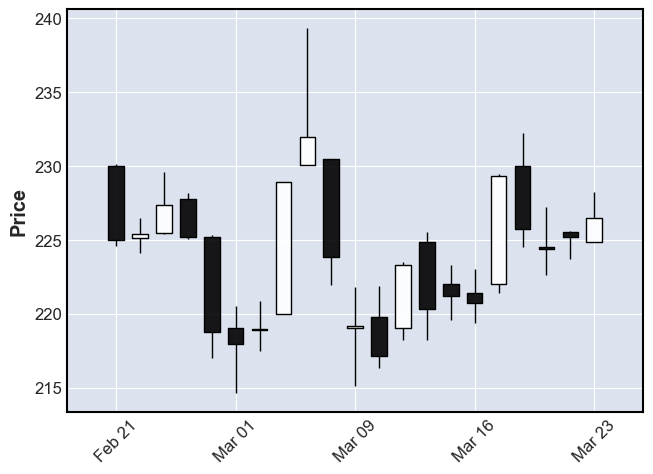

39


,open,high,low,close,value
Date,,,,,
2006-03-21,224.5,227.2,222.6,224.4,2.965007e+09


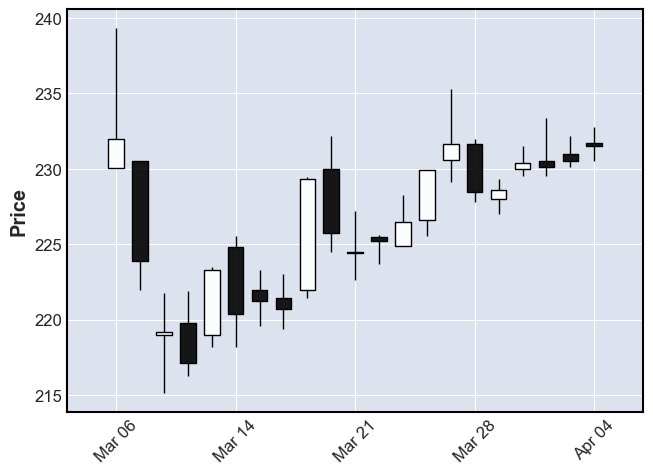

79


,open,high,low,close,value
Date,,,,,
2006-05-18,284.99,295.0,275.26,283.5,2.827266e+10


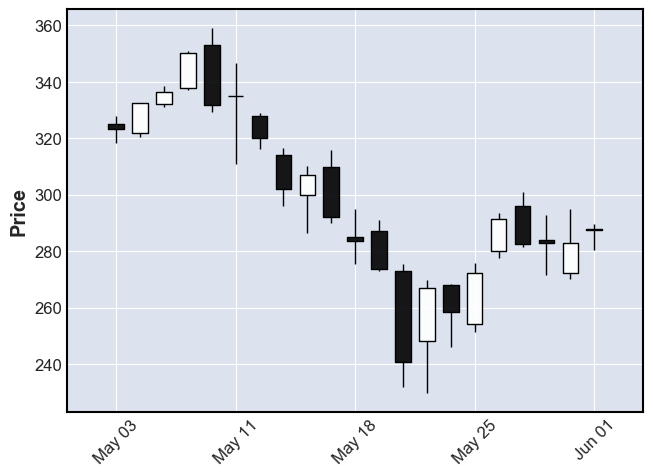

124


,open,high,low,close,value
Date,,,,,
2006-07-21,267.0,269.13,264.5,266.88,8.216098e+09


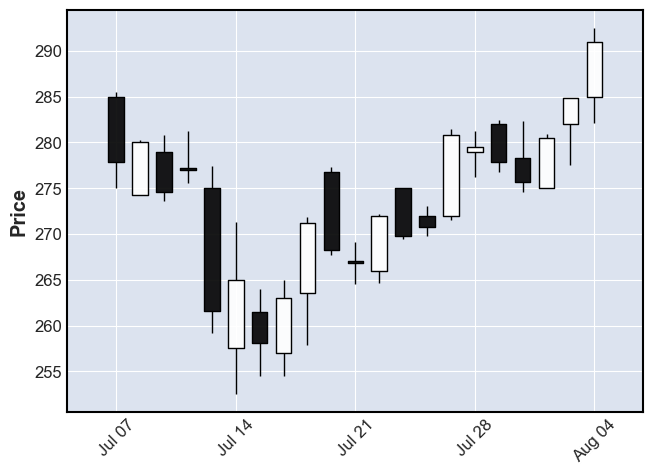

312


,open,high,low,close,value
Date,,,,,
2007-04-24,258.0,259.8,255.31,257.65,4.780281e+09


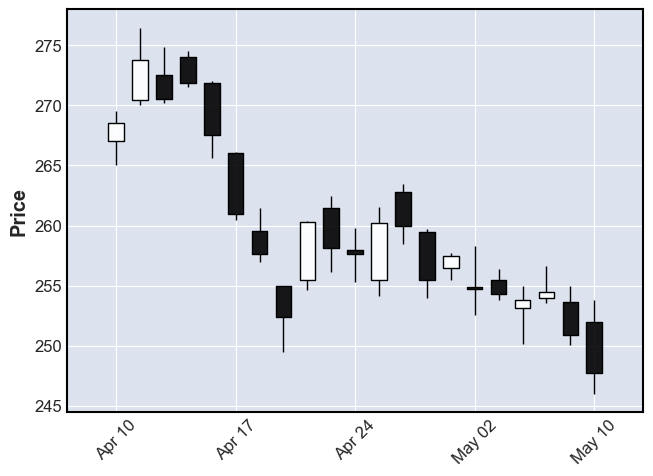

377


,open,high,low,close,value
Date,,,,,
2007-07-27,268.13,272.25,262.7,268.4,2.339607e+10


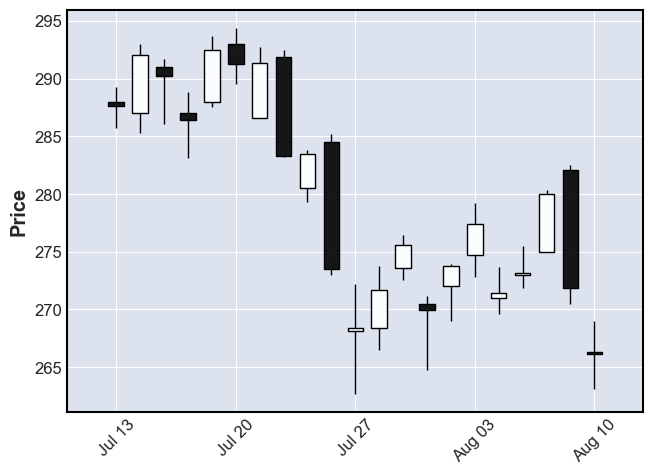

387


,open,high,low,close,value
Date,,,,,
2007-08-10,266.33,268.97,263.12,266.13,1.978588e+10


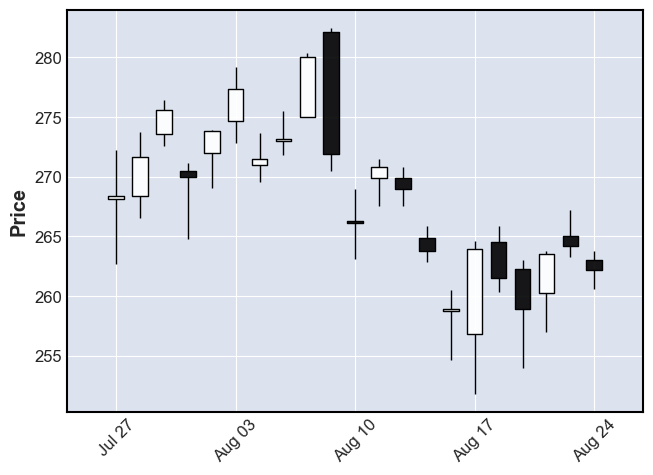

537


,open,high,low,close,value
Date,,,,,
2008-03-20,288.0,291.29,284.5,288.01,2.275068e+10


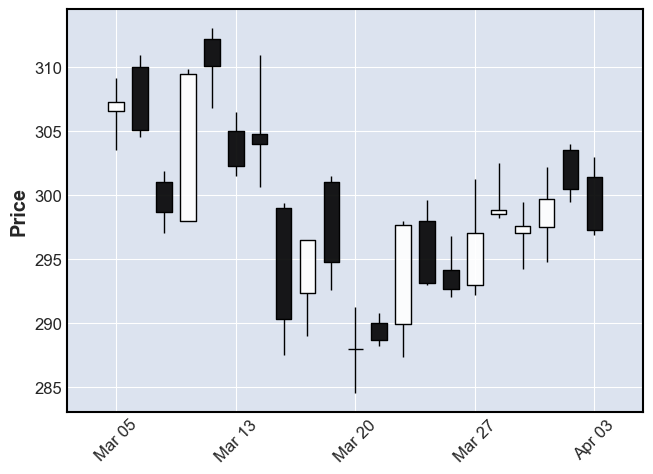

590


,open,high,low,close,value
Date,,,,,
2008-06-05,340.0,344.0,338.48,340.77,1.268320e+10


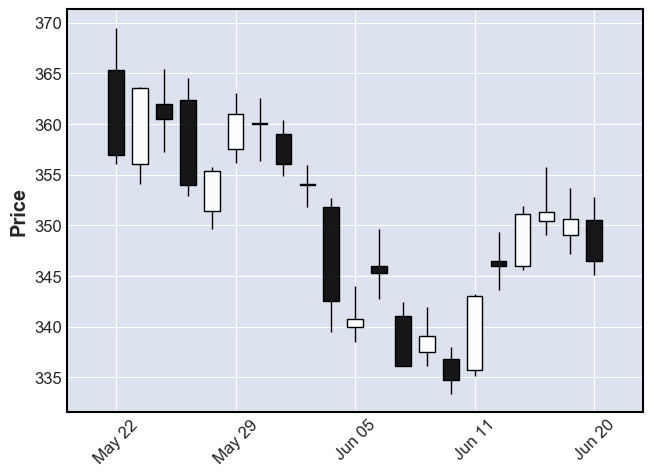

655


,open,high,low,close,value
Date,,,,,
2008-09-05,221.08,226.65,210.0,220.9,2.144119e+10


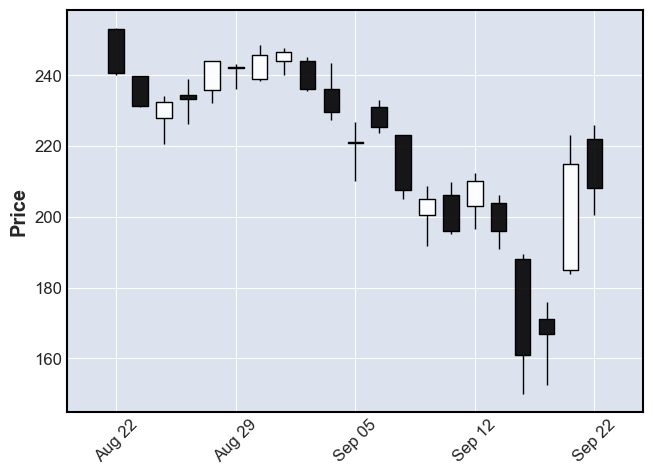

666


,open,high,low,close,value
Date,,,,,
2008-09-23,205.0,208.57,197.85,202.97,7.144401e+09


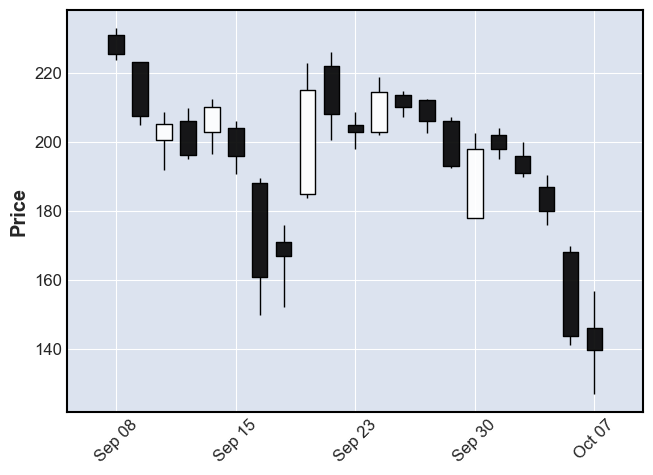

738


,open,high,low,close,value
Date,,,,,
2009-01-15,107.0,110.69,105.35,107.17,1.015328e+10


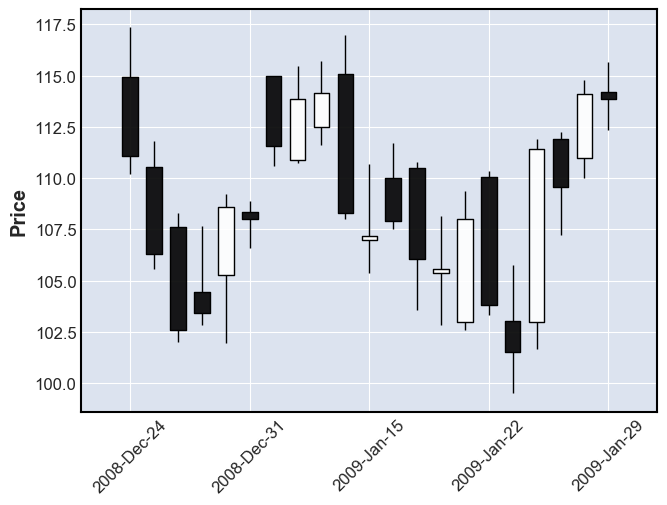

741


,open,high,low,close,value
Date,,,,,
2009-01-20,105.36,108.15,102.83,105.55,7.449676e+09


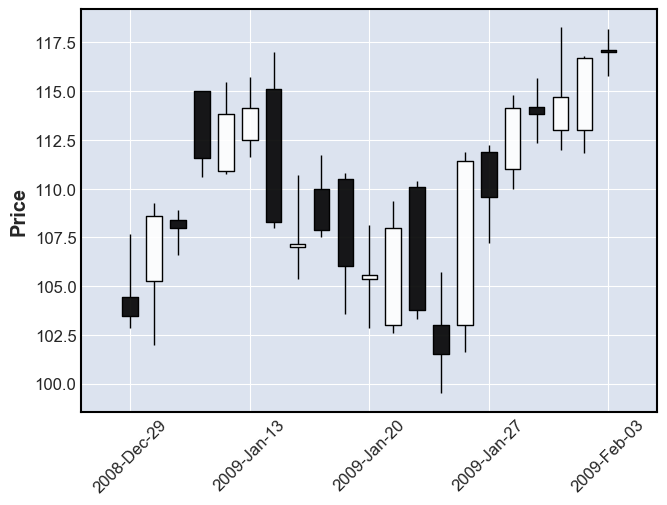

872


,open,high,low,close,value
Date,,,,,
2009-07-29,152.0,155.2,149.77,152.02,1.501012e+10


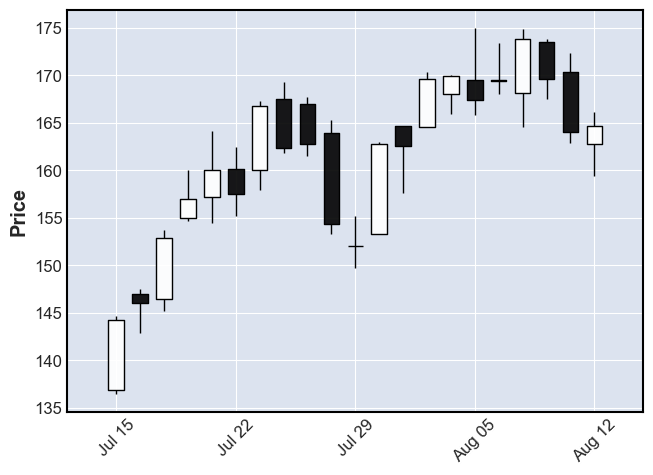

992


,open,high,low,close,value
Date,,,,,
2010-01-22,181.5,183.0,178.51,181.5,1.135151e+10


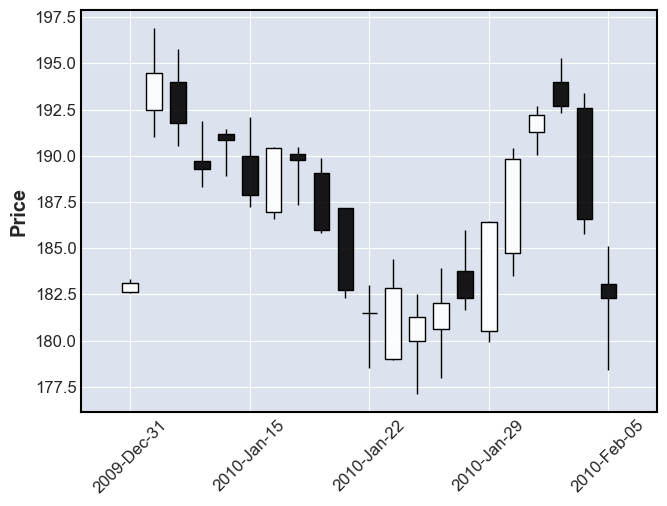

1062


,open,high,low,close,value
Date,,,,,
2010-05-05,164.0,166.5,161.75,164.2,1.125555e+10


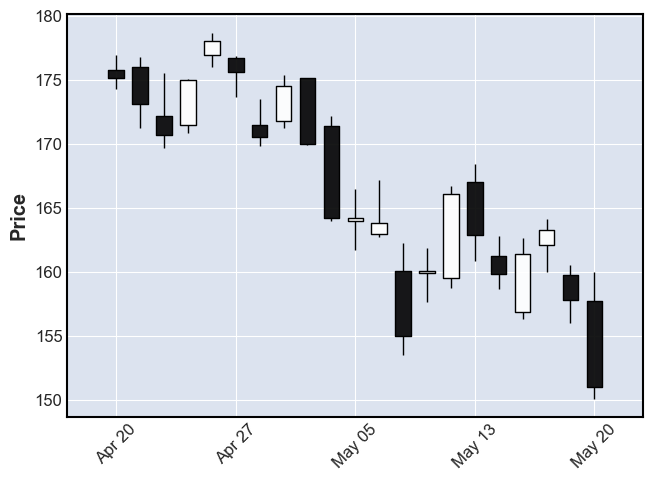

1227


,open,high,low,close,value
Date,,,,,
2010-12-27,195.05,195.8,194.09,194.9,3.330837e+09


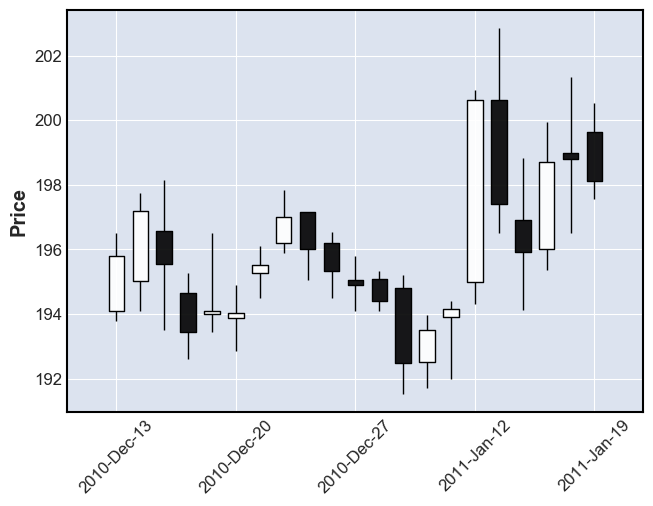

1304


,open,high,low,close,value
Date,,,,,
2011-04-26,232.7,235.28,228.7,232.14,1.609477e+10


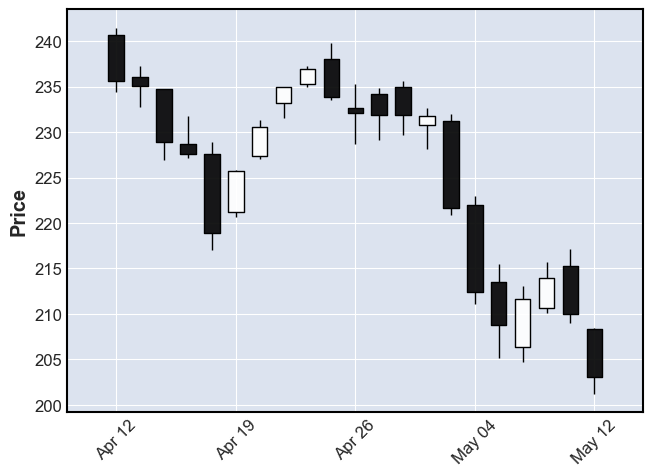

1405


,open,high,low,close,value
Date,,,,,
2011-09-19,163.49,165.74,162.5,163.4,8.199748e+09


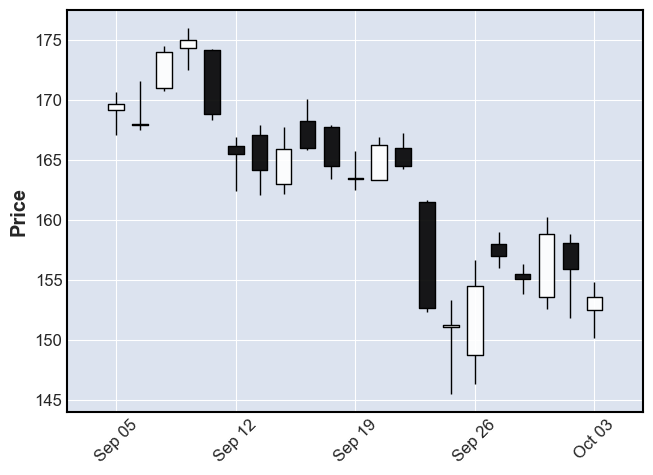

1409


,open,high,low,close,value
Date,,,,,
2011-09-23,151.1,153.33,145.5,151.25,2.167782e+10


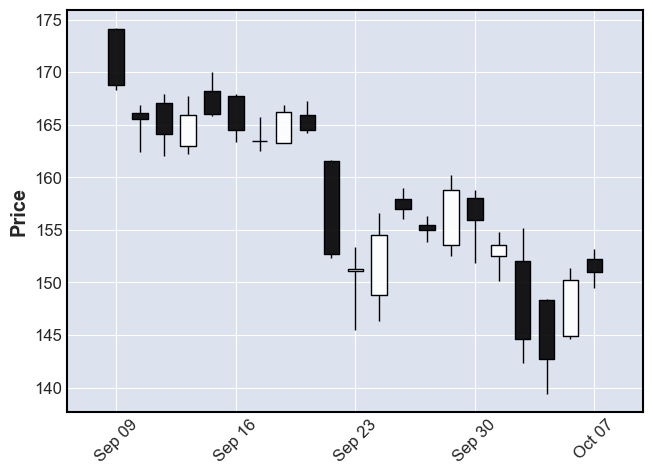

1498


,open,high,low,close,value
Date,,,,,
2012-01-30,181.65,183.58,181.03,181.75,6.812109e+09


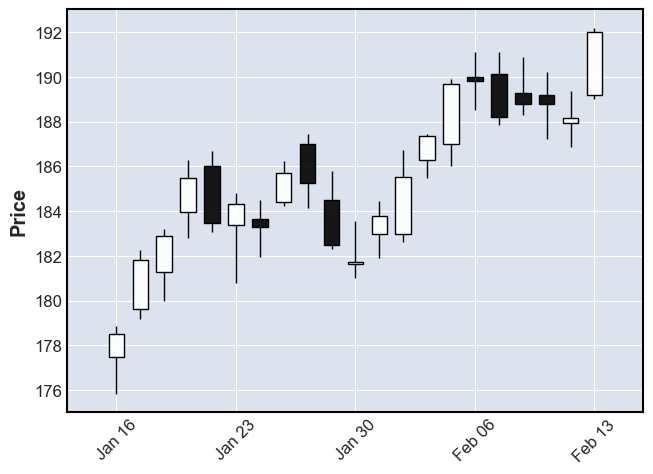

1511


,open,high,low,close,value
Date,,,,,
2012-02-16,190.12,190.38,188.03,190.0,8.654860e+09


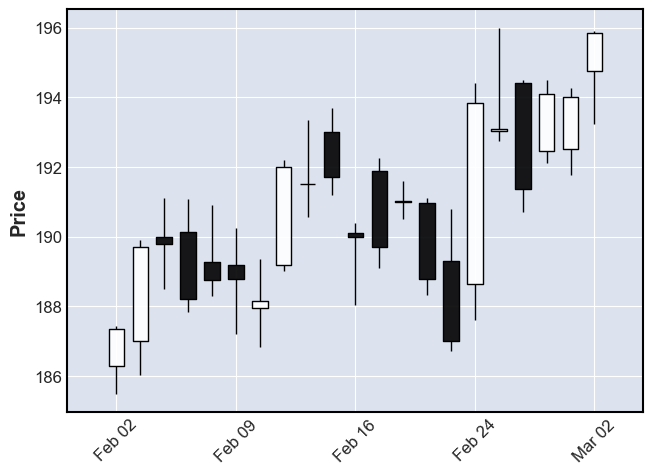

1575


,open,high,low,close,value
Date,,,,,
2012-05-18,140.0,142.75,137.07,139.58,1.191897e+10


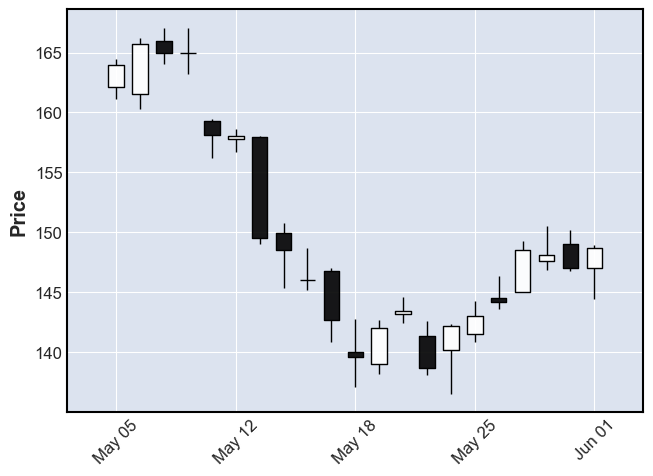

1627


,open,high,low,close,value
Date,,,,,
2012-08-01,150.11,151.79,149.17,149.99,4.419279e+09


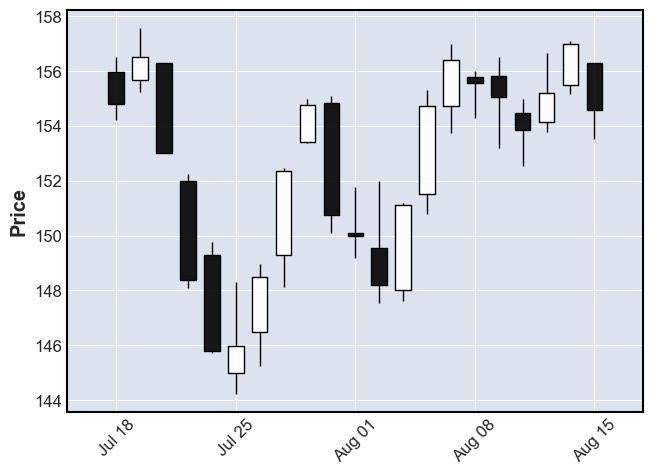

1680


,open,high,low,close,value
Date,,,,,
2012-10-15,152.0,153.35,151.31,152.22,3.163603e+09


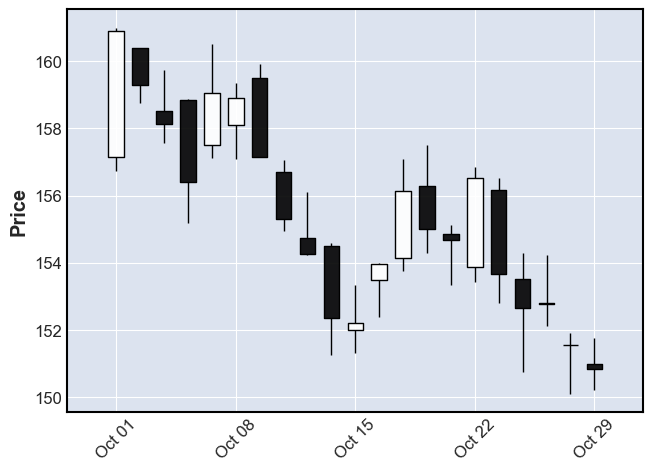

1723


,open,high,low,close,value
Date,,,,,
2012-12-14,139.42,140.01,139.03,139.41,3.762162e+09


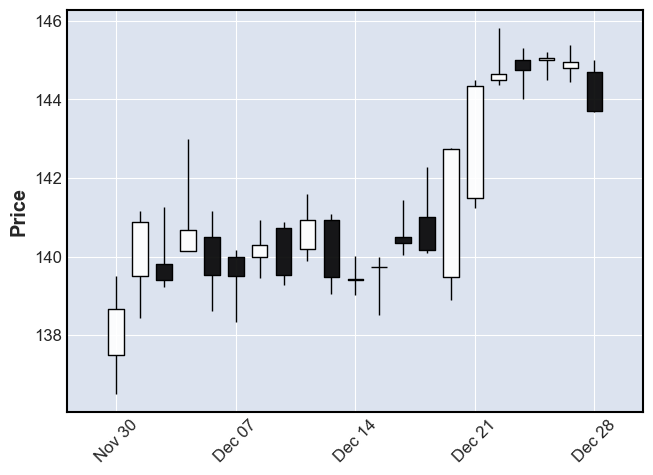

1784


,open,high,low,close,value
Date,,,,,
2013-03-20,141.89,142.5,140.66,142.09,5.779569e+09


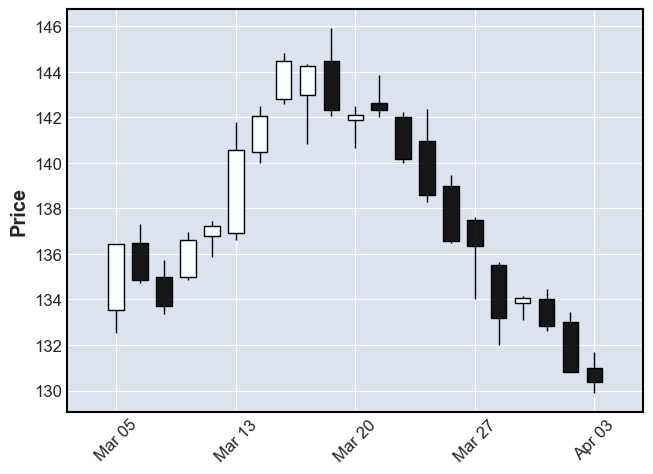

1811


,open,high,low,close,value
Date,,,,,
2013-04-26,122.9,123.35,121.1,122.82,4.224911e+09


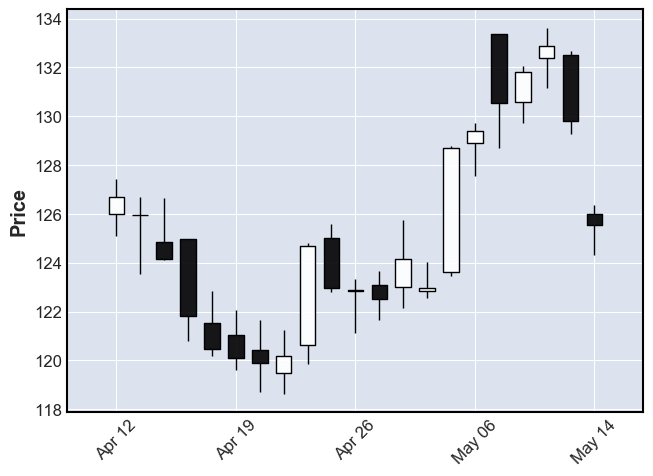

1842


,open,high,low,close,value
Date,,,,,
2013-06-13,110.0,111.35,108.15,109.91,6.124795e+09


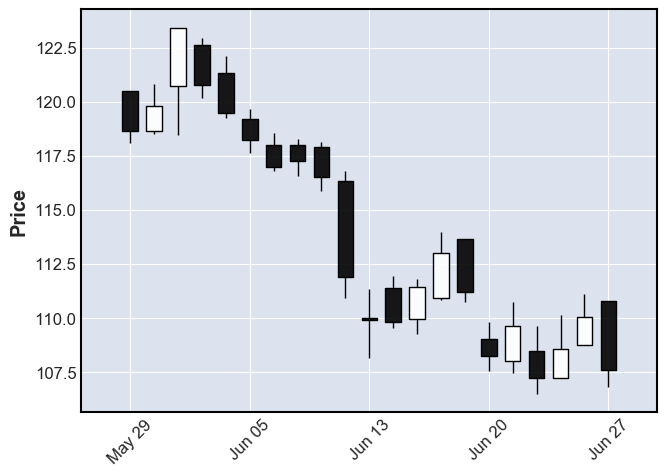

1983


,open,high,low,close,value
Date,,,,,
2013-12-30,138.8,139.39,138.28,138.75,2.863706e+09


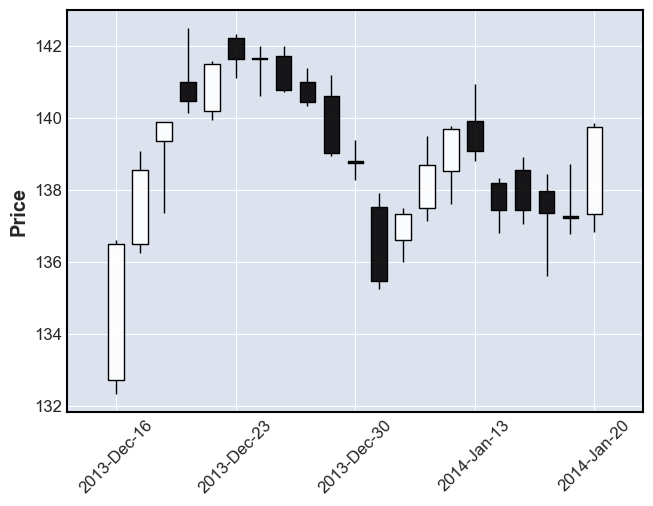

2211


,open,high,low,close,value
Date,,,,,
2014-11-28,143.0,144.2,142.0,142.86,6.254217e+09


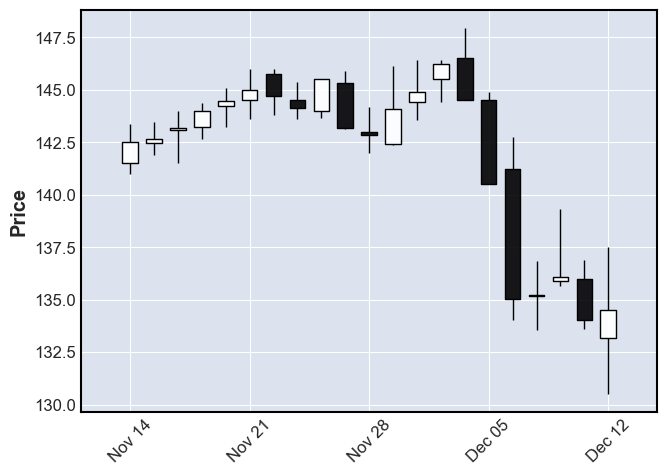

2268


,open,high,low,close,value
Date,,,,,
2015-02-24,154.82,155.75,152.82,154.99,4.442789e+09


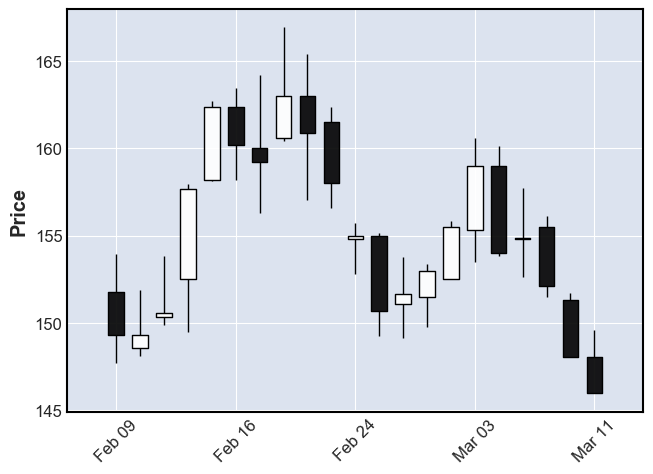

2368


,open,high,low,close,value
Date,,,,,
2015-07-21,141.5,142.45,139.96,141.41,3.186707e+09


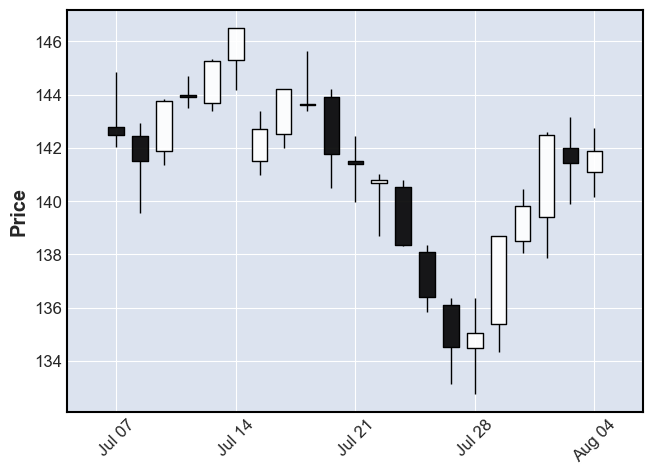

2490


,open,high,low,close,value
Date,,,,,
2016-01-14,130.99,131.49,129.01,130.86,5.728217e+09


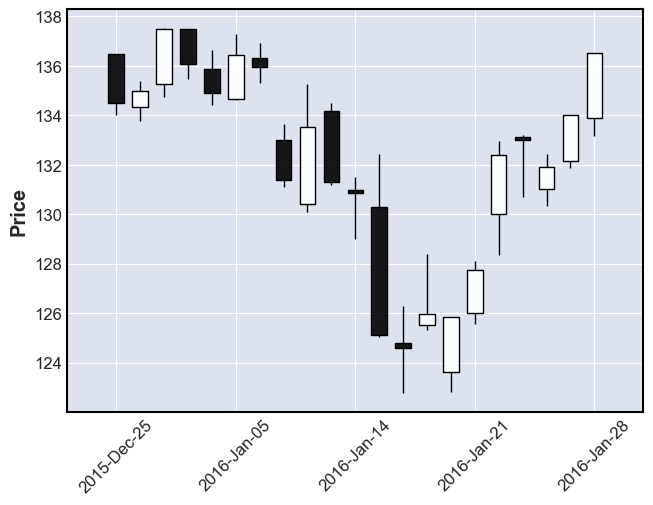

2492


,open,high,low,close,value
Date,,,,,
2016-01-18,124.8,126.3,122.75,124.6,4.487869e+09


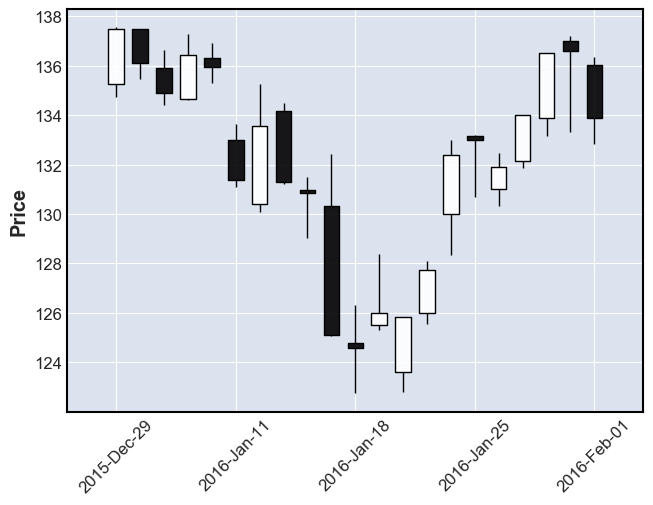

2542


,open,high,low,close,value
Date,,,,,
2016-03-29,144.75,145.16,142.86,144.7,3.544806e+09


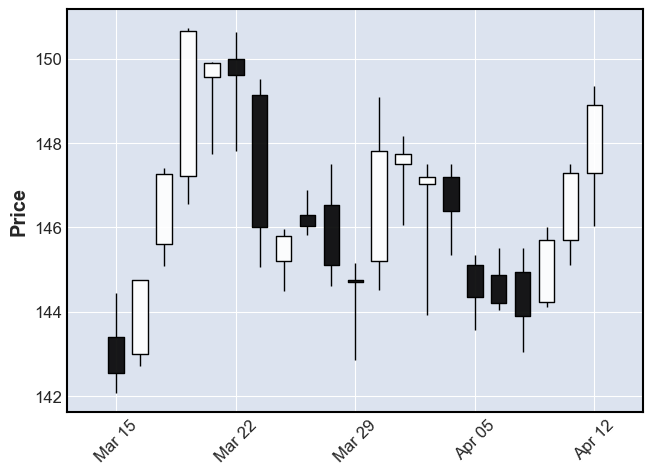

2556


,open,high,low,close,value
Date,,,,,
2016-04-18,146.0,146.77,143.28,146.3,6.091969e+09


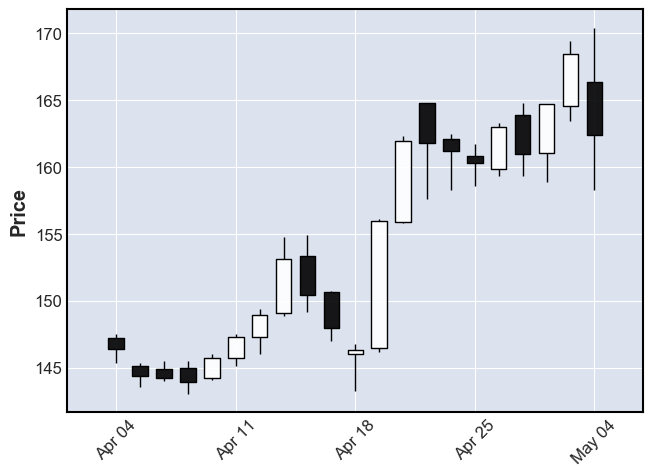

2804


,open,high,low,close,value
Date,,,,,
2017-04-11,125.98,127.69,125.5,126.0,4.135368e+09


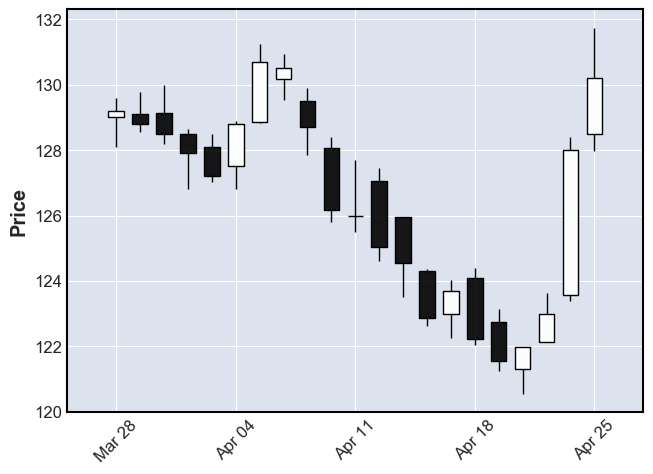

2826


,open,high,low,close,value
Date,,,,,
2017-05-16,131.41,133.07,130.27,131.13,2.971483e+09


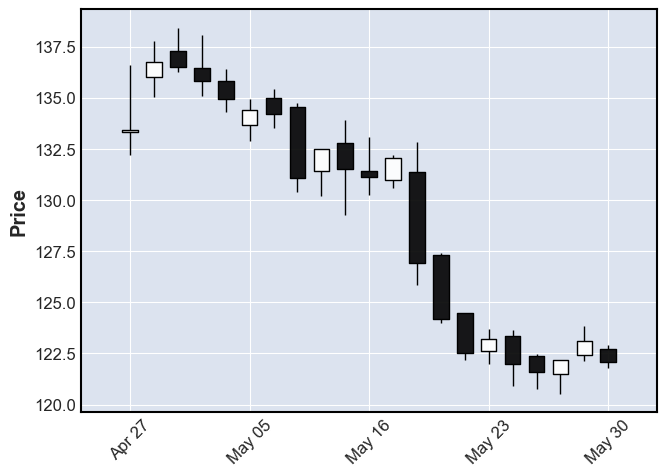

2904


,open,high,low,close,value
Date,,,,,
2017-09-04,117.0,117.65,116.56,117.0,1.880781e+09


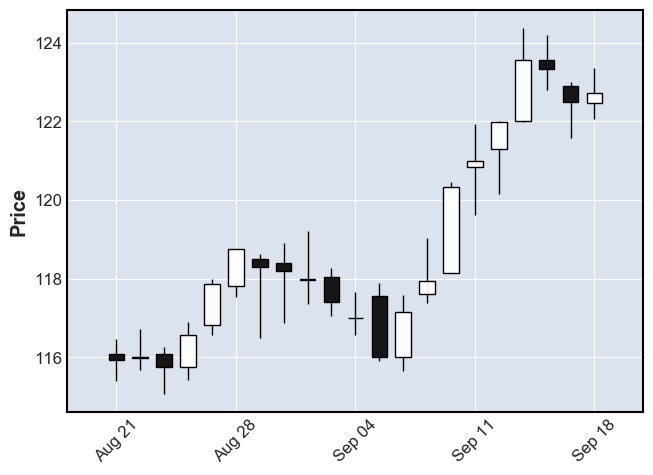

2979


,open,high,low,close,value
Date,,,,,
2017-12-19,134.02,134.74,133.5,133.96,2.208379e+09


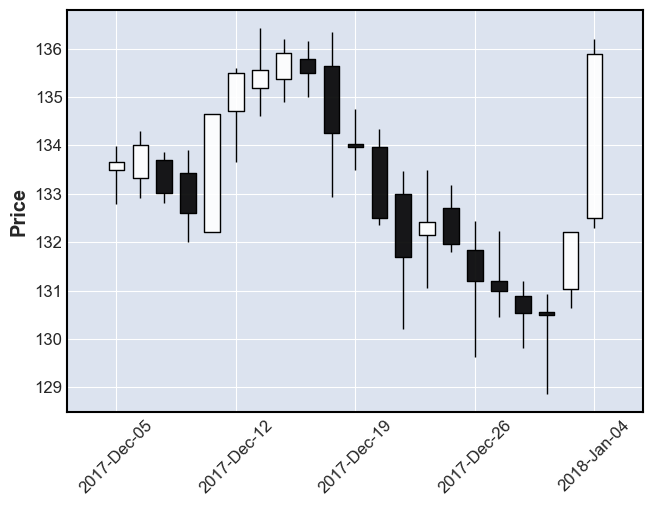

3058


,open,high,low,close,value
Date,,,,,
2018-04-16,141.03,142.83,139.87,141.5,3.773001e+09


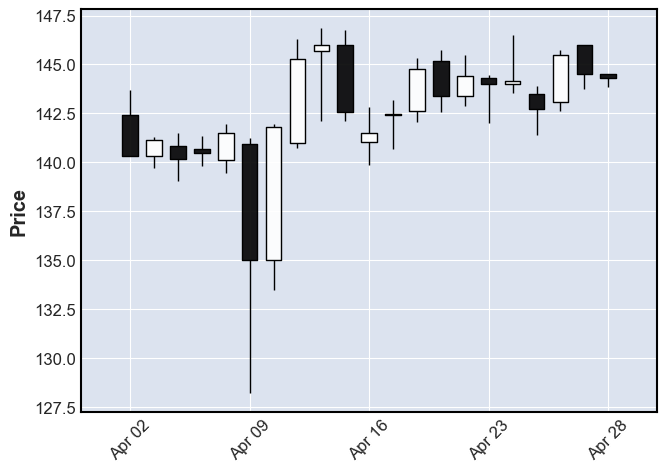

3079


,open,high,low,close,value
Date,,,,,
2018-05-16,148.6,150.7,148.11,148.59,6.552978e+09


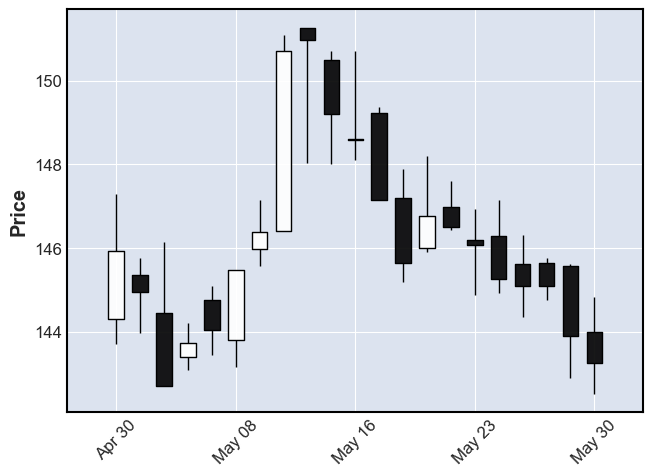

3114


,open,high,low,close,value
Date,,,,,
2018-07-04,142.4,143.13,141.87,142.24,904421321.1


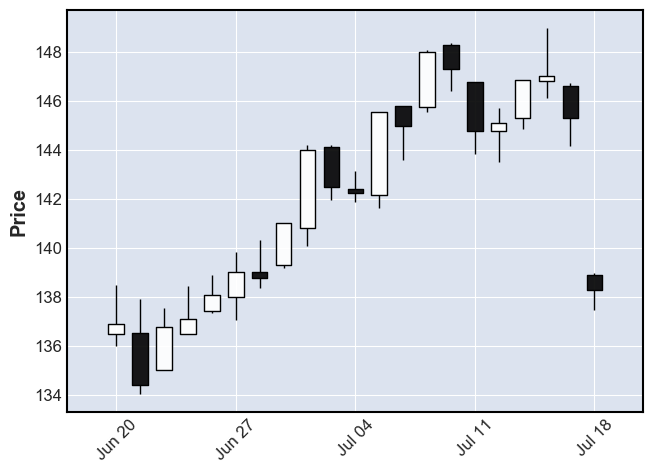

3404


,open,high,low,close,value
Date,,,,,
2019-08-26,228.88,230.6,228.05,228.9,2.578400e+09


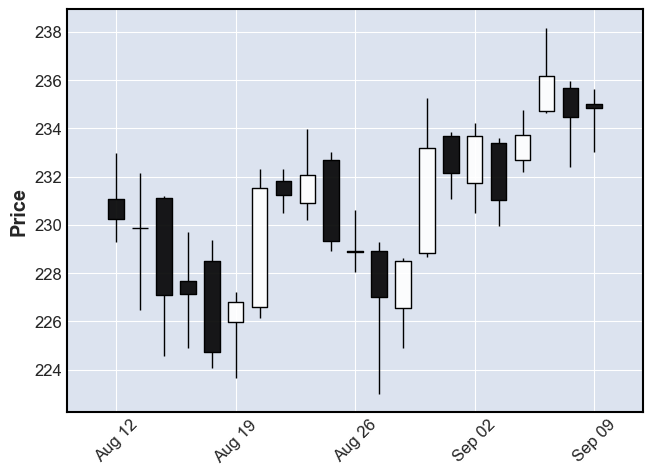

3436


,open,high,low,close,value
Date,,,,,
2019-10-09,223.1,224.71,221.72,223.18,3.330194e+09


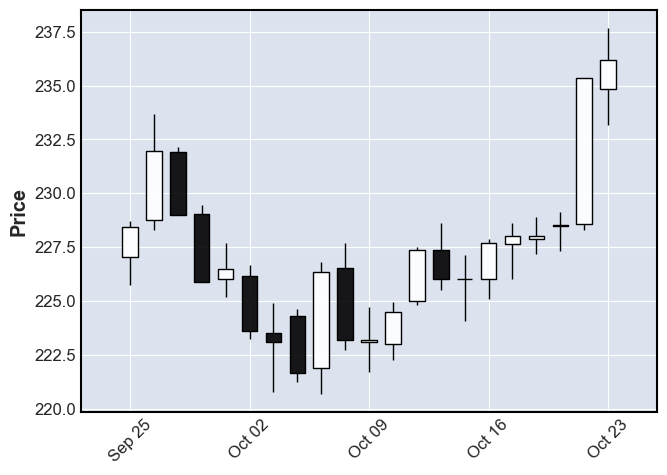

3505


,open,high,low,close,value
Date,,,,,
2020-01-21,253.25,253.4,250.88,252.99,6.807838e+09


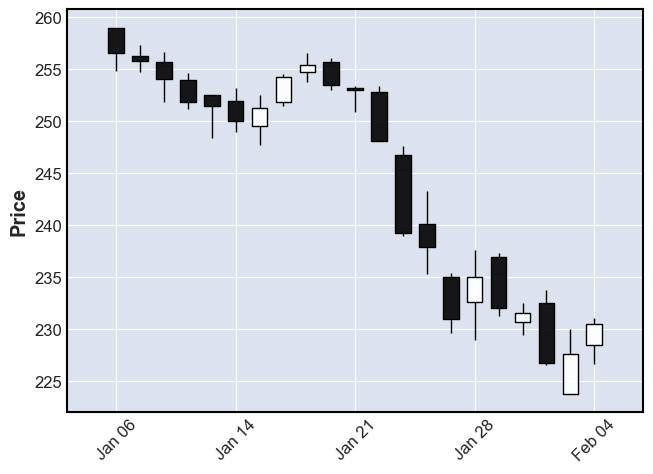

3535


,open,high,low,close,value
Date,,,,,
2020-03-04,199.95,204.42,198.28,200.0,1.585709e+10


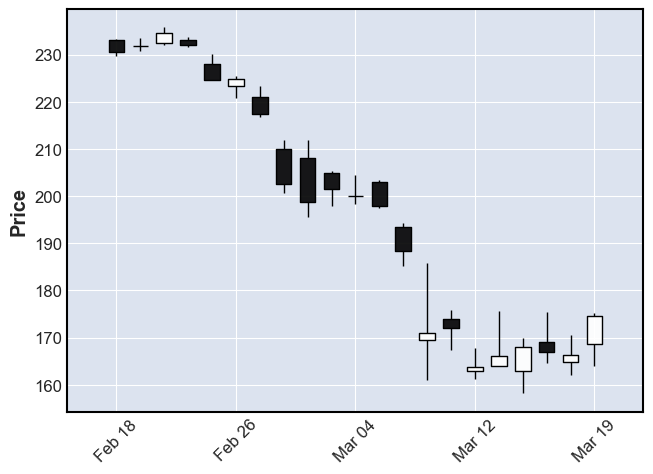

3604


,open,high,low,close,value
Date,,,,,
2020-06-15,193.86,196.15,191.0,194.2,1.053969e+10


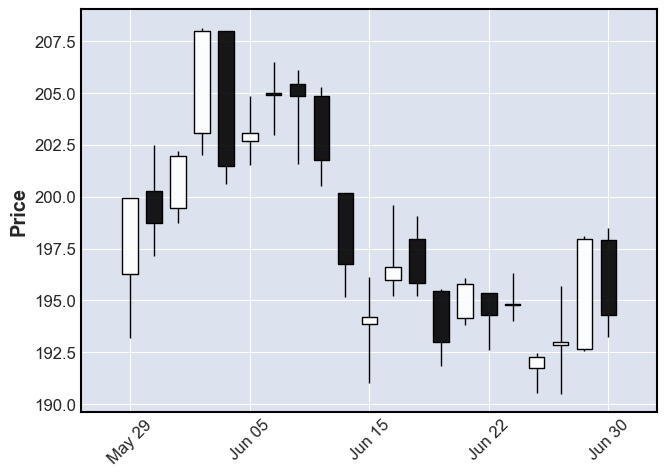

In [54]:
#КОНКРТЕНУЮ МОДЕЛЬ ЧТОБЫ ПОТОМ НА ГРАФИКЕ

inputs = {
    'open'  : df['Open'],
    'high'  : df['High'],
    'low'   : df['Low'],
    'close' : df['Close'],
    'volume': df['Volume']
}



Pattern = abstract.Function('CDLDOJISTAR')
df['PATTERN'] = Pattern(inputs)

list_ = [(df[df['PATTERN'] == 100].index)]
data = np.array(df.iloc[:, 1:6])
candle = pd.DataFrame(data, index=pd.to_datetime(df['Date']), columns=['open', 'high', 'low', 'close', 'value'])

for i in list_[0]:
    print(i)
    display(candle.iloc[i:i+1])
    mpf.plot(candle.iloc[i-10:i+11], type = 'candle')

In [63]:
np.unique(df['PATTERN'], return_counts=True)

(array([-100,    0]), array([   1, 3645], dtype=int64))

In [65]:
#КОНКРТЕНУЮ МОДЕЛЬ ЧТОБЫ ПОТОМ НА ГРАФИКЕ

open  = df['Open'].astype(float)
high  = df['High'].astype(float)
low   = df['Low'].astype(float)
close = df['Close'].astype(float)


Pattern = abstract.Function('CDLTRISTAR')
df['PATTERN'] = Pattern(open, high, low, close)

list_ = [(df[df['PATTERN'] == 100].index)]

#GRAF
data = np.array(df.iloc[:, 1:6])
candle = pd.DataFrame(data, index=pd.to_datetime(df['Date']), columns=['open', 'high', 'low', 'close', 'value'])

for i in list_[0]:
    print(i)
    display(candle.iloc[i:i+1])
    mpf.plot(candle.iloc[i-10:i+11], type = 'candle')


In [16]:
import matplotlib.pyplot as plt
plt.figure(figsize = (16,8))
plt.plot(df['CLOSE'])

NameError: name 'df' is not defined

<Figure size 1152x576 with 0 Axes>

In [22]:
import talib
import numpy

sample_data = [
    ['1/22/14', 10, 18,  5, 20],
    ['1/23/14', 12, 21,  7, 22],
    ['1/24/14', 14, 24, 9 , 24],
    ['1/25/14', 16, 27, 11, 26],
    ['1/26/14', 18, 30, 13, 28],
    ['1/27/14', 20, 33, 15, 30],
    ['1/28/14', 22, 36, 17, 32],
    ['1/29/14', 24, 39, 19, 34],
    ['1/30/14', 26, 41, 21, 38],
    ['1/31/14', 30, 45, 25, 40],
    ['2/01/14', 43, 44, 42, 43],
    ['2/02/14', 46, 47, 45, 46],
    ['2/03/14', 44, 45, 43, 44],
    ['2/04/14', 40, 55, 35, 50],
]

# convert data to columns
sample_data = numpy.column_stack(sample_data)

# extract the columns we need, making sure to make them 64-bit floats
open = sample_data[1].astype(float)
high = sample_data[2].astype(float)
low = sample_data[3].astype(float)
close = sample_data[4].astype(float)

print(talib.CDLTRISTAR(open, high, low, close)
)

# candle = pd.DataFrame(sample_data, index=pd.to_datetime(sample_data['begin']), columns=['open', 'high', 'low', 'close', 'value'])


[   0    0    0    0    0    0    0    0    0    0    0    0 -100    0]


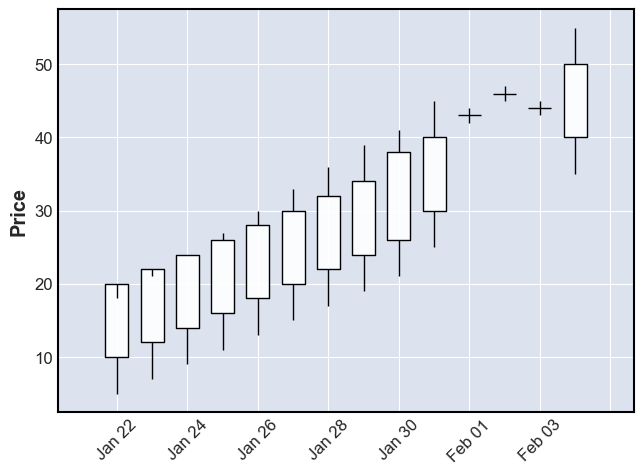

In [32]:
zz = pd.DataFrame(sample_data).T
zz.columns = ['data', 'open', 'high', 'low', 'close']
zz.index = pd.to_datetime(zz['data'])
zz.drop('data', axis = 1, inplace = True)
zz = pd.DataFrame(zz, dtype = float)
zz
mpf.plot(zz, type = 'candle')